# Import Libralies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
%matplotlib inline

# Connecting GG Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content/drive',force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Creating and Cleaning Dataframes

In [ ]:
folder_path = '/content/drive/MyDrive/EC439/CSV Data'
all_files = os.listdir(folder_path)

## Price History DF

In [ ]:
csv_files = [f for f in all_files if f.endswith('.csv') and 'Price History' in f]

ph_dfs = {}
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Exchange Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Exchange Date' not found, don't skip any rows
    ph_dfs[file] = pd.read_csv(file_path, skiprows=skiprows)

# Access individual DataFrames using the filename as key
# Example: dfs['your_file.csv']

In [ ]:
len(ph_dfs.keys())

18

In [ ]:
ph_dfs['AKR.Price History (STARK).csv'].head(10)

Exchange Date  Close   Net    %Chg  Open   Low  High      Volume  \
0  27-ก.ย.-2024   0.96  0.01  +1.05%  0.95  0.95  0.98   3,590,000   
1  20-ก.ย.-2024   0.95  0.01  +1.06%  0.95  0.93  0.98  11,836,300   
2  13-ก.ย.-2024   0.94  0.01  +1.08%  0.94  0.91  0.97  15,850,800   
3  06-ก.ย.-2024   0.93  0.03  +3.33%  0.91  0.88  0.93  10,390,600   
4  30-ส.ค.-2024   0.90  0.02  +2.27%  0.89  0.88  0.92   8,502,700   
5  23-ส.ค.-2024   0.88  0.03  +3.53%  0.86  0.84  0.89   7,196,900   
6  16-ส.ค.-2024   0.85  0.00   0.00%  0.85  0.83  0.89   8,149,000   
7  09-ส.ค.-2024   0.85  0.00   0.00%  0.86  0.81  0.86   3,712,200   
8  02-ส.ค.-2024   0.85 -0.02  -2.30%  0.87  0.85  0.88   2,968,600   
9  26-ก.ค.-2024   0.87  0.00   0.00%  0.87  0.83  0.87   5,435,500   

  Turnover - THB               Flow  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0   3,450,017.00  12,750,049,352.00          NaN          NaN          NaN   
1  11,337,320.00  12,746,599,335.00          NaN          NaN          NaN   
2  14,971,829.00  12,735,262,015.00          NaN          NaN          NaN   
3   9,478,282.00  12,720,290,186.00          NaN          NaN          NaN   
4   7,661,700.00  12,710,811,904.00          NaN          NaN          NaN   
5   6,282,603.00  12,703,150,204.00          NaN          NaN          NaN   
6   6,984,180.00  12,696,867,601.00          NaN          NaN          NaN   
7   3,122,707.00  12,703,851,781.00          NaN          NaN          NaN   
8   2,549,488.00  12,706,974,488.00          NaN          NaN          NaN   
9   4,620,807.00  12,709,523,976.00          NaN          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  
5          NaN          NaN          NaN  
6          NaN          NaN          NaN  
7          NaN          NaN          NaN  
8          NaN          NaN          NaN  
9          NaN          NaN          NaN

In [ ]:
for key in ph_dfs:
    ph_dfs[key] = ph_dfs[key][['Exchange Date', 'Close']]

In [ ]:
ph_dfs['AKR.Price History (STARK).csv'].head(10)

Exchange Date  Close
0  27-ก.ย.-2024   0.96
1  20-ก.ย.-2024   0.95
2  13-ก.ย.-2024   0.94
3  06-ก.ย.-2024   0.93
4  30-ส.ค.-2024   0.90
5  23-ส.ค.-2024   0.88
6  16-ส.ค.-2024   0.85
7  09-ส.ค.-2024   0.85
8  02-ส.ค.-2024   0.85
9  26-ก.ค.-2024   0.87

In [ ]:
for key, df in ph_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.Price History (STARK).csv
--------------------
File: ACE.Price History (EA).csv
--------------------
File: BBGI.Price History (EA).csv
--------------------
File: BCPG.Price History (EA).csv
--------------------
File: CKP.Price History (EA).csv
--------------------
File: CPT.Price History (STARK).csv
--------------------
File: EA.Price History.csv
--------------------
File: ETC.Price History (EA).csv
--------------------
File: LNE.Price History (STARK).csv
--------------------
File: SCI.Price History (STARK).csv
--------------------
File: SPCG.Price History (EA).csv
--------------------
File: SSP.Price History (EA).csv
--------------------
File: STARK.Price History.csv
Column 'Close' has 4 NaN values.
--------------------
File: SUPER.Price History (EA).csv
--------------------
File: TGE.Price History (EA).csv
--------------------
File: TMIm.Price History (STARK).csv
--------------------
File: TPIPP.Price History (EA).csv
--------------------
File: TRTm.Price History (STARK).cs

In [ ]:
# ph_dfs['STARK.Price History.csv'].head(10)

Exchange Date  Close
0   06-ก.ย.-2024   0.01
1   30-ส.ค.-2024   0.01
2   23-ส.ค.-2024   0.01
3   28-ก.ค.-2023    NaN
4   21-ก.ค.-2023    NaN
5   14-ก.ค.-2023    NaN
6   07-ก.ค.-2023    NaN
7  30-มิ.ย.-2023   0.02
8  23-มิ.ย.-2023   0.02
9  16-มิ.ย.-2023   0.08

In [ ]:
for key in ph_dfs:
    ph_dfs[key]['Close'] = pd.to_numeric(ph_dfs[key]['Close'], errors='coerce').fillna(0)

In [ ]:
for key, df in ph_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.Price History (STARK).csv
--------------------
File: ACE.Price History (EA).csv
--------------------
File: BBGI.Price History (EA).csv
--------------------
File: BCPG.Price History (EA).csv
--------------------
File: CKP.Price History (EA).csv
--------------------
File: CPT.Price History (STARK).csv
--------------------
File: EA.Price History.csv
--------------------
File: ETC.Price History (EA).csv
--------------------
File: LNE.Price History (STARK).csv
--------------------
File: SCI.Price History (STARK).csv
--------------------
File: SPCG.Price History (EA).csv
--------------------
File: SSP.Price History (EA).csv
--------------------
File: STARK.Price History.csv
--------------------
File: SUPER.Price History (EA).csv
--------------------
File: TGE.Price History (EA).csv
--------------------
File: TMIm.Price History (STARK).csv
--------------------
File: TPIPP.Price History (EA).csv
--------------------
File: TRTm.Price History (STARK).csv
--------------------


In [ ]:
for key in ph_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.Price History', key).group(1)

    # Add 'Company name' column
    ph_dfs[key]['Company name'] = company_name

In [ ]:
ph_dfs['STARK.Price History.csv'].head(10)

Exchange Date  Close Company name  Fraud
0   06-ก.ย.-2024   0.01        STARK      1
1   30-ส.ค.-2024   0.01        STARK      1
2   23-ส.ค.-2024   0.01        STARK      1
3   28-ก.ค.-2023   0.00        STARK      1
4   21-ก.ค.-2023   0.00        STARK      1
5   14-ก.ค.-2023   0.00        STARK      1
6   07-ก.ค.-2023   0.00        STARK      1
7  30-มิ.ย.-2023   0.02        STARK      1
8  23-มิ.ย.-2023   0.02        STARK      1
9  16-มิ.ย.-2023   0.08        STARK      1

In [ ]:
for key in ph_dfs:
    # Add 'Fraud' column and initialize to 0
    ph_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = ph_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        ph_dfs[key]['Fraud'] = 1

In [ ]:
ph_dfs['STARK.Price History.csv'].head(10)

Exchange Date  Close Company name  Fraud
0   06-ก.ย.-2024   0.01        STARK      1
1   30-ส.ค.-2024   0.01        STARK      1
2   23-ส.ค.-2024   0.01        STARK      1
3   28-ก.ค.-2023   0.00        STARK      1
4   21-ก.ค.-2023   0.00        STARK      1
5   14-ก.ค.-2023   0.00        STARK      1
6   07-ก.ค.-2023   0.00        STARK      1
7  30-มิ.ย.-2023   0.02        STARK      1
8  23-มิ.ย.-2023   0.02        STARK      1
9  16-มิ.ย.-2023   0.08        STARK      1

In [ ]:
ph_dfs_merged = pd.concat(ph_dfs.values(), ignore_index=True)

In [ ]:
ph_dfs_merged

Exchange Date  Close Company name  Fraud
0     27-ก.ย.-2024   0.96          AKR      0
1     20-ก.ย.-2024   0.95          AKR      0
2     13-ก.ย.-2024   0.94          AKR      0
3     06-ก.ย.-2024   0.93          AKR      0
4     30-ส.ค.-2024   0.90          AKR      0
...            ...    ...          ...    ...
7343  24-ต.ค.-2014   5.90         TRTm      0
7344  17-ต.ค.-2014   5.80         TRTm      0
7345  10-ต.ค.-2014   6.20         TRTm      0
7346  03-ต.ค.-2014   5.70         TRTm      0
7347  26-ก.ย.-2014   5.70         TRTm      0

[7348 rows x 4 columns]

## Balancesheet DF

In [ ]:
bs_files = [f for f in all_files if f.endswith('.csv') and 'balancesheet' in f]

bs_dfs = {}
# bs_dfs_test = {}
for file in bs_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
          # print(i,"-----",line)
          if 'Period End Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    bs_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)
    # try new import mode
    # bs_dfs_test[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)
    # Transpose
    bs_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    bs_dfs[file].columns = bs_dfs[file].iloc[0]
    bs_dfs[file] = bs_dfs[file][1:]

In [ ]:
len(bs_dfs.keys())

18

In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv'].head(10)

0  Period End Date Assets (THB Thousands) Cash and Short Term Investments  \
1     31-Dec-2004                     NaN                         33,950    
2     30-Jun-2005                     NaN                         38,295    
3     31-Dec-2005                     NaN                         45,014    
4     31-Mar-2006                     NaN                         87,349    
5     30-Jun-2006                     NaN                         46,049    
6     30-Sep-2006                     NaN                        151,603    
7     31-Dec-2006                     NaN                        103,532    
8     31-Mar-2007                     NaN                        226,105    
9     30-Jun-2007                     NaN                         49,881    
10    30-Sep-2007                     NaN                         77,057    

0  Cash Cash & Equivalents Short Term Investments  \
1    --            33,950                      --   
2    --            38,295                      --   
3    --            45,014                      --   
4    --            87,349                      --   
5    --            46,049                      --   
6    --           151,603                      --   
7    --           103,223                    309    
8    --           195,671                 30,434    
9    --            49,536                    345    
10   --            76,689                    368    

0  Accounts Receivable - Trade, Net Accounts Receivable - Trade, Gross  \
1                          389,706                            425,090    
2                          407,976                            418,756    
3                          316,608                            326,237    
4                          280,428                            291,767    
5                          378,248                            389,935    
6                          404,091                            415,704    
7                          362,982                            375,714    
8                          238,902                            253,490    
9                          224,210                            241,531    
10                         455,879                            473,669    

0  Provision for Doubtful Accounts Total Receivables, Net  ...  \
1                         (35,384)               394,115   ...   
2                         (10,780)               422,799   ...   
3                          (9,629)               337,608   ...   
4                         (11,339)               292,276   ...   
5                         (11,687)               390,979   ...   
6                         (11,613)               430,778   ...   
7                         (12,732)               405,173   ...   
8                         (14,588)               303,729   ...   
9                         (17,321)               294,973   ...   
10                        (17,790)               549,293   ...   

0  Capital Lease Payments Due in 4-5 Years  \
1                                       --   
2                                       --   
3                                       --   
4                                       --   
5                                       --   
6                                       --   
7                                       --   
8                                       --   
9                                       --   
10                                      --   

0  Cap. Lease Pymts. Due in Year 6 & Beyond Total Funded Status  \
1                                        --                  --   
2                                        --                  --   
3                                        --                  --   
4                                        --                  --   
5                                        --                  --   
6                                        --                  --   
7                                        --       

In [ ]:
for key in bs_dfs:
    bs_dfs[key] = bs_dfs[key].replace('--', 0)
    bs_dfs[key] = bs_dfs[key].replace([' ', '  ', np.nan, None], np.nan)

<ipython-input-28-dec1e73c6678>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bs_dfs[key] = bs_dfs[key].replace('--', 0)


In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv'].head(10)

0  Period End Date  Assets (THB Thousands) Cash and Short Term Investments  \
1     31-Dec-2004                      NaN                         33,950    
2     30-Jun-2005                      NaN                         38,295    
3     31-Dec-2005                      NaN                         45,014    
4     31-Mar-2006                      NaN                         87,349    
5     30-Jun-2006                      NaN                         46,049    
6     30-Sep-2006                      NaN                        151,603    
7     31-Dec-2006                      NaN                        103,532    
8     31-Mar-2007                      NaN                        226,105    
9     30-Jun-2007                      NaN                         49,881    
10    30-Sep-2007                      NaN                         77,057    

0  Cash Cash & Equivalents Short Term Investments  \
1     0            33,950                       0   
2     0            38,295                       0   
3     0            45,014                       0   
4     0            87,349                       0   
5     0            46,049                       0   
6     0           151,603                       0   
7     0           103,223                    309    
8     0           195,671                 30,434    
9     0            49,536                    345    
10    0            76,689                    368    

0  Accounts Receivable - Trade, Net Accounts Receivable - Trade, Gross  \
1                          389,706                            425,090    
2                          407,976                            418,756    
3                          316,608                            326,237    
4                          280,428                            291,767    
5                          378,248                            389,935    
6                          404,091                            415,704    
7                          362,982                            375,714    
8                          238,902                            253,490    
9                          224,210                            241,531    
10                         455,879                            473,669    

0  Provision for Doubtful Accounts Total Receivables, Net  ...  \
1                         (35,384)               394,115   ...   
2                         (10,780)               422,799   ...   
3                          (9,629)               337,608   ...   
4                         (11,339)               292,276   ...   
5                         (11,687)               390,979   ...   
6                         (11,613)               430,778   ...   
7                         (12,732)               405,173   ...   
8                         (14,588)               303,729   ...   
9                         (17,321)               294,973   ...   
10                        (17,790)               549,293   ...   

0  Capital Lease Payments Due in 4-5 Years  \
1                                        0   
2                                        0   
3                                        0   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
9                                        0   
10                                       0   

0  Cap. Lease Pymts. Due in Year 6 & Beyond Total Funded Status  \
1                                         0                   0   
2                                         0                   0   
3                                         0                   0   
4                                         0                   0   
5                                         0                   0   
6                                         0                   0   
7                                      

In [ ]:
for key in bs_dfs.keys():
    print(f"DataFrame: {key}")
    print(f"Columns: {bs_dfs[key].columns.tolist()}")
    print("-" * 20)  # Separator between DataFrames

DataFrame: AKR.balancesheet (STARK).xls.csv
Columns: ['Period End Date', 'Assets (THB Thousands)', 'Cash and Short Term Investments', 'Cash', 'Cash & Equivalents', 'Short Term Investments', 'Accounts Receivable - Trade, Net', 'Accounts Receivable - Trade, Gross', 'Provision for Doubtful Accounts', 'Total Receivables, Net', 'Notes Receivable - Short Term', 'Receivables - Other', 'Total Inventory', 'Inventories - Finished Goods', 'Inventories - Work In Progress', 'Inventories - Raw Materials', 'Inventories - Other', 'Prepaid Expenses', 'Other Current Assets, Total', 'Other Current Assets', 'Total Current Assets', nan, 'Property/Plant/Equipment, Total - Gross', 'Buildings - Gross', 'Land/Improvements - Gross', 'Machinery/Equipment - Gross', 'Construction in Progress - Gross', 'Leases - Gross', 'Other Property/Plant/Equipment - Gross', 'Property/Plant/Equipment, Total - Net', 'Accumulated Depreciation, Total', 'Intangibles, Net', 'Intangibles - Gross', 'Accumulated Intangible Amortization'

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(bs_dfs[list(bs_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in bs_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in bs_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)

# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")

# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())

# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")

Common Columns: ['Total Receivables, Net', 'Total Current Assets less Inventory', 'Receivables - Other', 'Current Port. of LT Debt/Capital Leases', 'Shareholders Equity (THB Thousands)', 'Supplemental (THB Thousands)', 'Total Equity & Minority Interest', 'Income Taxes Payable', 'Common Stock', 'Total Current Assets', 'Other Current liabilities, Total', 'Total Liabilities', 'Tangible Book Value, Common Equity', 'Net Debt Incl. Pref.Stock & Min.Interest', 'Additional Paid-In Capital', 'Minority Interest', 'Curr. Port. of LT Capital Leases, Suppl.', 'Defered Income Tax - Long Term Asset', 'Shares Outs - Common Stock Primary Issue', 'Treas Shares - Common Stock Prmry Issue', 'Other Long Term Assets, Total', 'Total Equity', "Total Liabilities & Shareholders' Equity", 'Notes Payable/Short Term Debt', 'Other Payables', 'Cash and Short Term Investments', 'Other Liabilities, Total', 'Period End Date', 'Property/Plant/Equipment, Total - Net', 'Accounts Receivable - Trade, Net', 'Total Debt', 'To

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(bs_dfs[list(bs_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in bs_dfs.values()])

# Find and count different columns for each DataFrame
for key, df in bs_dfs.items():
    unique_cols = set(df.columns) - common_columns
    num_different_cols = len(unique_cols)
    print(f"{key}, Number of Different Columns: {num_different_cols}")

AKR.balancesheet (STARK).xls.csv, Number of Different Columns: 62
ACE.balancesheet (EA).csv, Number of Different Columns: 73
BBGI.balancesheet (EA).csv, Number of Different Columns: 36
BCPG.balancesheet (EA).csv, Number of Different Columns: 41
CKP.balancesheet (EA).csv, Number of Different Columns: 59
CPT.balancesheet (STARK).csv, Number of Different Columns: 48
ETC.balancesheet (EA).csv, Number of Different Columns: 12
EA.balancesheet.csv, Number of Different Columns: 79
SCI.balancesheet (STARK).csv, Number of Different Columns: 55
LNE.balancesheet (STARK).csv, Number of Different Columns: 69
SSP.balancesheet (EA).csv, Number of Different Columns: 48
SPCG.balancesheet (EA).csv, Number of Different Columns: 69
SUPER.balancesheet (EA).csv, Number of Different Columns: 69
STARK.balancesheet.csv, Number of Different Columns: 74
TMIm.balancesheet (STARK).csv, Number of Different Columns: 59
TGE.balancesheet (EA).csv, Number of Different Columns: 22
TRTm.balancesheet (STARK).csv, Number of

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(bs_dfs[list(bs_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in bs_dfs.values()])

# Count and print the number of common columns for each DataFrame
for key, df in bs_dfs.items():
    num_common_cols = len(common_columns.intersection(set(df.columns)))
    print(f"{key}, Number of Same Columns: {num_common_cols}")

AKR.balancesheet (STARK).xls.csv, Number of Same Columns: 48
ACE.balancesheet (EA).csv, Number of Same Columns: 48
BBGI.balancesheet (EA).csv, Number of Same Columns: 48
BCPG.balancesheet (EA).csv, Number of Same Columns: 48
CKP.balancesheet (EA).csv, Number of Same Columns: 48
CPT.balancesheet (STARK).csv, Number of Same Columns: 48
ETC.balancesheet (EA).csv, Number of Same Columns: 48
EA.balancesheet.csv, Number of Same Columns: 48
SCI.balancesheet (STARK).csv, Number of Same Columns: 48
LNE.balancesheet (STARK).csv, Number of Same Columns: 48
SSP.balancesheet (EA).csv, Number of Same Columns: 48
SPCG.balancesheet (EA).csv, Number of Same Columns: 48
SUPER.balancesheet (EA).csv, Number of Same Columns: 48
STARK.balancesheet.csv, Number of Same Columns: 48
TMIm.balancesheet (STARK).csv, Number of Same Columns: 48
TGE.balancesheet (EA).csv, Number of Same Columns: 48
TRTm.balancesheet (STARK).csv, Number of Same Columns: 48
TPIPP.balancesheet (EA).csv, Number of Same Columns: 48


In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(bs_dfs[list(bs_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in bs_dfs.values()])

# Drop different columns in each DataFrame and update cf_dfs
for key in bs_dfs:
    bs_dfs[key] = bs_dfs[key][list(common_columns)]

In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv']

0  Total Receivables, Net Total Current Assets less Inventory  \
1                394,115                             447,718    
2                422,799                             492,350    
3                337,608                             410,495    
4                292,276                             417,965    
5                390,979                             476,753    
..                    ...                                 ...   
73               391,843                             511,883    
74               415,747                             547,488    
75               357,468                             631,191    
76               363,996                             586,219    
77               447,160                             577,191    

0  Receivables - Other Current Port. of LT Debt/Capital Leases  \
1               4,409                                 107,124    
2              14,823                                  58,068    
3              21,000                                  61,400    
4              11,848                                  61,430    
5              12,731                                  61,460    
..                 ...                                     ...   
73                   0                                 32,875    
74                   0                                 38,222    
75                   0                                 35,422    
76                   0                                 30,830    
77                   0                                 26,039    

0   Shareholders Equity (THB Thousands)  Supplemental (THB Thousands)  \
1                                   NaN                           NaN   
2                                   NaN                           NaN   
3                                   NaN                           NaN   
4                                   NaN                           NaN   
5                                   NaN                           NaN   
..                                  ...                           ...   
73                                  NaN                           NaN   
74                                  NaN                           NaN   
75                                  NaN                           NaN   
76                                  NaN                           NaN   
77                                  NaN                           NaN   

0  Total Equity & Minority Interest Income Taxes Payable Common Stock  \
1                           65,847                     0     508,174    
2                          513,794                     0     608,174    
3                          620,668                     0     608,174    
4                          624,519                     0     608,174    
5                          669,173                     0     608,174    
..                              ...                  ...          ...   
73                       1,368,696                9,155    1,177,226    
74                       1,425,575                7,856    1,177,226    
75                       1,495,255               26,858    1,177,226    
76                       1,534,216               33,181    1,177,226    
77                       1,478,392               13,920    1,177,518    

0  Total Current Assets  ... Total Long Term Debt  \
1              729,311   ...             270,921    
2              888,928   ...              90,312    
3              800,537   ...              61,591    
4              825,486   ...              67,238    
5              855,745   ...              99,976    
..                  ...  ...                  ...   
73           1,462,191   ...              18,700    
74           1,510,727   ...              26,701    
75           1,440,077   ...              21,435    
76           1,542,595   ...              18,939    
77           1,577,579   ...              16,432    

0  Minority Interest - Non Redeemab

In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv'].dtypes

0
Total Receivables, Net                       object
Total Current Assets less Inventory          object
Receivables - Other                          object
Current Port. of LT Debt/Capital Leases      object
Shareholders Equity (THB Thousands)         float64
Supplemental (THB Thousands)                float64
Total Equity & Minority Interest             object
Income Taxes Payable                         object
Common Stock                                 object
Total Current Assets                         object
Other Current liabilities, Total             object
Total Liabilities                            object
Tangible Book Value, Common Equity           object
Net Debt Incl. Pref.Stock & Min.Interest     object
Additional Paid-In Capital                   object
Minority Interest                            object
Curr. Port. of LT Capital Leases, Suppl.     object
Defered Income Tax - Long Term Asset         object
Shares Outs - Common Stock Primary Issue     object
Treas Shares - Common Stock Prmry Issue      object
Other Long Term Assets, Total                object
Total Equity                                 object
Total Liabilities & Shareholders' Equity     object
Notes Payable/Short Term Debt                object
Other Payables                               object
Cash and Short Term Investments              object
Other Liabilities, Total                     object
Period End Date                              object
Property/Plant/Equipment, Total - Net        object
Accounts Receivable - Trade, Net             object
Total Debt                                   object
Total Assets                                 object
Cash & Equivalents                           object
Accounts Receivable - Trade, Gross           object
Total Current Liabilities                    object
Common Stock, Total                          object
Retained Earnings (Accumulated Deficit)      object
Capital Lease Obligations                    object
Other Long Term Assets                       object
Total Common Shares Outstanding              object
Other Property/Plant/Equipment - Net         object
Assets (THB Thousands)                      float64
Long Term Debt                               object
Total Long Term Debt                         object
Minority Interest - Non Redeemable           object
NaN                                         float64
NaN                                         float64
NaN                                         float64
NaN                                         float64
NaN                                         float64
NaN                                         float64
Long Term Investments                        object
Liabilities (THB Thousands)                 float64
dtype: object

In [ ]:
for key, df in bs_dfs.items():
    print(f"DataFrame: {key}")
    print(df.isna().sum())  # Count NaN values in each column
    print("-" * 20)  # Separator between DataFrames

DataFrame: AKR.balancesheet (STARK).xls.csv
0
Total Receivables, Net                       0
Total Current Assets less Inventory          0
Receivables - Other                          0
Current Port. of LT Debt/Capital Leases      0
Shareholders Equity (THB Thousands)         77
Supplemental (THB Thousands)                77
Total Equity & Minority Interest             0
Income Taxes Payable                         0
Common Stock                                 0
Total Current Assets                         0
Other Current liabilities, Total             0
Total Liabilities                            0
Tangible Book Value, Common Equity           0
Net Debt Incl. Pref.Stock & Min.Interest     0
Additional Paid-In Capital                   0
Minority Interest                            0
Curr. Port. of LT Capital Leases, Suppl.     0
Defered Income Tax - Long Term Asset         0
Shares Outs - Common Stock Primary Issue     0
Treas Shares - Common Stock Prmry Issue      0
Other Long Ter

In [ ]:
for key, df in bs_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.balancesheet (STARK).xls.csv
Column 'Shareholders Equity (THB Thousands)' has 77 NaN values.
Column 'Supplemental (THB Thousands)' has 77 NaN values.
Column 'Assets (THB Thousands)' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'Liabilities (THB Thousands)' has 77 NaN values.
--------------------
File: ACE.balancesheet (EA).csv
Column 'Shareholders Equity (THB Thousands)' has 24 NaN values.
Column 'Supplemental (THB Thousands)' has 24 NaN values.
Column 'Assets (THB Thousands)' has 24 NaN values.
Column 'nan' has 24 NaN values.
Column 'nan' has 24 NaN values.
Column 'nan' has 24 NaN values.
Column 'nan' has 24 NaN values.
Column 'nan' has 24 NaN values.
Column 'nan' has 24 NaN values.
Column 'Liabilities (THB Thousands)' has 24 NaN values.
--------------------
File: BBGI.balancesheet (EA).csv
Column 'Shareh

In [ ]:
for key, df in bs_dfs.items():
    columns_to_drop = ['Assets (THB Thousands)',
                      'Liabilities (THB Thousands)',
                      'Shareholders Equity (THB Thousands)',
                       'Supplemental (THB Thousands)']

    # Drop columns if they exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    df = df.dropna(axis=1, how='all')

    # Update the DataFrame in bs_dfs
    bs_dfs[key] = df

In [ ]:
for key, df in bs_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.balancesheet (STARK).xls.csv
--------------------
File: ACE.balancesheet (EA).csv
--------------------
File: BBGI.balancesheet (EA).csv
--------------------
File: BCPG.balancesheet (EA).csv
--------------------
File: CKP.balancesheet (EA).csv
--------------------
File: CPT.balancesheet (STARK).csv
--------------------
File: ETC.balancesheet (EA).csv
--------------------
File: EA.balancesheet.csv
--------------------
File: SCI.balancesheet (STARK).csv
--------------------
File: LNE.balancesheet (STARK).csv
--------------------
File: SSP.balancesheet (EA).csv
--------------------
File: SPCG.balancesheet (EA).csv
--------------------
File: SUPER.balancesheet (EA).csv
--------------------
File: STARK.balancesheet.csv
--------------------
File: TMIm.balancesheet (STARK).csv
--------------------
File: TGE.balancesheet (EA).csv
--------------------
File: TRTm.balancesheet (STARK).csv
--------------------
File: TPIPP.balancesheet (EA).csv
--------------------


In [ ]:
for key in bs_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.balancesheet', key).group(1)

    # Add 'Company name' column
    bs_dfs[key]['Company name'] = company_name

In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv'].head(10)

0  Total Receivables, Net Total Current Assets less Inventory  \
1                394,115                             447,718    
2                422,799                             492,350    
3                337,608                             410,495    
4                292,276                             417,965    
5                390,979                             476,753    
6                430,778                             602,968    
7                405,173                             532,498    
8                303,729                             553,264    
9                294,973                             395,975    
10               549,293                             675,566    

0  Receivables - Other Current Port. of LT Debt/Capital Leases  \
1               4,409                                 107,124    
2              14,823                                  58,068    
3              21,000                                  61,400    
4              11,848                                  61,430    
5              12,731                                  61,460    
6              26,687                                  62,856    
7              42,191                                  61,019    
8              64,827                                 126,086    
9              70,763                                 191,154    
10             93,414                                 256,224    

0  Total Equity & Minority Interest Income Taxes Payable Common Stock  \
1                           65,847                     0     508,174    
2                          513,794                     0     608,174    
3                          620,668                     0     608,174    
4                          624,519                     0     608,174    
5                          669,173                     0     608,174    
6                        1,193,653                     0     790,174    
7                        1,231,902               23,262      790,174    
8                        1,145,761               23,462      790,174    
9                        1,144,912               13,549      790,174    
10                       1,200,088               26,286      790,174    

0  Total Current Assets Other Current liabilities, Total Total Liabilities  \
1              729,311                          190,948           912,887    
2              888,928                           60,269           716,527    
3              800,537                           77,238           765,483    
4              825,486                          102,648           852,888    
5              855,745                           98,828           864,479    
6            1,055,666                           80,709           595,555    
7              946,502                          270,023           725,678    
8            1,150,594                          123,914         1,053,827    
9            1,061,454                          245,732         1,480,202    
10           1,164,960                          236,433         1,560,409    

0   ... Retained Earnings (Accumulated Deficit) Capital Lease Obligations  \
1   ...                               (167,701)                    3,921    
2   ...                                (96,783)                    3,312    
3   ...                                  7,570                     4,591    
4   ...                                 11,421                     4,222    
5   ...                                 56,075                     3,846    
6   ...                                106,897                     8,611    
7   ...                                145,146                    13,184    
8   ...                                 58,880                    12,152    
9   ...                                 58,228                    11,095    
10  ...                                113,381                    10,013    

0  Other Long Term Assets Total Common Shares 

In [ ]:
for key in bs_dfs:
    # Add 'Fraud' column and initialize to 0
    bs_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = bs_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        bs_dfs[key]['Fraud'] = 1

In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv'].head(10)

0  Total Receivables, Net Total Current Assets less Inventory  \
1                394,115                             447,718    
2                422,799                             492,350    
3                337,608                             410,495    
4                292,276                             417,965    
5                390,979                             476,753    
6                430,778                             602,968    
7                405,173                             532,498    
8                303,729                             553,264    
9                294,973                             395,975    
10               549,293                             675,566    

0  Receivables - Other Current Port. of LT Debt/Capital Leases  \
1               4,409                                 107,124    
2              14,823                                  58,068    
3              21,000                                  61,400    
4              11,848                                  61,430    
5              12,731                                  61,460    
6              26,687                                  62,856    
7              42,191                                  61,019    
8              64,827                                 126,086    
9              70,763                                 191,154    
10             93,414                                 256,224    

0  Total Equity & Minority Interest Income Taxes Payable Common Stock  \
1                           65,847                     0     508,174    
2                          513,794                     0     608,174    
3                          620,668                     0     608,174    
4                          624,519                     0     608,174    
5                          669,173                     0     608,174    
6                        1,193,653                     0     790,174    
7                        1,231,902               23,262      790,174    
8                        1,145,761               23,462      790,174    
9                        1,144,912               13,549      790,174    
10                       1,200,088               26,286      790,174    

0  Total Current Assets Other Current liabilities, Total Total Liabilities  \
1              729,311                          190,948           912,887    
2              888,928                           60,269           716,527    
3              800,537                           77,238           765,483    
4              825,486                          102,648           852,888    
5              855,745                           98,828           864,479    
6            1,055,666                           80,709           595,555    
7              946,502                          270,023           725,678    
8            1,150,594                          123,914         1,053,827    
9            1,061,454                          245,732         1,480,202    
10           1,164,960                          236,433         1,560,409    

0   ... Capital Lease Obligations Other Long Term Assets  \
1   ...                    3,921                 10,787    
2   ...                    3,312                  6,059    
3   ...                    4,591                 13,225    
4   ...                    4,222                  7,976    
5   ...                    3,846                  8,836    
6   ...                    8,611                  9,707    
7   ...                   13,184                  9,766    
8   ...                   12,152                  9,678    
9   ...                   11,095                  9,535    
10  ...                   10,013                  8,942    

0  Total Common Shares Outstanding Other Property/Plant/Equipment - Net  \
1                       1,002,140                                8,097    
2                       1,002,140                                9,011    
3       

In [ ]:
bs_dfs['ACE.balancesheet (EA).csv'].head(10)

0  Period End Date Total Receivables, Net Total Current Assets less Inventory  \
1     30-Sep-2018                922,202                             949,296    
2     31-Dec-2018                931,613                           1,036,110    
3     31-Mar-2019                887,715                             957,865    
4     30-Jun-2019                955,080                           1,001,630    
5     30-Sep-2019                944,497                             973,640    
6     31-Dec-2019                927,214                           1,249,400    
7     31-Mar-2020                900,149                           1,090,779    
8     30-Jun-2020                910,400                           1,224,911    
9     30-Sep-2020                936,890                           1,562,810    
10    31-Dec-2020                933,375                           1,439,160    

0  Receivables - Other Current Port. of LT Debt/Capital Leases  \
1               5,947                               2,261,214    
2               4,542                                 796,654    
3               4,261                                 699,160    
4               5,081                               2,163,370    
5               5,868                               2,193,513    
6              11,059                                 856,569    
7             269,170                                 550,894    
8             287,041                                 552,924    
9             295,808                                 615,089    
10             56,199                                 576,624    

0  Total Equity & Minority Interest Income Taxes Payable Common Stock  \
1                        5,549,060                  548    4,579,000    
2                        5,571,638                  619    4,579,000    
3                        5,704,260                  942    4,579,000    
4                        5,913,518                1,788    4,579,000    
5                        6,141,621                  784    4,579,000    
6                       10,793,040                1,199    5,088,000    
7                       11,386,589                7,798    5,088,000    
8                       11,331,112               11,592    5,088,000    
9                       11,741,342                7,313    5,088,000    
10                      11,992,833               11,214    5,088,000    

0  Total Current Assets Other Current liabilities, Total  ...  \
1            1,094,704                           64,570   ...   
2            1,131,619                           61,671   ...   
3            1,089,661                          105,026   ...   
4            1,191,878                          130,393   ...   
5            1,190,133                           75,589   ...   
6            1,434,614                           59,295   ...   
7            1,348,033                           79,719   ...   
8            1,544,748                          135,973   ...   
9            1,952,945                          238,658   ...   
10           1,841,236                          155,329   ...   

0  Capital Lease Obligations Other Long Term Assets  \
1                       653                 14,021    
2                       557                    519    
3                       461                  1,498    
4                       364                    764    
5                       266                  1,264    
6                       167                  1,264    
7                    17,152                 50,619    
8                    17,276                  1,079    
9                    19,960                  2,911    
10                   24,468                  3,238    

0  Total Common Shares Outstanding Other Property/Plant/Equipment - Net  \
1                       9,158,000                               14,332    
2                       9,158,000                               19,692    
3                       9,158,

In [ ]:
for key in bs_dfs:
    # Get a list of columns, with 'Period End Date' moved to the front
    cols = ['Period End Date'] + [col for col in bs_dfs[key].columns if col != 'Period End Date']

    # Reorder the DataFrame columns
    bs_dfs[key] = bs_dfs[key][cols]

In [ ]:
# Get the column names from the first DataFrame as the reference order
reference_columns = bs_dfs[list(bs_dfs.keys())[0]].columns

# Reorder columns in all DataFrames to match the reference order
for key in bs_dfs:
    bs_dfs[key] = bs_dfs[key][reference_columns]

In [ ]:
print(bs_dfs['ACE.balancesheet (EA).csv'].columns)
print(bs_dfs['AKR.balancesheet (STARK).xls.csv'].columns)

Index(['Period End Date', 'Total Receivables, Net',
       'Total Current Assets less Inventory', 'Receivables - Other',
       'Current Port. of LT Debt/Capital Leases',
       'Total Equity & Minority Interest', 'Income Taxes Payable',
       'Common Stock', 'Total Current Assets',
       'Other Current liabilities, Total', 'Total Liabilities',
       'Tangible Book Value, Common Equity',
       'Net Debt Incl. Pref.Stock & Min.Interest',
       'Additional Paid-In Capital', 'Minority Interest',
       'Curr. Port. of LT Capital Leases, Suppl.',
       'Defered Income Tax - Long Term Asset',
       'Shares Outs - Common Stock Primary Issue',
       'Treas Shares - Common Stock Prmry Issue',
       'Other Long Term Assets, Total', 'Total Equity',
       'Total Liabilities & Shareholders' Equity',
       'Notes Payable/Short Term Debt', 'Other Payables',
       'Cash and Short Term Investments', 'Other Liabilities, Total',
       'Property/Plant/Equipment, Total - Net',
       'Account

In [ ]:
bs_dfs_merged = pd.concat(bs_dfs.values(), ignore_index=True)

In [ ]:
bs_dfs_merged

0   Period End Date Total Receivables, Net  \
0      31-Dec-2004                394,115    
1      30-Jun-2005                422,799    
2      31-Dec-2005                337,608    
3      31-Mar-2006                292,276    
4      30-Jun-2006                390,979    
..              ...                    ...   
846    30-Jun-2023              2,955,055    
847    30-Sep-2023              2,015,081    
848    31-Dec-2023              2,059,189    
849    31-Mar-2024              2,176,165    
850    30-Jun-2024              2,308,664    

0   Total Current Assets less Inventory Receivables - Other  \
0                              447,718               4,409    
1                              492,350              14,823    
2                              410,495              21,000    
3                              417,965              11,848    
4                              476,753              12,731    
..                                  ...                 ...   
846                          9,247,289             277,318    
847                          7,417,569             364,485    
848                          6,658,315             332,201    
849                          6,289,334             344,941    
850                          8,537,648             303,970    

0   Current Port. of LT Debt/Capital Leases Total Equity & Minority Interest  \
0                                  107,124                           65,847    
1                                   58,068                          513,794    
2                                   61,400                          620,668    
3                                   61,430                          624,519    
4                                   61,460                          669,173    
..                                      ...                              ...   
846                              3,027,162                       32,537,828    
847                              7,023,786                       32,368,563    
848                              4,040,053                       33,201,589    
849                              4,039,400                       32,893,004    
850                              4,039,017                       33,750,738    

0   Income Taxes Payable Common Stock Total Current Assets  \
0                      0     508,174              729,311    
1                      0     608,174              888,928    
2                      0     608,174              800,537    
3                      0     608,174              825,486    
4                      0     608,174              855,745    
..                   ...          ...                  ...   
846                 421    8,400,000           11,064,717    
847               5,760    8,400,000            9,494,944    
848                 411    8,400,000            8,482,294    
849               8,388    8,400,000            8,005,102    
850                   0    8,400,000           10,534,025    

0   Other Current liabilities, Total  ... Capital Lease Obligations  \
0                           190,948   ...                    3,921    
1                            60,269   ...                    3,312    
2                            77,238   ...                    4,591    
3                           102,648   ...                    4,222    
4                            98,828   ...                    3,846    
..                               ...  ...                       ...   
846                       1,123,119   ...                  513,747    
847                       1,874,095   ...                  491,419    
848                       2,279,995   ...                1,695,784    
849                       2,923,848   ...                1,632,159    
850                       2,661,978   ...                1,641,483    

0   Other Long Term Assets Total Common Shares Outstanding  \
0                  10,787                       1,002,140    
1      

In [ ]:
len(bs_dfs_merged['Company name'].unique().tolist())

18

In [ ]:
len(bs_dfs_merged.columns)

45

In [ ]:
nan_counts = bs_dfs_merged.isna().sum()

# Filter for columns with NaN values
columns_with_na = nan_counts[nan_counts > 0]

# Print each column name and its NaN count
for column, count in columns_with_na.items():
    print(f"Column '{column}' has {count} NaN values.")

In [ ]:
len(columns_with_na)

0

In [ ]:
bs_dfs_merged.dtypes

0
Period End Date                             object
Total Receivables, Net                      object
Total Current Assets less Inventory         object
Receivables - Other                         object
Current Port. of LT Debt/Capital Leases     object
Total Equity & Minority Interest            object
Income Taxes Payable                        object
Common Stock                                object
Total Current Assets                        object
Other Current liabilities, Total            object
Total Liabilities                           object
Tangible Book Value, Common Equity          object
Net Debt Incl. Pref.Stock & Min.Interest    object
Additional Paid-In Capital                  object
Minority Interest                           object
Curr. Port. of LT Capital Leases, Suppl.    object
Defered Income Tax - Long Term Asset        object
Shares Outs - Common Stock Primary Issue    object
Treas Shares - Common Stock Prmry Issue     object
Other Long Term Assets, Total               object
Total Equity                                object
Total Liabilities & Shareholders' Equity    object
Notes Payable/Short Term Debt               object
Other Payables                              object
Cash and Short Term Investments             object
Other Liabilities, Total                    object
Property/Plant/Equipment, Total - Net       object
Accounts Receivable - Trade, Net            object
Total Debt                                  object
Total Assets                                object
Cash & Equivalents                          object
Accounts Receivable - Trade, Gross          object
Total Current Liabilities                   object
Common Stock, Total                         object
Retained Earnings (Accumulated Deficit)     object
Capital Lease Obligations                   object
Other Long Term Assets                      object
Total Common Shares Outstanding             object
Other Property/Plant/Equipment - Net        object
Long Term Debt                              object
Total Long Term Debt                        object
Minority Interest - Non Redeemable          object
Long Term Investments                       object
Company name                                object
Fraud                                        int64
dtype: object

In [ ]:
def acc_tran(num):
  if type(num) != str:
    return num

  # print(num)
  # print(type(num))
  num = num.replace(",", "")
  if (num[0] == "(" and num[-1] == ")"):
      num = num[1:-1]
      num = float(num) * (-1)
  else:
      num = float(num)

  return num

In [ ]:
bs_df = bs_dfs_merged

In [ ]:
column_names = bs_df.columns
blacklist = ["Period End Date","Company name","Fraud"]
for col in column_names:
    if col not in blacklist:
      bs_df[col] = bs_df[col].apply(acc_tran)

bs_df

0   Period End Date  Total Receivables, Net  \
0      31-Dec-2004                 394115.0   
1      30-Jun-2005                 422799.0   
2      31-Dec-2005                 337608.0   
3      31-Mar-2006                 292276.0   
4      30-Jun-2006                 390979.0   
..              ...                     ...   
846    30-Jun-2023                2955055.0   
847    30-Sep-2023                2015081.0   
848    31-Dec-2023                2059189.0   
849    31-Mar-2024                2176165.0   
850    30-Jun-2024                2308664.0   

0    Total Current Assets less Inventory  Receivables - Other  \
0                               447718.0               4409.0   
1                               492350.0              14823.0   
2                               410495.0              21000.0   
3                               417965.0              11848.0   
4                               476753.0              12731.0   
..                                   ...                  ...   
846                            9247289.0             277318.0   
847                            7417569.0             364485.0   
848                            6658315.0             332201.0   
849                            6289334.0             344941.0   
850                            8537648.0             303970.0   

0    Current Port. of LT Debt/Capital Leases  \
0                                   107124.0   
1                                    58068.0   
2                                    61400.0   
3                                    61430.0   
4                                    61460.0   
..                                       ...   
846                                3027162.0   
847                                7023786.0   
848                                4040053.0   
849                                4039400.0   
850                                4039017.0   

0    Total Equity & Minority Interest  Income Taxes Payable  Common Stock  \
0                             65847.0                   0.0      508174.0   
1                            513794.0                   0.0      608174.0   
2                            620668.0                   0.0      608174.0   
3                            624519.0                   0.0      608174.0   
4                            669173.0                   0.0      608174.0   
..                                ...                   ...           ...   
846                        32537828.0                 421.0     8400000.0   
847                        32368563.0                5760.0     8400000.0   
848                        33201589.0                 411.0     8400000.0   
849                        32893004.0                8388.0     8400000.0   
850                        33750738.0                   0.0     8400000.0   

0    Total Current Assets  Other Current liabilities, Total  ...  \
0                729311.0                          190948.0  ...   
1                888928.0                           60269.0  ...   
2                800537.0                           77238.0  ...   
3                825486.0                          102648.0  ...   
4                855745.0                           98828.0  ...   
..                    ...                               ...  ...   
846            11064717.0                         1123119.0  ...   
847             9494944.0                         1874095.0  ...   
848             8482294.0                         2279995.0  ...   
849             8005102.0                         2923848.0  ...   
850            10534025.0                         2661978.0  ...   

0    Capital Lease Obligations  Other Long Term Assets  \
0                       3921.0                 10787.0   
1                       3312.0                  6059.0   
2                       4591.0                 13225.0   
3                       4222.0                  7976.0   
4                       3846.0               

In [ ]:
bs_df.dtypes

0
Period End Date                              object
Total Receivables, Net                      float64
Total Current Assets less Inventory         float64
Receivables - Other                         float64
Current Port. of LT Debt/Capital Leases     float64
Total Equity & Minority Interest            float64
Income Taxes Payable                        float64
Common Stock                                float64
Total Current Assets                        float64
Other Current liabilities, Total            float64
Total Liabilities                           float64
Tangible Book Value, Common Equity          float64
Net Debt Incl. Pref.Stock & Min.Interest    float64
Additional Paid-In Capital                  float64
Minority Interest                           float64
Curr. Port. of LT Capital Leases, Suppl.    float64
Defered Income Tax - Long Term Asset        float64
Shares Outs - Common Stock Primary Issue    float64
Treas Shares - Common Stock Prmry Issue     float64
Other Long Term Assets, Total               float64
Total Equity                                float64
Total Liabilities & Shareholders' Equity    float64
Notes Payable/Short Term Debt               float64
Other Payables                              float64
Cash and Short Term Investments             float64
Other Liabilities, Total                    float64
Property/Plant/Equipment, Total - Net       float64
Accounts Receivable - Trade, Net            float64
Total Debt                                  float64
Total Assets                                float64
Cash & Equivalents                          float64
Accounts Receivable - Trade, Gross          float64
Total Current Liabilities                   float64
Common Stock, Total                         float64
Retained Earnings (Accumulated Deficit)     float64
Capital Lease Obligations                   float64
Other Long Term Assets                      float64
Total Common Shares Outstanding             float64
Other Property/Plant/Equipment - Net        float64
Long Term Debt                              float64
Total Long Term Debt                        float64
Minority Interest - Non Redeemable          float64
Long Term Investments                       float64
Company name                                 object
Fraud                                         int64
dtype: object

In [ ]:
# bs_dfs_merged = bs_dfs_merged.dropna(axis=1)

In [ ]:
# bs_dfs_merged.columns.to_list()

['Period End Date',
 'Cash and Short Term Investments',
 'Cash & Equivalents',
 'Accounts Receivable - Trade, Net',
 'Accounts Receivable - Trade, Gross',
 'Total Receivables, Net',
 'Receivables - Other',
 'Total Current Assets',
 'Property/Plant/Equipment, Total - Net',
 'Long Term Investments',
 'Other Long Term Assets, Total',
 'Defered Income Tax - Long Term Asset',
 'Other Long Term Assets',
 'Total Assets',
 'Notes Payable/Short Term Debt',
 'Current Port. of LT Debt/Capital Leases',
 'Other Current liabilities, Total',
 'Income Taxes Payable',
 'Other Payables',
 'Total Current Liabilities',
 'Total Long Term Debt',
 'Long Term Debt',
 'Capital Lease Obligations',
 'Total Debt',
 'Minority Interest',
 'Other Liabilities, Total',
 'Total Liabilities',
 'Common Stock, Total',
 'Common Stock',
 'Additional Paid-In Capital',
 'Retained Earnings (Accumulated Deficit)',
 'Total Equity',
 "Total Liabilities & Shareholders' Equity",
 'Total Common Shares Outstanding',
 'Shares Outs - C

In [ ]:
# bs_dfs_merged

0   Period End Date Cash and Short Term Investments Cash & Equivalents  \
0      31-Dec-2004                          33,950             33,950    
1      30-Jun-2005                          38,295             38,295    
2      31-Dec-2005                          45,014             45,014    
3      31-Mar-2006                          87,349             87,349    
4      30-Jun-2006                          46,049             46,049    
..              ...                             ...                ...   
846    30-Jun-2023                       6,259,700          1,934,280    
847    30-Sep-2023                       5,318,738          1,177,762    
848    31-Dec-2023                       4,419,304          2,433,813    
849    31-Mar-2024                       3,969,052          1,874,406    
850    30-Jun-2024                       6,010,848          5,511,589    

0   Accounts Receivable - Trade, Net Accounts Receivable - Trade, Gross  \
0                           389,706                            425,090    
1                           407,976                            418,756    
2                           316,608                            326,237    
3                           280,428                            291,767    
4                           378,248                            389,935    
..                               ...                                ...   
846                       2,677,737                          2,677,737    
847                       1,650,596                          1,650,596    
848                       1,726,988                          1,726,988    
849                       1,831,224                          1,831,224    
850                       2,004,694                          2,004,694    

0   Total Receivables, Net Receivables - Other Total Current Assets  \
0                 394,115               4,409              729,311    
1                 422,799              14,823              888,928    
2                 337,608              21,000              800,537    
3                 292,276              11,848              825,486    
4                 390,979              12,731              855,745    
..                     ...                 ...                  ...   
846             2,955,055             277,318           11,064,717    
847             2,015,081             364,485            9,494,944    
848             2,059,189             332,201            8,482,294    
849             2,176,165             344,941            8,005,102    
850             2,308,664             303,970           10,534,025    

0   Property/Plant/Equipment, Total - Net Long Term Investments  ...  \
0                                375,317                      0  ...   
1                                324,618                      0  ...   
2                                561,715                      0  ...   
3                                624,744                      0  ...   
4                                649,870                      0  ...   
..                                    ...                   ...  ...   
846                           45,041,026               737,908   ...   
847                           46,927,439               739,262   ...   
848                           50,395,494               740,180   ...   
849                           51,354,814               741,834   ...   
850                           53,355,873               743,538   ...   

0   Treas Shares - Common Stock Prmry Issue  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
846                                      0    
847                                      0    
848                                      0    
849                   

In [ ]:
# len(bs_dfs_merged['Company name'].unique().tolist())

18

In [ ]:
# bsheet_dfs['AKR.balancesheet (STARK).xls.csv'].head(10).transpose()

In [ ]:
# # PoC - Fix Import issue

# # Test with one sheet first
# test_df = bsheet_dfs_test['AKR.balancesheet (STARK).xls.csv'].transpose()

# # Shift first row to header
# test_df.columns = test_df.iloc[0]
# test_df = test_df[1:]

# test_df.head(10)

In [ ]:
### P'Sun Test Here

# index_to_drop = test_df[test_df.apply(lambda row: row.astype(str).str.contains('Assets \(THB Thousands\)').any(), axis=1)].index
# if not index_to_drop.empty:
#         test_df = test_df.drop(index=index_to_drop)

In [ ]:
# test_df2 = test_df.replace('--', np.nan)

In [ ]:
# nan_counts = test_df2.isna().sum()

# # Print each column name and its NaN count separately
# for column, count in columns_with_na.items():
#     print(f"Column '{column}' has {count} NaN values.")

In [ ]:
# test_df2.dropna(axis='columns')

## Cash Flow DF

In [ ]:
cf_files = [f for f in all_files if f.endswith('.csv') and 'cashflow' in f]

cf_dfs = {}
for file in cf_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Period End Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    cf_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)

    # Transpose
    cf_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    cf_dfs[file].columns = cf_dfs[file].iloc[0]
    cf_dfs[file] = cf_dfs[file][1:]

In [ ]:
cf_dfs.keys()

dict_keys(['AKR.cashflow (STARK).xls.csv', 'ACE.cashflow (EA).csv', 'BBGI.cashflow (EA).csv', 'BCPG.cashflow (EA).csv', 'CKP.cashflow (EA).csv', 'CPT.cashflow (STARK).csv', 'ETC.cashflow (EA).csv', 'EA.cashflow.csv', 'SCI.cashflow (STARK).csv', 'LNE.cashflow (STARK).csv', 'SSP.cashflow (EA).csv', 'SPCG.cashflow (EA).csv', 'SUPER.cashflow (EA).csv', 'TMIm.cashflow (STARK).csv', 'TGE.cashflow (EA).csv', 'TPIPP.cashflow (EA).csv', 'TRTm.cashflow (STARK).csv', 'STARK.cashflow.csv'])

In [ ]:
len(cf_dfs.keys())

18

In [ ]:
for key in cf_dfs.keys():
    print(f"DataFrame: {key}")
    print(f"Columns: {cf_dfs[key].columns.tolist()}")
    print("-" * 20)  # Separator between DataFrames

DataFrame: AKR.cashflow (STARK).xls.csv
Columns: ['Period End Date', 'Cash Flow-Operating Activities (THB Thousands)', 'Net Income/Starting Line', 'Depreciation/Depletion', 'Depreciation', 'Amortization', 'Amortization of Intangibles', 'Non-Cash Items', 'Unusual Items', 'Equity in Net Earnings (Loss)', 'Other Non-Cash Items', 'Changes in Working Capital', 'Accounts Receivable', 'Inventories', 'Prepaid Expenses', 'Other Assets', 'Accounts Payable', 'Accrued Expenses', 'Other Liabilities', 'Other Operating Cash Flow', 'Cash from Operating Activities', nan, 'Cash Flow-Investing Activities (THB Thousands)', 'Capital Expenditures', 'Purchase of Fixed Assets', 'Purchase/Acquisition of Intangibles', 'Other Investing Cash Flow Items, Total', 'Sale of Fixed Assets', 'Sale/Maturity of Investment', 'Investment, Net', 'Purchase of Investments', 'Other Investing Cash Flow', 'Cash from Investing Activities', nan, 'Cash Flow-Financing Activities (THB Thousands)', 'Financing Cash Flow Items', 'Other F

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(cf_dfs[list(cf_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in cf_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in cf_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)

# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")

# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())

# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")

Common Columns: ['Sale of Fixed Assets', 'Unusual Items', 'Depreciation', 'Non-Cash Items', 'Depreciation/Depletion', 'Long Term Debt Reduction', 'Sale/Maturity of Investment', 'Cash from Operating Activities', 'Purchase of Fixed Assets', 'Free Cash Flow', 'Net Cash - Beginning Balance', 'Cash from Financing Activities', 'Cash Taxes Paid', 'Issuance (Retirement) of Debt, Net', 'Financing Cash Flow Items', 'Net Change in Cash', 'Lease liability Reduced, Supplemental', 'Cash Flow-Investing Activities (THB Thousands)', 'Net Cash - Ending Balance', 'Other Operating Cash Flow', 'Cash Interest Paid', 'Other Investing Cash Flow', 'Other Investing Cash Flow Items, Total', 'Changes in Working Capital', 'Period End Date', 'Cash Flow-Financing Activities (THB Thousands)', 'Long Term Debt, Net', 'Cash Flow-Operating Activities (THB Thousands)', 'Other Financing Cash Flow', 'Accounts Receivable', 'Net Changes in Working Capital', 'Cash from Investing Activities', 'Other Non-Cash Items', 'Other Asse

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(cf_dfs[list(cf_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in cf_dfs.values()])

# Find and count different columns for each DataFrame
for key, df in cf_dfs.items():
    unique_cols = set(df.columns) - common_columns
    num_different_cols = len(unique_cols)
    print(f"{key}, Number of Different Columns: {num_different_cols}")

AKR.cashflow (STARK).xls.csv, Number of Different Columns: 22
ACE.cashflow (EA).csv, Number of Different Columns: 19
BBGI.cashflow (EA).csv, Number of Different Columns: 13
BCPG.cashflow (EA).csv, Number of Different Columns: 20
CKP.cashflow (EA).csv, Number of Different Columns: 19
CPT.cashflow (STARK).csv, Number of Different Columns: 13
ETC.cashflow (EA).csv, Number of Different Columns: 9
EA.cashflow.csv, Number of Different Columns: 23
SCI.cashflow (STARK).csv, Number of Different Columns: 21
LNE.cashflow (STARK).csv, Number of Different Columns: 18
SSP.cashflow (EA).csv, Number of Different Columns: 19
SPCG.cashflow (EA).csv, Number of Different Columns: 23
SUPER.cashflow (EA).csv, Number of Different Columns: 22
TMIm.cashflow (STARK).csv, Number of Different Columns: 19
TGE.cashflow (EA).csv, Number of Different Columns: 13
TPIPP.cashflow (EA).csv, Number of Different Columns: 20
TRTm.cashflow (STARK).csv, Number of Different Columns: 20
STARK.cashflow.csv, Number of Different C

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(cf_dfs[list(cf_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in cf_dfs.values()])

# Count and print the number of common columns for each DataFrame
for key, df in cf_dfs.items():
    num_common_cols = len(common_columns.intersection(set(df.columns)))
    print(f"{key}, Number of Same Columns: {num_common_cols}")

AKR.cashflow (STARK).xls.csv, Number of Same Columns: 38
ACE.cashflow (EA).csv, Number of Same Columns: 38
BBGI.cashflow (EA).csv, Number of Same Columns: 38
BCPG.cashflow (EA).csv, Number of Same Columns: 38
CKP.cashflow (EA).csv, Number of Same Columns: 38
CPT.cashflow (STARK).csv, Number of Same Columns: 38
ETC.cashflow (EA).csv, Number of Same Columns: 38
EA.cashflow.csv, Number of Same Columns: 38
SCI.cashflow (STARK).csv, Number of Same Columns: 38
LNE.cashflow (STARK).csv, Number of Same Columns: 38
SSP.cashflow (EA).csv, Number of Same Columns: 38
SPCG.cashflow (EA).csv, Number of Same Columns: 38
SUPER.cashflow (EA).csv, Number of Same Columns: 38
TMIm.cashflow (STARK).csv, Number of Same Columns: 38
TGE.cashflow (EA).csv, Number of Same Columns: 38
TPIPP.cashflow (EA).csv, Number of Same Columns: 38
TRTm.cashflow (STARK).csv, Number of Same Columns: 38
STARK.cashflow.csv, Number of Same Columns: 38


In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(cf_dfs[list(cf_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in cf_dfs.values()])

# Drop different columns in each DataFrame and update cf_dfs
for key in cf_dfs:
    cf_dfs[key] = cf_dfs[key][list(common_columns)]

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv'].head()

0 Sale of Fixed Assets Unusual Items Depreciation Non-Cash Items  \
1                 187          (187)      56,369         (7,705)   
2                 403    (1,605,063)     113,428     (1,501,984)   
3                   --           89        5,404           (443)   
4                   0            89       15,741           (959)   
5                   0            36       26,213          9,401    

0 Depreciation/Depletion Long Term Debt Reduction Sale/Maturity of Investment  \
1                56,369                     (626)                          --   
2               113,428                 (643,253)                         25    
3                 5,404                 (167,628)                          --   
4                15,741                 (182,932)                          --   
5                26,213                 (195,323)                          --   

0 Cash from Operating Activities Purchase of Fixed Assets Free Cash Flow  ...  \
1                        54,229                   (3,087)        51,142   ...   
2                        47,939                  (78,341)       (30,402)  ...   
3                       (87,610)                  (3,204)       (90,814)  ...   
4                      (177,886)                 (14,055)      (191,941)  ...   
5                      (109,151)                 (27,921)      (137,072)  ...   

0 Other Assets Other Liabilities Capital Expenditures  NaN  NaN  NaN  NaN  \
1      (7,347)           81,382               (3,087)  NaN  NaN  NaN  NaN   
2     (20,705)           78,617              (78,341)  NaN  NaN  NaN  NaN   
3     (26,572)              530               (3,204)  NaN  NaN  NaN  NaN   
4        (879)           13,573              (14,055)  NaN  NaN  NaN  NaN   
5     (12,774)           14,505              (27,921)  NaN  NaN  NaN  NaN   

0  NaN  NaN Net Income/Starting Line  
1  NaN  NaN                  60,301   
2  NaN  NaN               1,532,320   
3  NaN  NaN                   2,520   
4  NaN  NaN                  68,398   
5  NaN  NaN                 128,614   

[5 rows x 43 columns]

In [ ]:
print(cf_dfs['AKR.cashflow (STARK).xls.csv'].dtypes)

0
Sale of Fixed Assets                              object
Unusual Items                                     object
Depreciation                                      object
Non-Cash Items                                    object
Depreciation/Depletion                            object
Long Term Debt Reduction                          object
Sale/Maturity of Investment                       object
Cash from Operating Activities                    object
Purchase of Fixed Assets                          object
Free Cash Flow                                    object
Net Cash - Beginning Balance                      object
Cash from Financing Activities                    object
Cash Taxes Paid                                   object
Issuance (Retirement) of Debt, Net                object
Financing Cash Flow Items                         object
Net Change in Cash                                object
Lease liability Reduced, Supplemental             object
Cash Flow-Investing Activitie

In [ ]:
for key, df in cf_dfs.items():
    print(f"DataFrame: {key}")
    print(df.isna().sum())  # Count NaN values in each column
    print("-" * 20)  # Separator between DataFrames

DataFrame: AKR.cashflow (STARK).xls.csv
0
Sale of Fixed Assets                               0
Unusual Items                                      0
Depreciation                                       0
Non-Cash Items                                     0
Depreciation/Depletion                             0
Long Term Debt Reduction                           0
Sale/Maturity of Investment                        0
Cash from Operating Activities                     0
Purchase of Fixed Assets                           0
Free Cash Flow                                     0
Net Cash - Beginning Balance                       0
Cash from Financing Activities                     0
Cash Taxes Paid                                    0
Issuance (Retirement) of Debt, Net                 0
Financing Cash Flow Items                          0
Net Change in Cash                                 0
Lease liability Reduced, Supplemental              0
Cash Flow-Investing Activities (THB Thousands)    80
Net 

In [ ]:
for key in cf_dfs:
    cf_dfs[key] = cf_dfs[key].replace('--', 0)
    cf_dfs[key] = cf_dfs[key].replace([' ', '  ', np.nan, None], np.nan)

<ipython-input-106-d725845d4b7b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cf_dfs[key] = cf_dfs[key].replace('--', 0)


In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv'].head(10)

0  Sale of Fixed Assets Unusual Items Depreciation Non-Cash Items  \
1                  187          (187)      56,369         (7,705)   
2                  403    (1,605,063)     113,428     (1,501,984)   
3                     0           89        5,404           (443)   
4                    0            89       15,741           (959)   
5                    0            36       26,213          9,401    
6                    0           186       37,280        (12,022)   
7                    0             0       11,404          3,716    
8                  209            68       22,397          3,418    
9                  423            (6)      33,380          4,183    
10               1,042          (144)      44,874          7,340    

0  Depreciation/Depletion Long Term Debt Reduction  \
1                 56,369                     (626)   
2                113,428                 (643,253)   
3                  5,404                 (167,628)   
4                 15,741                 (182,932)   
5                 26,213                 (195,323)   
6                 37,280                 (210,655)   
7                 11,404                  (15,339)   
8                 22,397                  (30,685)   
9                 33,380                  (76,197)   
10                44,874                  (92,103)   

0  Sale/Maturity of Investment Cash from Operating Activities  \
1                            0                        54,229    
2                          25                         47,939    
3                            0                       (87,610)   
4                            0                      (177,886)   
5                            0                      (109,151)   
6                            0                       (31,193)   
7                            0                        88,155    
8                            0                        55,724    
9                            0                        25,239    
10                          0                        138,336    

0  Purchase of Fixed Assets Free Cash Flow  ... Other Assets  \
1                   (3,087)        51,142   ...      (7,347)   
2                  (78,341)       (30,402)  ...     (20,705)   
3                   (3,204)       (90,814)  ...     (26,572)   
4                  (14,055)      (191,941)  ...        (879)   
5                  (27,921)      (137,072)  ...     (12,774)   
6                 (271,880)      (303,073)  ...     (22,257)   
7                  (27,500)        60,655   ...      (6,709)   
8                  (76,401)       (20,677)  ...      (9,652)   
9                 (135,672)      (110,433)  ...       3,104    
10                (264,699)      (126,363)  ...     (10,073)   

0  Other Liabilities Capital Expenditures NaN NaN NaN NaN NaN NaN  \
1            81,382               (3,087) NaN NaN NaN NaN NaN NaN   
2            78,617              (78,341) NaN NaN NaN NaN NaN NaN   
3               530               (3,204) NaN NaN NaN NaN NaN NaN   
4            13,573              (14,055) NaN NaN NaN NaN NaN NaN   
5            14,505              (27,921) NaN NaN NaN NaN NaN NaN   
6             8,967             (271,880) NaN NaN NaN NaN NaN NaN   
7            (7,723)             (27,500) NaN NaN NaN NaN NaN NaN   
8            (6,507)             (76,401) NaN NaN NaN NaN NaN NaN   
9            (8,010)            (135,672) NaN NaN NaN NaN NaN NaN   
10          (14,505)            (264,699) NaN NaN NaN NaN NaN NaN   

0  Net Income/Starting Line  
1                   60,301   
2                1,532,320   
3                    2,520   
4                   68,398   
5                  128,614   
6                  175,271   
7                    3,851   
8                   48,505   
9                   99,327   
10                 137,576   

[10 rows x 43 columns]

In [ ]:
for key, df in cf_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.cashflow (STARK).xls.csv
Column 'Cash Flow-Investing Activities (THB Thousands)' has 80 NaN values.
Column 'Cash Flow-Financing Activities (THB Thousands)' has 80 NaN values.
Column 'Cash Flow-Operating Activities (THB Thousands)' has 80 NaN values.
Column 'nan' has 80 NaN values.
Column 'nan' has 80 NaN values.
Column 'nan' has 80 NaN values.
Column 'nan' has 80 NaN values.
Column 'nan' has 80 NaN values.
Column 'nan' has 80 NaN values.
--------------------
File: ACE.cashflow (EA).csv
Column 'Cash Flow-Investing Activities (THB Thousands)' has 26 NaN values.
Column 'Cash Flow-Financing Activities (THB Thousands)' has 26 NaN values.
Column 'Cash Flow-Operating Activities (THB Thousands)' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
--------------------
File: BBGI.cashflow (EA).csv
Column 'Cash Flow-Investing Acti

In [ ]:
for key, df in cf_dfs.items():
    columns_to_drop = ['Cash Flow-Operating Activities (THB Thousands)',
                      'Cash Flow-Investing Activities (THB Thousands)',
                      'Cash Flow-Financing Activities (THB Thousands)']

    # Drop columns if they exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    df = df.dropna(axis=1, how='all')

    # Update the DataFrame in cf_dfs
    cf_dfs[key] = df

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv'].head(10)

0  Sale of Fixed Assets Unusual Items Depreciation Non-Cash Items  \
1                  187          (187)      56,369         (7,705)   
2                  403    (1,605,063)     113,428     (1,501,984)   
3                     0           89        5,404           (443)   
4                    0            89       15,741           (959)   
5                    0            36       26,213          9,401    
6                    0           186       37,280        (12,022)   
7                    0             0       11,404          3,716    
8                  209            68       22,397          3,418    
9                  423            (6)      33,380          4,183    
10               1,042          (144)      44,874          7,340    

0  Depreciation/Depletion Long Term Debt Reduction  \
1                 56,369                     (626)   
2                113,428                 (643,253)   
3                  5,404                 (167,628)   
4                 15,741                 (182,932)   
5                 26,213                 (195,323)   
6                 37,280                 (210,655)   
7                 11,404                  (15,339)   
8                 22,397                  (30,685)   
9                 33,380                  (76,197)   
10                44,874                  (92,103)   

0  Sale/Maturity of Investment Cash from Operating Activities  \
1                            0                        54,229    
2                          25                         47,939    
3                            0                       (87,610)   
4                            0                      (177,886)   
5                            0                      (109,151)   
6                            0                       (31,193)   
7                            0                        88,155    
8                            0                        55,724    
9                            0                        25,239    
10                          0                        138,336    

0  Purchase of Fixed Assets Free Cash Flow  ... Long Term Debt, Net  \
1                   (3,087)        51,142   ...               (626)   
2                  (78,341)       (30,402)  ...             20,866    
3                   (3,204)       (90,814)  ...           (167,628)   
4                  (14,055)      (191,941)  ...           (182,932)   
5                  (27,921)      (137,072)  ...           (195,323)   
6                 (271,880)      (303,073)  ...           (210,655)   
7                  (27,500)        60,655   ...              5,677    
8                  (76,401)       (20,677)  ...             38,445    
9                 (135,672)      (110,433)  ...             23,559    
10                (264,699)      (126,363)  ...             49,018    

0  Other Financing Cash Flow Accounts Receivable  \
1                          0            (59,562)   
2                          0           (250,754)   
3                          0             59,022    
4                          0           (236,946)   
5                          0           (210,757)   
6                          0           (140,102)   
7                          0             32,832    
8                          0            (66,324)   
9                          0            (96,777)   
10                         0            (70,150)   

0  Net Changes in Working Capital Cash from Investing Activities  \
1                        (55,841)                        (2,900)   
2                        (98,420)                       (77,913)   
3                        (95,091)                        (8,946)   
4                       (261,066)                       (19,797)   
5                       (273,379)                       (33,663)   
6                       (231,722)                      (277,622)   
7                         69,184                        (27,500)   
8                        (18,5

In [ ]:
for key, df in cf_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.cashflow (STARK).xls.csv
--------------------
File: ACE.cashflow (EA).csv
--------------------
File: BBGI.cashflow (EA).csv
--------------------
File: BCPG.cashflow (EA).csv
--------------------
File: CKP.cashflow (EA).csv
--------------------
File: CPT.cashflow (STARK).csv
--------------------
File: ETC.cashflow (EA).csv
--------------------
File: EA.cashflow.csv
--------------------
File: SCI.cashflow (STARK).csv
--------------------
File: LNE.cashflow (STARK).csv
--------------------
File: SSP.cashflow (EA).csv
--------------------
File: SPCG.cashflow (EA).csv
--------------------
File: SUPER.cashflow (EA).csv
--------------------
File: TMIm.cashflow (STARK).csv
--------------------
File: TGE.cashflow (EA).csv
--------------------
File: TPIPP.cashflow (EA).csv
--------------------
File: TRTm.cashflow (STARK).csv
--------------------
File: STARK.cashflow.csv
--------------------


In [ ]:
for key in cf_dfs:
    # Get a list of columns, with 'Period End Date' moved to the front
    cols = ['Period End Date'] + [col for col in cf_dfs[key].columns if col != 'Period End Date']

    # Reorder the DataFrame columns
    cf_dfs[key] = cf_dfs[key][cols]

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv'].head()

0 Period End Date Sale of Fixed Assets Unusual Items Depreciation  \
1    30-Jun-2004                  187          (187)      56,369    
2    31-Dec-2004                  403    (1,605,063)     113,428    
3    31-Mar-2005                     0           89        5,404    
4    30-Jun-2005                    0            89       15,741    
5    30-Sep-2005                    0            36       26,213    

0 Non-Cash Items Depreciation/Depletion Long Term Debt Reduction  \
1        (7,705)                56,369                     (626)   
2    (1,501,984)               113,428                 (643,253)   
3          (443)                 5,404                 (167,628)   
4          (959)                15,741                 (182,932)   
5         9,401                 26,213                 (195,323)   

0 Sale/Maturity of Investment Cash from Operating Activities  \
1                           0                        54,229    
2                         25                         47,939    
3                           0                       (87,610)   
4                           0                      (177,886)   
5                           0                      (109,151)   

0 Purchase of Fixed Assets  ... Long Term Debt, Net Other Financing Cash Flow  \
1                  (3,087)  ...               (626)                         0   
2                 (78,341)  ...             20,866                          0   
3                  (3,204)  ...           (167,628)                         0   
4                 (14,055)  ...           (182,932)                         0   
5                 (27,921)  ...           (195,323)                         0   

0 Accounts Receivable Net Changes in Working Capital  \
1            (59,562)                       (55,841)   
2           (250,754)                       (98,420)   
3             59,022                        (95,091)   
4           (236,946)                      (261,066)   
5           (210,757)                      (273,379)   

0 Cash from Investing Activities Other Non-Cash Items Other Assets  \
1                        (2,900)              (6,790)      (7,347)   
2                       (77,913)             (11,762)     (20,705)   
3                        (8,946)                (532)     (26,572)   
4                       (19,797)              (1,048)        (879)   
5                       (33,663)               9,365      (12,774)   

0 Other Liabilities Capital Expenditures Net Income/Starting Line  
1           81,382               (3,087)                  60,301   
2           78,617              (78,341)               1,532,320   
3              530               (3,204)                   2,520   
4           13,573              (14,055)                  68,398   
5           14,505              (27,921)                 128,614   

[5 rows x 34 columns]

In [ ]:
# Get the column names from the first DataFrame as the reference order
reference_columns = cf_dfs[list(cf_dfs.keys())[0]].columns

# Reorder columns in all DataFrames to match the reference order
for key in cf_dfs:
    cf_dfs[key] = cf_dfs[key][reference_columns]

ไว้เติมไฟล์อื่น ๆ

In [ ]:
# def compare_columns_in_dict(dfs_dict):
#   results = {}
#   first_df_columns = sorted(list(dfs_dict.values())[0].columns)  # Get columns of the first DataFrame

#   for key, df in dfs_dict.items():
#     current_df_columns = sorted(df.columns)
#     if current_df_columns == first_df_columns:
#       results[key] = "Yes"
#     else:
#       results[key] = "No"

#   return results

# # Example usage:
# column_comparison_results = compare_columns_in_dict(is_dfs)

# for file, result in column_comparison_results.items():
#   print(f"File: {file}, Columns Same: {result}")

In [ ]:
print(cf_dfs['AKR.cashflow (STARK).xls.csv'].columns)
print(cf_dfs['EA.cashflow.csv'].columns)  # Assuming 'EA.cashflow.csv' is another DataFrame in cf_dfs

Index(['Period End Date', 'Sale of Fixed Assets', 'Unusual Items',
       'Depreciation', 'Non-Cash Items', 'Depreciation/Depletion',
       'Long Term Debt Reduction', 'Sale/Maturity of Investment',
       'Cash from Operating Activities', 'Purchase of Fixed Assets',
       'Free Cash Flow', 'Net Cash - Beginning Balance',
       'Cash from Financing Activities', 'Cash Taxes Paid',
       'Issuance (Retirement) of Debt, Net', 'Financing Cash Flow Items',
       'Net Change in Cash', 'Lease liability Reduced, Supplemental',
       'Net Cash - Ending Balance', 'Other Operating Cash Flow',
       'Cash Interest Paid', 'Other Investing Cash Flow',
       'Other Investing Cash Flow Items, Total', 'Changes in Working Capital',
       'Long Term Debt, Net', 'Other Financing Cash Flow',
       'Accounts Receivable', 'Net Changes in Working Capital',
       'Cash from Investing Activities', 'Other Non-Cash Items',
       'Other Assets', 'Other Liabilities', 'Capital Expenditures',
       'Net 

In [ ]:
for key in cf_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.cashflow', key).group(1)

    # Add 'Company name' column
    cf_dfs[key]['Company name'] = company_name

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv'].head(10)

0  Period End Date Sale of Fixed Assets Unusual Items Depreciation  \
1     30-Jun-2004                  187          (187)      56,369    
2     31-Dec-2004                  403    (1,605,063)     113,428    
3     31-Mar-2005                     0           89        5,404    
4     30-Jun-2005                    0            89       15,741    
5     30-Sep-2005                    0            36       26,213    
6     31-Dec-2005                    0           186       37,280    
7     31-Mar-2006                    0             0       11,404    
8     30-Jun-2006                  209            68       22,397    
9     30-Sep-2006                  423            (6)      33,380    
10    31-Dec-2006                1,042          (144)      44,874    

0  Non-Cash Items Depreciation/Depletion Long Term Debt Reduction  \
1         (7,705)                56,369                     (626)   
2     (1,501,984)               113,428                 (643,253)   
3           (443)                 5,404                 (167,628)   
4           (959)                15,741                 (182,932)   
5          9,401                 26,213                 (195,323)   
6        (12,022)                37,280                 (210,655)   
7          3,716                 11,404                  (15,339)   
8          3,418                 22,397                  (30,685)   
9          4,183                 33,380                  (76,197)   
10         7,340                 44,874                  (92,103)   

0  Sale/Maturity of Investment Cash from Operating Activities  \
1                            0                        54,229    
2                          25                         47,939    
3                            0                       (87,610)   
4                            0                      (177,886)   
5                            0                      (109,151)   
6                            0                       (31,193)   
7                            0                        88,155    
8                            0                        55,724    
9                            0                        25,239    
10                          0                        138,336    

0  Purchase of Fixed Assets  ... Other Financing Cash Flow  \
1                   (3,087)  ...                         0   
2                  (78,341)  ...                         0   
3                   (3,204)  ...                         0   
4                  (14,055)  ...                         0   
5                  (27,921)  ...                         0   
6                 (271,880)  ...                         0   
7                  (27,500)  ...                         0   
8                  (76,401)  ...                         0   
9                 (135,672)  ...                         0   
10                (264,699)  ...                         0   

0  Accounts Receivable Net Changes in Working Capital  \
1             (59,562)                       (55,841)   
2            (250,754)                       (98,420)   
3              59,022                        (95,091)   
4            (236,946)                      (261,066)   
5            (210,757)                      (273,379)   
6            (140,102)                      (231,722)   
7              32,832                         69,184    
8             (66,324)                       (18,596)   
9             (96,777)                      (111,651)   
10            (70,150)                       (51,454)   

0  Cash from Investing Activities Other Non-Cash Items Other Assets  \
1                         (2,900)              (6,790)      (7,347)   
2                        (77,913)             (11,762)     (20,705)   
3                         (8,946)                (532)     (26,572)   
4                        (19,797)              (1,048)        (879)   
5                        (33,663)               9,365      (12,774)   
6               

In [ ]:
for key in cf_dfs:
    # Add 'Fraud' column and initialize to 0
    cf_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = cf_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        cf_dfs[key]['Fraud'] = 1

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv'].tail(10)

0  Period End Date Sale of Fixed Assets Unusual Items Depreciation  \
71    31-Mar-2022                    8           292       18,949    
72    30-Jun-2022                1,653          (820)      37,879    
73    30-Sep-2022                2,014        (1,105)      58,190    
74    31-Dec-2022                4,988           (54)      78,045    
75    31-Mar-2023                   75           (88)      19,372    
76    30-Jun-2023                   94        (2,642)      39,474    
77    30-Sep-2023                  406        (1,889)      58,715    
78    31-Dec-2023                  676        (1,281)      77,647    
79    31-Mar-2024                  648           (99)      18,672    
80    30-Jun-2024                  648         1,529       37,348    

0  Non-Cash Items Depreciation/Depletion Long Term Debt Reduction  \
71        11,469                 18,949                   (8,737)   
72        23,524                 37,879                  (17,324)   
73        40,587                 58,190                  (30,188)   
74        63,104                 78,045                  (39,535)   
75        15,991                 19,372                   (9,408)   
76        34,920                 39,474                  (18,897)   
77        64,833                 58,715                  (27,640)   
78        88,423                 77,647                  (38,140)   
79        17,309                 18,672                   (9,330)   
80        41,486                 37,348                  (18,942)   

0  Sale/Maturity of Investment Cash from Operating Activities  \
71                           0                       (31,194)   
72                           0                        39,261    
73                           0                       (43,052)   
74                           0                       116,045    
75                           0                       (95,918)   
76                           0                        42,767    
77                           0                       116,644    
78                           0                       387,737    
79                           0                       (50,020)   
80                           0                       (85,094)   

0  Purchase of Fixed Assets  ... Accounts Receivable  \
71                  (4,313)  ...             47,213    
72                  (8,883)  ...            (62,281)   
73                 (37,278)  ...            (86,698)   
74                 (54,350)  ...           (106,695)   
75                 (21,689)  ...           (172,157)   
76                 (36,164)  ...            (11,310)   
77                 (71,318)  ...            (34,760)   
78                (106,994)  ...             21,579    
79                 (24,777)  ...             (6,083)   
80                 (32,349)  ...            (89,994)   

0  Net Changes in Working Capital Cash from Investing Activities  \
71                       (71,972)                        (4,125)   
72                       (57,320)                        (7,086)   
73                      (201,733)                       (35,147)   
74                      (142,432)                       (60,063)   
75                      (177,057)                       (25,110)   
76                       (68,102)                       (45,668)   
77                       (79,852)                       (82,615)   
78                        75,908                       (118,792)   
79                      (117,288)                       (24,218)   
80                      (198,473)                       (31,194)   

0  Other Non-Cash Items Other Assets Other Liabilities Capital Expenditures  \
71              11,177       (6,661)           51,129               (4,348)   
72              24,343       (8,160)           58,242               (9,039)   
73              41,693      (19,238)           34,693              (37,460)   
74              63,158       13,046             6,275              (65,

In [ ]:
cf_dfs['EA.cashflow.csv'].shape

(61, 36)

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv'].shape

(80, 36)

In [ ]:
print(cf_dfs.keys())

dict_keys(['AKR.cashflow (STARK).xls.csv', 'ACE.cashflow (EA).csv', 'BBGI.cashflow (EA).csv', 'BCPG.cashflow (EA).csv', 'CKP.cashflow (EA).csv', 'CPT.cashflow (STARK).csv', 'ETC.cashflow (EA).csv', 'EA.cashflow.csv', 'SCI.cashflow (STARK).csv', 'LNE.cashflow (STARK).csv', 'SSP.cashflow (EA).csv', 'SPCG.cashflow (EA).csv', 'SUPER.cashflow (EA).csv', 'TMIm.cashflow (STARK).csv', 'TGE.cashflow (EA).csv', 'TPIPP.cashflow (EA).csv', 'TRTm.cashflow (STARK).csv', 'STARK.cashflow.csv'])


In [ ]:
print(len(cf_dfs.keys()))

18


In [ ]:
cf_dfs_merged = pd.concat(cf_dfs.values(), ignore_index=True)

In [ ]:
len(cf_dfs_merged.columns.to_list())

36

In [ ]:
cf_dfs_merged

0   Period End Date Sale of Fixed Assets Unusual Items Depreciation  \
0      30-Jun-2004                  187          (187)      56,369    
1      31-Dec-2004                  403    (1,605,063)     113,428    
2      31-Mar-2005                     0           89        5,404    
3      30-Jun-2005                    0            89       15,741    
4      30-Sep-2005                    0            36       26,213    
..              ...                  ...           ...          ...   
900    31-Dec-2021                    0      (412,763)     423,133    
901    31-Mar-2022                     0      (33,214)     108,089    
902    30-Jun-2022                     0     (114,059)     249,792    
903    30-Sep-2022                1,945       456,544      331,453    
904    31-Dec-2022                5,135     1,606,978      478,514    

0   Non-Cash Items Depreciation/Depletion Long Term Debt Reduction  \
0          (7,705)                56,369                     (626)   
1      (1,501,984)               113,428                 (643,253)   
2            (443)                 5,404                 (167,628)   
3            (959)                15,741                 (182,932)   
4           9,401                 26,213                 (195,323)   
..             ...                    ...                      ...   
900     1,362,045                423,133               (1,575,177)   
901       202,093                108,089                 (559,661)   
902       562,149                249,792               (3,201,573)   
903     1,548,418                331,453               (3,599,175)   
904     3,738,048                478,514               (4,192,341)   

0   Sale/Maturity of Investment Cash from Operating Activities  \
0                             0                        54,229    
1                           25                         47,939    
2                             0                       (87,610)   
3                             0                      (177,886)   
4                             0                      (109,151)   
..                          ...                            ...   
900                           0                    (1,225,481)   
901                           0                      (852,473)   
902                           0                    (2,044,095)   
903                           0                    (1,798,569)   
904                           0                    (4,629,893)   

0   Purchase of Fixed Assets  ... Accounts Receivable  \
0                    (3,087)  ...            (59,562)   
1                   (78,341)  ...           (250,754)   
2                    (3,204)  ...             59,022    
3                   (14,055)  ...           (236,946)   
4                   (27,921)  ...           (210,757)   
..                       ...  ...                 ...   
900                (181,660)  ...         (7,877,779)   
901                 (89,661)  ...            862,686    
902                (184,549)  ...         (1,967,635)   
903                (181,972)  ...         (4,063,207)   
904                (152,736)  ...         (3,009,553)   

0   Net Changes in Working Capital Cash from Investing Activities  \
0                         (55,841)                        (2,900)   
1                         (98,420)                       (77,913)   
2                         (95,091)                        (8,946)   
3                        (261,066)                       (19,797)   
4                        (273,379)                       (33,663)   
..                             ...                            ...   
900                    (5,270,780)                      (406,021)   
901                    (1,376,685)                      (141,138)   
902                    (3,316,285)                      (177,955)   
903                    (5,076,394)                      (173,691)   
904                    (1,155,876)                      (862,467)   


In [ ]:
newdf = cf_dfs_merged

In [ ]:
cf_dfs_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Period End Date                         905 non-null    object
 1   Sale of Fixed Assets                    905 non-null    object
 2   Unusual Items                           905 non-null    object
 3   Depreciation                            905 non-null    object
 4   Non-Cash Items                          905 non-null    object
 5   Depreciation/Depletion                  905 non-null    object
 6   Long Term Debt Reduction                905 non-null    object
 7   Sale/Maturity of Investment             905 non-null    object
 8   Cash from Operating Activities          905 non-null    object
 9   Purchase of Fixed Assets                905 non-null    object
 10  Free Cash Flow                          905 non-null    object
 11  Net Ca

In [ ]:
# for col in cf_dfs_merged:
#     print (cf_dfs_merged[col].apply(type))

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
900    <class 'str'>
901    <class 'str'>
902    <class 'str'>
903    <class 'str'>
904    <class 'str'>
Name: Period End Date, Length: 905, dtype: object
0      <class 'str'>
1      <class 'str'>
2      <class 'int'>
3      <class 'str'>
4      <class 'str'>
           ...      
900    <class 'str'>
901    <class 'int'>
902    <class 'int'>
903    <class 'str'>
904    <class 'str'>
Name: Sale of Fixed Assets, Length: 905, dtype: object
0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
900    <class 'str'>
901    <class 'str'>
902    <class 'str'>
903    <class 'str'>
904    <class 'str'>
Name: Unusual Items, Length: 905, dtype: object
0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
900    <class 'str'>
901    

In [ ]:
# cf_dfs_merged = cf_dfs_merged.replace(",","", regex=True)


In [ ]:
# data = "(132,546,546)"

def acc_tran(num):
  if type(num) != str:
    return num

  # print(num)
  # print(type(num))
  num = num.replace(",", "")
  if (num[0] == "(" and num[-1] == ")"):
      num = num[1:-1]
      num = float(num) * (-1)
  else:
      num = float(num)

  return num

In [ ]:
column_names = newdf.columns
blacklist = ["Period End Date","Company name","Fraud"]
for col in column_names:
    if col not in blacklist:
      newdf[col] = newdf[col].apply(acc_tran)

print(newdf)

0   Period End Date  Sale of Fixed Assets  Unusual Items  Depreciation  \
0      30-Jun-2004                  187.0         -187.0       56369.0   
1      31-Dec-2004                  403.0     -1605063.0      113428.0   
2      31-Mar-2005                    0.0           89.0        5404.0   
3      30-Jun-2005                    0.0           89.0       15741.0   
4      30-Sep-2005                    0.0           36.0       26213.0   
..              ...                   ...            ...           ...   
900    31-Dec-2021                    0.0      -412763.0      423133.0   
901    31-Mar-2022                    0.0       -33214.0      108089.0   
902    30-Jun-2022                    0.0      -114059.0      249792.0   
903    30-Sep-2022                 1945.0       456544.0      331453.0   
904    31-Dec-2022                 5135.0      1606978.0      478514.0   

0    Non-Cash Items  Depreciation/Depletion  Long Term Debt Reduction  \
0           -7705.0                 56

In [ ]:
newdf.dtypes

0
Period End Date                            object
Sale of Fixed Assets                      float64
Unusual Items                             float64
Depreciation                              float64
Non-Cash Items                            float64
Depreciation/Depletion                    float64
Long Term Debt Reduction                  float64
Sale/Maturity of Investment               float64
Cash from Operating Activities            float64
Purchase of Fixed Assets                  float64
Free Cash Flow                            float64
Net Cash - Beginning Balance              float64
Cash from Financing Activities            float64
Cash Taxes Paid                           float64
Issuance (Retirement) of Debt, Net        float64
Financing Cash Flow Items                 float64
Net Change in Cash                        float64
Lease liability Reduced, Supplemental     float64
Net Cash - Ending Balance                 float64
Other Operating Cash Flow                 float64
Cash Interest Paid                        float64
Other Investing Cash Flow                 float64
Other Investing Cash Flow Items, Total    float64
Changes in Working Capital                float64
Long Term Debt, Net                       float64
Other Financing Cash Flow                 float64
Accounts Receivable                       float64
Net Changes in Working Capital            float64
Cash from Investing Activities            float64
Other Non-Cash Items                      float64
Other Assets                              float64
Other Liabilities                         float64
Capital Expenditures                      float64
Net Income/Starting Line                  float64
Company name                               object
Fraud                                       int64
dtype: object

In [ ]:
# def acc_tran(num):
#   # Convert the input to string before applying string operations
#   num = str(num)

#   print(type(num))
#   num = num.replace(",", "")
#   if (num[0] == "(" and num[-1] == ")"):
#       num = num[1:-1]
#       num = float(num) * (-1)
#   else:
#       num = float(num)

#   return num

In [ ]:
# cf_dfs_merged

In [ ]:
# nan_counts = cf_dfs_merged.isna().sum()

# # Filter for columns with NaN values
# columns_with_na = nan_counts[nan_counts > 0]

# # Print each column name and its NaN count
# for column, count in columns_with_na.items():
#     print(f"Column '{column}' has {count} NaN values.")

In [ ]:
# print(cf_dfs_merged.dtypes)

In [ ]:
# nan_counts = cf_dfs_merged.isna().sum()

# # Filter for columns with NaN values
# columns_with_na = nan_counts[nan_counts > 0]

# # Print company name, column name, and NaN count
# for column, count in columns_with_na.items():
#     company_name = cf_dfs_merged['Company name']  # Get company name
#     print(f"Company '{company_name}': Column '{column}' has {count} NaN values.")

## Incomesheet DF

In [ ]:
is_files = [f for f in all_files if f.endswith('.csv') and 'incomesheet' in f]

is_dfs = {}

is_dfs = {}
for file in is_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Period End Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    is_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)

    # Transpose
    is_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    is_dfs[file].columns = is_dfs[file].iloc[0]
    is_dfs[file] = is_dfs[file][1:]

In [ ]:
is_dfs['AKR.incomesheet (STARK).xls.csv'].head(10)

0  Period End Date   Revenue Net Sales Total Revenue Cost of Revenue, Total  \
1     31-Mar-2005   232,247   232,247       232,247                191,563    
2     30-Jun-2005   409,817   409,817       409,817                280,720    
3     30-Sep-2005   424,294   424,294       424,294                294,796    
4     31-Dec-2005   445,565   445,565       445,565                347,735    
5     31-Mar-2006   342,994   342,994       342,994                275,991    
6     30-Jun-2006   426,553   426,553       426,553                319,652    
7     30-Sep-2006   445,619   445,619       445,619                305,322    
8     31-Dec-2006   456,247   456,247       456,247                326,177    
9     31-Mar-2007   231,422   231,422       231,422                172,891    
10    30-Jun-2007   317,320   317,320       317,320                235,844    

0  Cost of Revenue Gross Profit  NaN Selling/General/Admin. Expenses, Total  \
1         191,563       40,684   NaN                                36,638    
2         280,720      129,097   NaN                                59,646    
3         294,796      129,498   NaN                                67,901    
4         347,735       97,830   NaN                                58,739    
5         275,991       67,003   NaN                                59,750    
6         319,652      106,901   NaN                                57,263    
7         305,322      140,297   NaN                                77,145    
8         326,177      130,070   NaN                                70,876    
9         172,891       58,531   NaN                                62,388    
10        235,844       81,476   NaN                                73,325    

0  Selling/General/Administrative Expense  ... Stock Dividend  NaN Write Off  \
1                                 36,358   ...             --  NaN        --   
2                                 59,106   ...             --  NaN        --   
3                                 67,496   ...             --  NaN        --   
4                                 58,244   ...             --  NaN        --   
5                                 59,300   ...             --  NaN        --   
6                                 56,813   ...             --  NaN        --   
7                                 76,740   ...             --  NaN        --   
8                                 70,471   ...             --  NaN        --   
9                                 61,873   ...             --  NaN        --   
10                                71,340   ...             --  NaN        --   

0   NaN Stock Dividend  NaN Rights Issue  NaN Scrip Issue  NaN  
1   NaN             --  NaN           --  NaN          --  NaN  
2   NaN             --  NaN           --  NaN          --  NaN  
3   NaN             --  NaN           --  NaN          --  NaN  
4   NaN             --  NaN           --  NaN          --  NaN  
5   NaN             --  NaN           --  NaN          --  NaN  
6   NaN             --  NaN           --  NaN          --  NaN  
7   NaN             --  NaN           --  NaN          --  NaN  
8   NaN             --  NaN           --  NaN          --  NaN  
9   NaN             --  NaN           --  NaN          --  NaN  
10  NaN             --  NaN           --  NaN          --  NaN  

[10 rows x 103 columns]

In [ ]:
print(len(is_dfs.keys()))

18


In [ ]:
# for key in cf_dfs.keys():
#     print(f"DataFrame: {key}")
#     print(f"Columns: {cf_dfs[key].columns.tolist()}")
#     print("-" * 20)  # Separator between DataFrames

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(is_dfs[list(is_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in is_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in is_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)

# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")

# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())

# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")

Common Columns: ['Basic Normalized EPS', 'Diluted EPS Excluding ExtraOrd Items', 'Cost of Revenue', 'Basic EPS Excluding Extraordinary Items', 'Net Income After Taxes', 'Cost of Revenue, Total', 'Total Operating Expense', 'Supplemental (THB Thousands)', 'Normalized EBITDA', 'DPS - Common Stock Primary Issue', 'Selling/General/Administrative Expense', 'Diluted Normalized EPS', 'Selling/General/Admin. Expenses, Total', 'Net Income', 'Minority Interest', 'Normalized EBIT', 'Diluted Weighted Average Shares', 'Inc Tax Ex Impact of Sp Items', 'Provision for Income Taxes', 'Total Revenue', 'Normalized Inc. Avail to Com.', 'Operating Income', 'Basic Weighted Average Shares', 'Normalized Income After Taxes', 'Minority Interest, Supplemental', 'Cash Dividend', 'Period End Date', 'Net Income Before Taxes', 'Net Income Before Extra. Items', 'Diluted EPS Including ExtraOrd Items', 'Normalized Income Before Taxes', 'Income Available to Com Excl ExtraOrd', 'Depreciation, Supplemental', 'Diluted Net I

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(is_dfs[list(is_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in is_dfs.values()])

# Find and count different columns for each DataFrame
for key, df in is_dfs.items():
    unique_cols = set(df.columns) - common_columns
    num_different_cols = len(unique_cols)
    print(f"{key}, Number of Different Columns: {num_different_cols}")

AKR.incomesheet (STARK).xls.csv, Number of Different Columns: 47
ACE.incomesheet (EA).csv, Number of Different Columns: 38
BBGI.incomesheet (EA).csv, Number of Different Columns: 14
BCPG.incomesheet (EA).csv, Number of Different Columns: 25
CKP.incomesheet (EA).csv, Number of Different Columns: 31
CPT.incomesheet (STARK).csv, Number of Different Columns: 28
ETC.incomesheet (EA).csv, Number of Different Columns: 17
EA.incomesheet.csv, Number of Different Columns: 37
SCI.incomesheet (STARK).csv, Number of Different Columns: 37
LNE.incomesheet (STARK).csv, Number of Different Columns: 35
SSP.incomesheet (EA).csv, Number of Different Columns: 29
SPCG.incomesheet (EA).csv, Number of Different Columns: 37
SUPER.incomesheet (EA).csv, Number of Different Columns: 42
STARK.incomesheet.csv, Number of Different Columns: 45
TMIm.incomesheet (STARK).csv, Number of Different Columns: 36
TGE.incomesheet (EA).csv, Number of Different Columns: 22
TPIPP.incomesheet (EA).csv, Number of Different Columns:

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(is_dfs[list(is_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in is_dfs.values()])

# Count and print the number of common columns for each DataFrame
for key, df in is_dfs.items():
    num_common_cols = len(common_columns.intersection(set(df.columns)))
    print(f"{key}, Number of Same Columns: {num_common_cols}")

AKR.incomesheet (STARK).xls.csv, Number of Same Columns: 42
ACE.incomesheet (EA).csv, Number of Same Columns: 42
BBGI.incomesheet (EA).csv, Number of Same Columns: 42
BCPG.incomesheet (EA).csv, Number of Same Columns: 42
CKP.incomesheet (EA).csv, Number of Same Columns: 42
CPT.incomesheet (STARK).csv, Number of Same Columns: 42
ETC.incomesheet (EA).csv, Number of Same Columns: 42
EA.incomesheet.csv, Number of Same Columns: 42
SCI.incomesheet (STARK).csv, Number of Same Columns: 42
LNE.incomesheet (STARK).csv, Number of Same Columns: 42
SSP.incomesheet (EA).csv, Number of Same Columns: 42
SPCG.incomesheet (EA).csv, Number of Same Columns: 42
SUPER.incomesheet (EA).csv, Number of Same Columns: 42
STARK.incomesheet.csv, Number of Same Columns: 42
TMIm.incomesheet (STARK).csv, Number of Same Columns: 42
TGE.incomesheet (EA).csv, Number of Same Columns: 42
TPIPP.incomesheet (EA).csv, Number of Same Columns: 42
TRTm.incomesheet (STARK).csv, Number of Same Columns: 42


In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(is_dfs[list(is_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in is_dfs.values()])

# Drop different columns in each DataFrame and update is_dfs
for key in is_dfs:
    is_dfs[key] = is_dfs[key][list(common_columns)]

In [ ]:
is_dfs['AKR.incomesheet (STARK).xls.csv'].head()

0 Basic Normalized EPS Diluted EPS Excluding ExtraOrd Items Cost of Revenue  \
1                0.00                                 0.00         191,563    
2                0.07                                 0.07         280,720    
3                0.06                                 0.06         294,796    
4                0.05                                 0.05         347,735    
5                0.00                                 0.00         275,991    

0 Basic EPS Excluding Extraordinary Items Net Income After Taxes  \
1                                   0.00                  2,520    
2                                   0.07                 65,878    
3                                   0.06                 60,216    
4                                   0.05                 46,658    
5                                   0.00                  3,851    

0 Cost of Revenue, Total Total Operating Expense Normalized EBITDA  \
1               191,563                 225,303            12,348    
2               280,720                 339,200            80,954    
3               294,796                 357,526            77,240    
4               347,735                 392,675            63,957    
5               275,991                 333,654            20,744    

0 DPS - Common Stock Primary Issue Selling/General/Administrative Expense  \
1                            0.00                                 36,358    
2                            0.00                                 59,106    
3                            0.00                                 67,496    
4                            0.00                                 58,244    
5                            0.00                                 59,300    

0  ... Other, Net Other, Net Other, Net Other, Net Other, Net Other, Net  \
1  ...          0    (2,898)          0    (2,898)          0    (2,898)   
2  ...          0    (1,166)          0    (1,166)          0    (1,166)   
3  ...          0    (5,171)          0    (5,171)          0    (5,171)   
4  ...          0   (13,799)          0   (13,799)          0   (13,799)   
5  ...          0    (2,087)          0    (2,087)          0    (2,087)   

0 Other, Net Other Operating Expenses, Total  \
1          0                         (2,898)   
2          0                         (1,166)   
3          0                         (5,171)   
4          0                        (13,799)   
5          0                         (2,087)   

0 Basic EPS Including Extraordinary Items   Revenue  
1                                   0.00   232,247   
2                                   0.07   409,817   
3                                   0.06   424,294   
4                                   0.05   445,565   
5                                   0.00   342,994   

[5 rows x 54 columns]

In [ ]:
for key, df in is_dfs.items():
    print(f"DataFrame: {key}")
    print(df.isna().sum())  # Count NaN values in each column
    print("-" * 20)  # Separator between DataFrames

DataFrame: AKR.incomesheet (STARK).xls.csv
0
Basic Normalized EPS                       0
Diluted EPS Excluding ExtraOrd Items       0
Cost of Revenue                            0
Basic EPS Excluding Extraordinary Items    0
Net Income After Taxes                     0
Cost of Revenue, Total                     0
Total Operating Expense                    0
Normalized EBITDA                          0
DPS - Common Stock Primary Issue           0
Selling/General/Administrative Expense     0
Diluted Normalized EPS                     0
Selling/General/Admin. Expenses, Total     0
Net Income                                 0
Minority Interest                          0
Normalized EBIT                            0
Diluted Weighted Average Shares            0
Inc Tax Ex Impact of Sp Items              0
Provision for Income Taxes                 0
Total Revenue                              0
Normalized Inc. Avail to Com.              0
Operating Income                           0
Basic Weig

In [ ]:
for key in is_dfs:
    is_dfs[key] = is_dfs[key].replace('--', 0)
    is_dfs[key] = is_dfs[key].replace([' ', '  ', np.nan, None], np.nan)

<ipython-input-151-4d13572594e0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_dfs[key] = is_dfs[key].replace('--', 0)


In [ ]:
is_dfs["STARK.incomesheet.csv"]

0  Basic Normalized EPS Diluted EPS Excluding ExtraOrd Items Cost of Revenue  \
1                   NaN                                  NaN             NaN   
2                 0.16                                 0.17          59,174    
3                 0.18                                 0.18          72,559    
4                 0.06                                 0.03          69,285    
5                 0.23                                 0.25          75,419    
..                  ...                                  ...             ...   
73               (0.66)                               (0.66)      5,813,514    
74                0.05                                 0.05       4,991,707    
75                0.06                                 0.06       5,732,315    
76                0.08                                 0.08       6,016,737    
77               (0.66)                               (0.66)      8,389,645    

0  Basic EPS Excluding Extraordinary Items Net Income After Taxes  \
1                                      NaN                    NaN   
2                                    0.17                 15,799    
3                                    0.18                 16,985    
4                                    0.03                  2,863    
5                                    0.25                 23,821    
..                                     ...                    ...   
73                                  (0.66)            (7,873,762)   
74                                   0.05                581,710    
75                                   0.06                688,739    
76                                   0.08                962,344    
77                                  (0.66)            (8,883,938)   

0  Cost of Revenue, Total Total Operating Expense  \
1                     NaN                     NaN   
2                 59,174                  85,661    
3                 72,559                  97,967    
4                 69,285                  96,762    
5                 75,419                 107,071    
..                    ...                     ...   
73             5,813,514               6,641,452    
74             4,991,707               5,126,487    
75             5,732,315               5,889,392    
76             6,016,737               6,837,936    
77             8,389,645              12,247,242    

0   Supplemental (THB Thousands) Normalized EBITDA  \
1                            NaN               NaN   
2                            NaN           31,618    
3                            NaN           34,065    
4                            NaN           21,826    
5                            NaN           45,739    
..                           ...               ...   
73                           NaN       (7,275,329)   
74                           NaN          948,925    
75                           NaN        1,299,136    
76                           NaN        2,060,280    
77                           NaN       (8,698,361)   

0  DPS - Common Stock Primary Issue  ... NaN NaN               NaN  NaN  NaN  \
1                               NaN  ... NaN NaN               NaN  NaN  NaN   
2                             0.00   ... NaN NaN               NaN  NaN  NaN   
3                             0.00   ... NaN NaN               NaN  NaN  NaN   
4                             0.00   ... NaN NaN               NaN  NaN  NaN   
5                             0.27   ... NaN NaN  (31-Dec) Pd.End   NaN  NaN   
..                              ...  ...  ..  ..               ...  ...  ...   
73                            0.00   ... NaN NaN  (31-Dec) Pd.End   NaN  NaN   
74                            0.00   ... NaN NaN               NaN  NaN  NaN   
75                            0.00   ... NaN NaN               NaN  NaN  NaN   
76                            0.00   ... NaN NaN               NaN  NaN  NaN   
77                            0.00   ... NaN

In [ ]:
is_dfs["TMIm.incomesheet (STARK).csv"]

0  Basic Normalized EPS Diluted EPS Excluding ExtraOrd Items Cost of Revenue  \
1                   NaN                                  NaN             NaN   
2                 0.03                                 0.03          62,007    
3                 0.01                                 0.01          55,963    
4                 0.01                                 0.01          64,482    
5                 0.01                                 0.01          75,522    
6                 0.02                                 0.02          62,804    
7                 0.01                                 0.01          60,977    
8                 0.01                                 0.01          79,791    
9                 0.01                                 0.01          81,419    
10                0.03                                 0.03          89,927    
11                0.02                                 0.02          76,481    
12                0.01                                 0.01          80,333    
13                0.01                                 0.00          87,589    
14                0.02                                 0.01          79,268    
15                0.01                                 0.01          74,755    
16                0.00                                 0.00          77,275    
17                0.00                                 0.00          81,529    
18               (0.01)                               (0.01)         73,469    
19               (0.01)                               (0.01)         70,265    
20                0.01                                 0.01          98,977    
21                0.01                                 0.01         102,524    
22                0.01                                 0.01         103,350    
23               (0.01)                               (0.01)         93,344    
24               (0.01)                               (0.01)         84,302    
25                0.01                                 0.01         107,104    
26                0.00                                 0.00          80,135    
27                0.00                                 0.00          78,534    
28               (0.01)                               (0.01)         72,952    
29                0.02                                 0.02          88,131    
30                0.00                                 0.00          68,281    
31               (0.01)                               (0.01)         71,989    
32               (0.02)                               (0.02)         67,119    
33               (0.01)                               (0.01)         74,094    
34               (0.01)                               (0.01)         65,434    
35               (0.02)                               (0.02)         62,081    
36               (0.01)                               (0.01)         68,450    
37                0.00                                 0.00          81,570    
38                0.00                                 0.00          70,272    
39               (0.01)                               (0.01)         60,768    
40               (0.01)                               (0.01)         61,412    
41                0.00                                 0.00          68,812    
42               (0.01)                               (0.01)         62,564    
43                0.01                                 0.01          74,068    
44                0.01                                 0.01          79,830    
45                0.01                                 0.01          77,457    
46                0.00                                 0.00          71,011    
47                0.00                                 0.00          78,023    
48                0.00                                 0.00          86,976    
49                0.00                                 0.00          95,550    


In [ ]:
is_dfs["TMIm.incomesheet (STARK).csv"] = is_dfs["TMIm.incomesheet (STARK).csv"].iloc[1:]
is_dfs["STARK.incomesheet.csv"] = is_dfs["STARK.incomesheet.csv"].iloc[1:]

In [ ]:
for key, df in is_dfs.items():
    print(f"DataFrame: {key}")
    print(df.isna().sum())  # Count NaN values in each column
    print("-" * 20)  # Separator between DataFrames

DataFrame: AKR.incomesheet (STARK).xls.csv
0
Basic Normalized EPS                        0
Diluted EPS Excluding ExtraOrd Items        0
Cost of Revenue                             0
Basic EPS Excluding Extraordinary Items     0
Net Income After Taxes                      0
Cost of Revenue, Total                      0
Total Operating Expense                     0
Supplemental (THB Thousands)               78
Normalized EBITDA                           0
DPS - Common Stock Primary Issue            0
Selling/General/Administrative Expense      0
Diluted Normalized EPS                      0
Selling/General/Admin. Expenses, Total      0
Net Income                                  0
Minority Interest                           0
Normalized EBIT                             0
Diluted Weighted Average Shares             0
Inc Tax Ex Impact of Sp Items               0
Provision for Income Taxes                  0
Total Revenue                               0
Normalized Inc. Avail to Com.      

In [ ]:
is_dfs['AKR.incomesheet (STARK).xls.csv']

0  Basic Normalized EPS Diluted EPS Excluding ExtraOrd Items Cost of Revenue  \
1                 0.00                                 0.00         191,563    
2                 0.07                                 0.07         280,720    
3                 0.06                                 0.06         294,796    
4                 0.05                                 0.05         347,735    
5                 0.00                                 0.00         275,991    
..                  ...                                  ...             ...   
74                0.01                                 0.01         270,268    
75                0.04                                 0.04         373,198    
76                0.06                                 0.06         541,743    
77                0.03                                 0.03         336,194    
78                0.03                                 0.03         390,206    

0  Basic EPS Excluding Extraordinary Items Net Income After Taxes  \
1                                    0.00                  2,520    
2                                    0.07                 65,878    
3                                    0.06                 60,216    
4                                    0.05                 46,658    
5                                    0.00                  3,851    
..                                     ...                    ...   
74                                   0.01                 10,192    
75                                   0.04                 56,879    
76                                   0.06                 91,306    
77                                   0.03                 38,960    
78                                   0.03                 39,461    

0  Cost of Revenue, Total Total Operating Expense  \
1                191,563                 225,303    
2                280,720                 339,200    
3                294,796                 357,526    
4                347,735                 392,675    
5                275,991                 333,654    
..                    ...                     ...   
74               270,268                 351,354    
75               373,198                 433,150    
76               541,743                 615,142    
77               336,194                 400,374    
78               390,206                 462,413    

0   Supplemental (THB Thousands) Normalized EBITDA  \
1                            NaN           12,348    
2                            NaN           80,954    
3                            NaN           77,240    
4                            NaN           63,957    
5                            NaN           20,744    
..                           ...               ...   
74                           NaN           51,104    
75                           NaN           97,655    
76                           NaN          144,065    
77                           NaN           74,949    
78                           NaN           76,479    

0  DPS - Common Stock Primary Issue  ... NaN NaN               NaN  \
1                             0.00   ... NaN NaN               NaN   
2                             0.00   ... NaN NaN               NaN   
3                             0.00   ... NaN NaN               NaN   
4                             0.00   ... NaN NaN               NaN   
5                             0.00   ... NaN NaN               NaN   
..                              ...  ...  ..  ..               ...   
74                            0.00   ... NaN NaN               NaN   
75                            0.02   ... NaN NaN  (30-Sep) Pd.End    
76                            0.07   ... NaN NaN  (31-Dec) Pd.End    
77                            0.00   ... NaN NaN               NaN   
78                            0.00   ... NaN NaN               NaN   

0          NaN               NaN  NaN  NaN  NaN  NaN        NaN  
1            0   

In [ ]:
for key in is_dfs:
    is_dfs[key] = is_dfs[key].replace('--', 0)
    is_dfs[key] = is_dfs[key].replace([' ', '  ', np.nan, None], np.nan)

In [ ]:
for key, df in is_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.incomesheet (STARK).xls.csv
Column 'Supplemental (THB Thousands)' has 78 NaN values.
Column 'Dividends and Capital Changes' has 78 NaN values.
Column 'nan' has 78 NaN values.
Column 'nan' has 78 NaN values.
Column 'nan' has 78 NaN values.
Column 'nan' has 58 NaN values.
Column 'nan' has 75 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 76 NaN values.
--------------------
File: ACE.incomesheet (EA).csv
Column 'Supplemental (THB Thousands)' has 26 NaN values.
Column 'Dividends and Capital Changes' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 20 NaN values.
Column 'nan' has 25 NaN values.
--------------------
File: BBGI.incomesheet (EA).csv
Column 'Supplemental (THB Thousands)' has 14 NaN values.
Column 'Dividends and Capital Changes' has 14 NaN values.
Column 'nan' has 14 NaN values.


In [ ]:
for key, df in is_dfs.items():
    columns_to_drop = ['Supplemental (THB Thousands)',
                       'Dividends and Capital Changes']

    # Drop columns if they exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=1)

    # Update the DataFrame in is_dfs
    is_dfs[key] = df

In [ ]:
for key, df in is_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.incomesheet (STARK).xls.csv
--------------------
File: ACE.incomesheet (EA).csv
--------------------
File: BBGI.incomesheet (EA).csv
--------------------
File: BCPG.incomesheet (EA).csv
--------------------
File: CKP.incomesheet (EA).csv
--------------------
File: CPT.incomesheet (STARK).csv
--------------------
File: ETC.incomesheet (EA).csv
--------------------
File: EA.incomesheet.csv
--------------------
File: SCI.incomesheet (STARK).csv
--------------------
File: LNE.incomesheet (STARK).csv
--------------------
File: SSP.incomesheet (EA).csv
--------------------
File: SPCG.incomesheet (EA).csv
--------------------
File: SUPER.incomesheet (EA).csv
--------------------
File: STARK.incomesheet.csv
--------------------
File: TMIm.incomesheet (STARK).csv
--------------------
File: TGE.incomesheet (EA).csv
--------------------
File: TPIPP.incomesheet (EA).csv
--------------------
File: TRTm.incomesheet (STARK).csv
--------------------


In [ ]:
is_dfs['AKR.incomesheet (STARK).xls.csv'].head(10)

0  Period End Date Basic Normalized EPS Diluted EPS Excluding ExtraOrd Items  \
1     31-Mar-2005                 0.00                                 0.00    
2     30-Jun-2005                 0.07                                 0.07    
3     30-Sep-2005                 0.06                                 0.06    
4     31-Dec-2005                 0.05                                 0.05    
5     31-Mar-2006                 0.00                                 0.00    
6     30-Jun-2006                 0.04                                 0.04    
7     30-Sep-2006                 0.05                                 0.05    
8     31-Dec-2006                 0.07                                 0.07    
9     31-Mar-2007                (0.01)                               (0.01)   
10    30-Jun-2007                 0.00                                 0.00    

0  Cost of Revenue Basic EPS Excluding Extraordinary Items  \
1         191,563                                    0.00    
2         280,720                                    0.07    
3         294,796                                    0.06    
4         347,735                                    0.05    
5         275,991                                    0.00    
6         319,652                                    0.04    
7         305,322                                    0.05    
8         326,177                                    0.07    
9         172,891                                   (0.01)   
10        235,844                                    0.00    

0  Net Income After Taxes Cost of Revenue, Total Total Operating Expense  \
1                  2,520                191,563                 225,303    
2                 65,878                280,720                 339,200    
3                 60,216                294,796                 357,526    
4                 46,658                347,735                 392,675    
5                  3,851                275,991                 333,654    
6                 44,654                319,652                 375,137    
7                 50,822                305,322                 379,116    
8                 38,248                326,177                 393,828    
9                 (7,252)               172,891                 231,453    
10                  (650)               235,844                 304,818    

0  Normalized EBITDA DPS - Common Stock Primary Issue  ... Other, Net  \
1            12,348                             0.00   ...    (2,898)   
2            80,954                             0.00   ...    (1,166)   
3            77,240                             0.00   ...    (5,171)   
4            63,957                             0.00   ...   (13,799)   
5            20,744                             0.00   ...    (2,087)   
6            62,409                             0.00   ...    (1,778)   
7            77,486                             0.00   ...    (3,351)   
8            70,947                             0.08   ...    (3,225)   
9            11,831                             0.00   ...    (3,826)   
10           24,999                             0.00   ...    (4,351)   

0  Other, Net Other, Net Other, Net Other, Net Other, Net  \
1           0    (2,898)          0    (2,898)          0   
2           0    (1,166)          0    (1,166)          0   
3           0    (5,171)          0    (5,171)          0   
4           0   (13,799)          0   (13,799)          0   
5           0    (2,087)          0    (2,087)          0   
6           0    (1,778)          0    (1,778)          0   
7           0    (3,351)          0    (3,351)          0   
8           0    (3,225)          0    (3,225)          0   
9           0    (3,826)          0    (3,826)          0   
10          0    (4,351)          0    (4,351)          0   

0  Other Operating Expenses, Total Basic EPS Including Extraordinary Items  \
1                          (2,898)           

In [ ]:
for key in is_dfs:
    # Get a list of columns, with 'Period End Date' moved to the front
    cols = ['Period End Date'] + [col for col in is_dfs[key].columns if col != 'Period End Date']

    # Reorder the DataFrame columns
    is_dfs[key] = is_dfs[key][cols]

In [ ]:
is_dfs['TMIm.incomesheet (STARK).csv']

0  Period End Date Basic Normalized EPS Diluted EPS Excluding ExtraOrd Items  \
2     31-Mar-2010                 0.03                                 0.03    
3     30-Jun-2010                 0.01                                 0.01    
4     30-Sep-2010                 0.01                                 0.01    
5     31-Dec-2010                 0.01                                 0.01    
6     31-Mar-2011                 0.02                                 0.02    
7     30-Jun-2011                 0.01                                 0.01    
8     30-Sep-2011                 0.01                                 0.01    
9     31-Dec-2011                 0.01                                 0.01    
10    31-Mar-2012                 0.03                                 0.03    
11    30-Jun-2012                 0.02                                 0.02    
12    30-Sep-2012                 0.01                                 0.01    
13    31-Dec-2012                 0.01                                 0.00    
14    31-Mar-2013                 0.02                                 0.01    
15    30-Jun-2013                 0.01                                 0.01    
16    30-Sep-2013                 0.00                                 0.00    
17    31-Dec-2013                 0.00                                 0.00    
18    31-Mar-2014                (0.01)                               (0.01)   
19    30-Jun-2014                (0.01)                               (0.01)   
20    30-Sep-2014                 0.01                                 0.01    
21    31-Dec-2014                 0.01                                 0.01    
22    31-Mar-2015                 0.01                                 0.01    
23    30-Jun-2015                (0.01)                               (0.01)   
24    30-Sep-2015                (0.01)                               (0.01)   
25    31-Dec-2015                 0.01                                 0.01    
26    31-Mar-2016                 0.00                                 0.00    
27    30-Jun-2016                 0.00                                 0.00    
28    30-Sep-2016                (0.01)                               (0.01)   
29    31-Dec-2016                 0.02                                 0.02    
30    31-Mar-2017                 0.00                                 0.00    
31    30-Jun-2017                (0.01)                               (0.01)   
32    30-Sep-2017                (0.02)                               (0.02)   
33    31-Dec-2017                (0.01)                               (0.01)   
34    31-Mar-2018                (0.01)                               (0.01)   
35    30-Jun-2018                (0.02)                               (0.02)   
36    30-Sep-2018                (0.01)                               (0.01)   
37    31-Dec-2018                 0.00                                 0.00    
38    31-Mar-2019                 0.00                                 0.00    
39    30-Jun-2019                (0.01)                               (0.01)   
40    30-Sep-2019                (0.01)                               (0.01)   
41    31-Dec-2019                 0.00                                 0.00    
42    31-Mar-2020                (0.01)                               (0.01)   
43    30-Jun-2020                 0.01                                 0.01    
44    30-Sep-2020                 0.01                                 0.01    
45    31-Dec-2020                 0.01                                 0.01    
46    31-Mar-2021                 0.00                                 0.00    
47    30-Jun-2021                 0.00                                 0.00    
48    30-Sep-2021                 0.00                                 0.00    
49    31-Dec-2021                 0.00                                 0.00    
50    31-Mar-2022                 0.01                                 0.01    


In [ ]:
# # Get the column names from the first DataFrame as the reference order
# reference_columns = is_dfs[list(is_dfs.keys())[0]].columns

# # Reorder columns in all DataFrames to match the reference order
# for key in is_dfs:
#     is_dfs[key] = is_dfs[key][reference_columns]

KeyError: '[nan] not in index'

In [ ]:
# Get the column names from the first DataFrame as the reference order
reference_columns = is_dfs[list(is_dfs.keys())[0]].columns

# Filter out nan values from reference_columns
reference_columns = reference_columns[reference_columns.notna()]

# Reorder columns in all DataFrames to match the reference order
for key in is_dfs:
    # Get the intersection of columns between reference_columns and the current DataFrame
    valid_columns = reference_columns.intersection(is_dfs[key].columns)
    is_dfs[key] = is_dfs[key][valid_columns]

In [ ]:
print(len(is_dfs['TMIm.incomesheet (STARK).csv'].columns))
print(len(is_dfs['AKR.incomesheet (STARK).xls.csv'].columns))

39
54


In [ ]:
for key in is_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.incomesheet', key).group(1)

    # Add 'Company name' column
    is_dfs[key]['Company name'] = company_name

<ipython-input-90-64fd67c090a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_dfs[key]['Company name'] = company_name


In [ ]:
is_dfs['AKR.incomesheet (STARK).xls.csv'].head(10)

0  Period End Date   Revenue Net Sales Total Revenue Cost of Revenue, Total  \
1     31-Mar-2005   232,247   232,247       232,247                191,563    
2     30-Jun-2005   409,817   409,817       409,817                280,720    
3     30-Sep-2005   424,294   424,294       424,294                294,796    
4     31-Dec-2005   445,565   445,565       445,565                347,735    
5     31-Mar-2006   342,994   342,994       342,994                275,991    
6     30-Jun-2006   426,553   426,553       426,553                319,652    
7     30-Sep-2006   445,619   445,619       445,619                305,322    
8     31-Dec-2006   456,247   456,247       456,247                326,177    
9     31-Mar-2007   231,422   231,422       231,422                172,891    
10    30-Jun-2007   317,320   317,320       317,320                235,844    

0  Cost of Revenue Gross Profit Selling/General/Admin. Expenses, Total  \
1         191,563       40,684                                 36,638    
2         280,720      129,097                                 59,646    
3         294,796      129,498                                 67,901    
4         347,735       97,830                                 58,739    
5         275,991       67,003                                 59,750    
6         319,652      106,901                                 57,263    
7         305,322      140,297                                 77,145    
8         326,177      130,070                                 70,876    
9         172,891       58,531                                 62,388    
10        235,844       81,476                                 73,325    

0  Selling/General/Administrative Expense Labor & Related Expense  ...  \
1                                 36,358                     280   ...   
2                                 59,106                     540   ...   
3                                 67,496                     405   ...   
4                                 58,244                     495   ...   
5                                 59,300                     450   ...   
6                                 56,813                     450   ...   
7                                 76,740                     405   ...   
8                                 70,471                     405   ...   
9                                 61,873                     515   ...   
10                                71,340                   1,985   ...   

0  Total Plan Interest Cost Total Plan Service Cost Cash Dividend NaN  \
1                         0                       0             0   0   
2                         0                       0             0   0   
3                         0                       0             0   0   
4                         0                       0             0   0   
5                         0                       0             0   0   
6                         0                       0             0   0   
7                         0                       0             0   0   
8                         0                       0    THB 0.08 F   0   
9                         0                       0             0   0   
10                        0                       0             0   0   

0  Stock Dividend Write Off Stock Dividend Rights Issue Scrip Issue  \
1               0         0              0            0           0   
2               0         0              0            0           0   
3               0         0              0            0           0   
4               0         0              0            0           0   
5               0         0              0            0           0   
6               0         0              0            0           0   
7               0         0              0            0           0   
8               0         0              0            0           0   
9               0         0              0            0  

In [ ]:
for key in is_dfs:
    # Add 'Fraud' column and initialize to 0
    is_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = is_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        is_dfs[key]['Fraud'] = 1

<ipython-input-92-0639a617a539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_dfs[key]['Fraud'] = 0


In [ ]:
is_dfs['AKR.incomesheet (STARK).xls.csv'].head(10)

0  Period End Date   Revenue Net Sales Total Revenue Cost of Revenue, Total  \
1     31-Mar-2005   232,247   232,247       232,247                191,563    
2     30-Jun-2005   409,817   409,817       409,817                280,720    
3     30-Sep-2005   424,294   424,294       424,294                294,796    
4     31-Dec-2005   445,565   445,565       445,565                347,735    
5     31-Mar-2006   342,994   342,994       342,994                275,991    
6     30-Jun-2006   426,553   426,553       426,553                319,652    
7     30-Sep-2006   445,619   445,619       445,619                305,322    
8     31-Dec-2006   456,247   456,247       456,247                326,177    
9     31-Mar-2007   231,422   231,422       231,422                172,891    
10    30-Jun-2007   317,320   317,320       317,320                235,844    

0  Cost of Revenue Gross Profit Selling/General/Admin. Expenses, Total  \
1         191,563       40,684                                 36,638    
2         280,720      129,097                                 59,646    
3         294,796      129,498                                 67,901    
4         347,735       97,830                                 58,739    
5         275,991       67,003                                 59,750    
6         319,652      106,901                                 57,263    
7         305,322      140,297                                 77,145    
8         326,177      130,070                                 70,876    
9         172,891       58,531                                 62,388    
10        235,844       81,476                                 73,325    

0  Selling/General/Administrative Expense Labor & Related Expense  ...  \
1                                 36,358                     280   ...   
2                                 59,106                     540   ...   
3                                 67,496                     405   ...   
4                                 58,244                     495   ...   
5                                 59,300                     450   ...   
6                                 56,813                     450   ...   
7                                 76,740                     405   ...   
8                                 70,471                     405   ...   
9                                 61,873                     515   ...   
10                                71,340                   1,985   ...   

0  Total Plan Service Cost Cash Dividend NaN Stock Dividend Write Off  \
1                        0             0   0              0         0   
2                        0             0   0              0         0   
3                        0             0   0              0         0   
4                        0             0   0              0         0   
5                        0             0   0              0         0   
6                        0             0   0              0         0   
7                        0             0   0              0         0   
8                        0    THB 0.08 F   0              0         0   
9                        0             0   0              0         0   
10                       0             0   0              0         0   

0  Stock Dividend Rights Issue Scrip Issue Company name Fraud  
1               0            0           0          AKR     0  
2               0            0           0          AKR     0  
3               0            0           0          AKR     0  
4               0            0           0          AKR     0  
5               0            0           0          AKR     0  
6               0            0           0          AKR     0  
7               0            0           0          AKR     0  
8               0            0           0          AKR     0  
9               0            0           0          AKR     0  
10              0            0           0          AKR 

In [ ]:
is_dfs_merged = pd.concat(is_dfs.values(), ignore_index=True)

## Ratios-key metris DF

In [ ]:
ratio_files = [f for f in all_files if f.endswith('.csv') and 'ratios-key metrics' in f]

ratio_dfs = {}

ratio_dfs = {}
for file in ratio_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Industry Median' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    ratio_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)

    # Transpose
    ratio_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    ratio_dfs[file].columns = ratio_dfs[file].iloc[0]
    ratio_dfs[file] = ratio_dfs[file][1:]

In [ ]:
print(len(ratio_dfs.keys()))

18


In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

0               NaN Earnings Quality Score Profitability Gross Margin  \
1   Industry Median                     74           NaN       28.5%    
2         Jun-2004                     NaN           NaN        48.5%   
3         Dec-2004                     NaN           NaN        35.8%   
4         Mar-2005                     NaN           NaN        17.5%   
5         Jun-2005                     NaN           NaN        31.5%   
6         Sep-2005                     NaN           NaN        30.5%   
7         Dec-2005                     NaN           NaN        22.0%   
8         Mar-2006                     NaN           NaN        19.5%   
9         Jun-2006                     NaN           NaN        25.1%   
10        Sep-2006                     NaN           NaN        31.5%   

0  EBITDA Margin Operating Margin Pretax Margin Effective Tax Rate Net Margin  \
1         13.2%             9.7%         10.4%              21.5%       7.7%    
2          18.9%             9.5%          8.6%               0.0%       8.6%   
3         (6.0%)           (7.9%)        (9.7%)                  -     (9.7%)   
4           5.3%             3.0%          1.2%               7.6%       1.1%   
5          19.8%            17.2%         16.0%             (0.3%)      16.1%   
6          18.2%            15.7%         14.2%               0.0%      14.2%   
7          14.4%            11.9%         10.5%               0.0%      10.5%   
8           6.0%             2.7%          1.1%               0.0%       1.1%   
9          14.6%            12.1%         10.5%               0.0%      10.5%   
10         17.4%            14.9%         13.7%              16.6%      11.4%   

0  DuPont/Earning Power  ... Operating A/R Turnover Avg. A/R Days  \
1                   NaN  ...       NaN         0.8         108.5    
2                   NaN  ...       NaN            -             -   
3                   NaN  ...       NaN            -             -   
4                   NaN  ...       NaN            -             -   
5                   NaN  ...       NaN            -             -   
6                   NaN  ...       NaN            -             -   
7                   NaN  ...       NaN            -             -   
8                   NaN  ...       NaN         1.1          83.6    
9                   NaN  ...       NaN         1.2          72.9    
10                  NaN  ...       NaN         1.1          83.9    

0  Inv Turnover Avg. Inventory Days Avg. A/P Days Fixed Asset Turnover  \
1          0.9               107.0          95.5                 1.21    
2             -                   -             -                    -   
3             -                   -             -                    -   
4             -                   -             -                    -   
5             -                   -             -                    -   
6             -                   -             -                    -   
7             -                   -             -                    -   
8          0.7               131.5          40.6                 0.58    
9          0.8               112.0          44.2                 0.67    
10         0.7               123.9          43.5                 0.66    

0  WC / Sales Growth Bad Debt Allowance (% of A/R)  ROIC  
1           (27.8%)                          4.7%     -   
2                  -                             -     -  
3                  -                          9.0%     -  
4                  -                             -     -  
5                  -                          2.5%     -  
6                  -                             -     -  
7                  -                          2.9%     -  
8                  -                          3.9%  0.6%  
9             (4.5%)                          3.0%  6.1%  
10             60.0%                          2.7%  4.9%  

[10 rows x 39 columns]

In [ ]:
for key, df in ratio_dfs.items():
    ratio_dfs[key] = df.drop(index=[1])  # Drop row with index 1

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

0         NaN Earnings Quality Score Profitability Gross Margin EBITDA Margin  \
2   Jun-2004                     NaN           NaN        48.5%         18.9%   
3   Dec-2004                     NaN           NaN        35.8%        (6.0%)   
4   Mar-2005                     NaN           NaN        17.5%          5.3%   
5   Jun-2005                     NaN           NaN        31.5%         19.8%   
6   Sep-2005                     NaN           NaN        30.5%         18.2%   
7   Dec-2005                     NaN           NaN        22.0%         14.4%   
8   Mar-2006                     NaN           NaN        19.5%          6.0%   
9   Jun-2006                     NaN           NaN        25.1%         14.6%   
10  Sep-2006                     NaN           NaN        31.5%         17.4%   
11  Dec-2006                     NaN           NaN        28.5%         15.6%   

0  Operating Margin Pretax Margin Effective Tax Rate Net Margin  \
2              9.5%          8.6%               0.0%       8.6%   
3            (7.9%)        (9.7%)                  -     (9.7%)   
4              3.0%          1.2%               7.6%       1.1%   
5             17.2%         16.0%             (0.3%)      16.1%   
6             15.7%         14.2%               0.0%      14.2%   
7             11.9%         10.5%               0.0%      10.5%   
8              2.7%          1.1%               0.0%       1.1%   
9             12.1%         10.5%               0.0%      10.5%   
10            14.9%         13.7%              16.6%      11.4%   
11            13.7%         12.8%              34.5%       8.4%   

0  DuPont/Earning Power  ... Operating A/R Turnover Avg. A/R Days  \
2                   NaN  ...       NaN            -             -   
3                   NaN  ...       NaN            -             -   
4                   NaN  ...       NaN            -             -   
5                   NaN  ...       NaN            -             -   
6                   NaN  ...       NaN            -             -   
7                   NaN  ...       NaN            -             -   
8                   NaN  ...       NaN         1.1          83.6    
9                   NaN  ...       NaN         1.2          72.9    
10                  NaN  ...       NaN         1.1          83.9    
11                  NaN  ...       NaN         1.1          83.4    

0  Inv Turnover Avg. Inventory Days Avg. A/P Days Fixed Asset Turnover  \
2             -                   -             -                    -   
3             -                   -             -                    -   
4             -                   -             -                    -   
5             -                   -             -                    -   
6             -                   -             -                    -   
7             -                   -             -                    -   
8          0.7               131.5          40.6                 0.58    
9          0.8               112.0          44.2                 0.67    
10         0.7               123.9          43.5                 0.66    
11         0.8               120.9          37.6                 0.54    

0  WC / Sales Growth Bad Debt Allowance (% of A/R)  ROIC  
2                  -                             -     -  
3                  -                          9.0%     -  
4                  -                             -     -  
5                  -                          2.5%     -  
6                  -                             -     -  
7                  -                          2.9%     -  
8                  -                          3.9%  0.6%  
9             (4.5%)                          3.0%  6.1%  
10             60.0%                          2.7%  4.9%  
11             29.4%                          3.1%  2.8%  

[10 rows x 39 columns]

In [ ]:
for key, df in ratio_dfs.items():
    # Rename the column (handling both string "NaN" and NumPy NaN)
    ratio_dfs[key] = df.rename(columns={np.nan: "Period End Date"})

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

0  Period End Date Earnings Quality Score Profitability Gross Margin  \
2        Jun-2004                     NaN           NaN        48.5%   
3        Dec-2004                     NaN           NaN        35.8%   
4        Mar-2005                     NaN           NaN        17.5%   
5        Jun-2005                     NaN           NaN        31.5%   
6        Sep-2005                     NaN           NaN        30.5%   
7        Dec-2005                     NaN           NaN        22.0%   
8        Mar-2006                     NaN           NaN        19.5%   
9        Jun-2006                     NaN           NaN        25.1%   
10       Sep-2006                     NaN           NaN        31.5%   
11       Dec-2006                     NaN           NaN        28.5%   

0  EBITDA Margin Operating Margin Pretax Margin Effective Tax Rate Net Margin  \
2          18.9%             9.5%          8.6%               0.0%       8.6%   
3         (6.0%)           (7.9%)        (9.7%)                  -     (9.7%)   
4           5.3%             3.0%          1.2%               7.6%       1.1%   
5          19.8%            17.2%         16.0%             (0.3%)      16.1%   
6          18.2%            15.7%         14.2%               0.0%      14.2%   
7          14.4%            11.9%         10.5%               0.0%      10.5%   
8           6.0%             2.7%          1.1%               0.0%       1.1%   
9          14.6%            12.1%         10.5%               0.0%      10.5%   
10         17.4%            14.9%         13.7%              16.6%      11.4%   
11         15.6%            13.7%         12.8%              34.5%       8.4%   

0  DuPont/Earning Power  ... Operating A/R Turnover Avg. A/R Days  \
2                   NaN  ...       NaN            -             -   
3                   NaN  ...       NaN            -             -   
4                   NaN  ...       NaN            -             -   
5                   NaN  ...       NaN            -             -   
6                   NaN  ...       NaN            -             -   
7                   NaN  ...       NaN            -             -   
8                   NaN  ...       NaN         1.1          83.6    
9                   NaN  ...       NaN         1.2          72.9    
10                  NaN  ...       NaN         1.1          83.9    
11                  NaN  ...       NaN         1.1          83.4    

0  Inv Turnover Avg. Inventory Days Avg. A/P Days Fixed Asset Turnover  \
2             -                   -             -                    -   
3             -                   -             -                    -   
4             -                   -             -                    -   
5             -                   -             -                    -   
6             -                   -             -                    -   
7             -                   -             -                    -   
8          0.7               131.5          40.6                 0.58    
9          0.8               112.0          44.2                 0.67    
10         0.7               123.9          43.5                 0.66    
11         0.8               120.9          37.6                 0.54    

0  WC / Sales Growth Bad Debt Allowance (% of A/R)  ROIC  
2                  -                             -     -  
3                  -                          9.0%     -  
4                  -                             -     -  
5                  -                          2.5%     -  
6                  -                             -     -  
7                  -                          2.9%     -  
8                  -                          3.9%  0.6%  
9             (4.5%)                          3.0%  6.1%  
10             60.0%                          2.7%  4.9%  
11             29.4%                          3.1%  2.8%  

[10 rows x 39 columns]

In [ ]:
for key in ratio_dfs:
    ratio_dfs[key] = ratio_dfs[key].replace(['--', '-'], 0)
    ratio_dfs[key] = ratio_dfs[key].replace([' ', '  ','NaN', None], np.nan)

<ipython-input-102-4bc392740a90>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ratio_dfs[key] = ratio_dfs[key].replace(['--', '-'], 0)


In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

0  Period End Date Earnings Quality Score  Profitability Gross Margin  \
2        Jun-2004                     NaN            NaN        48.5%   
3        Dec-2004                     NaN            NaN        35.8%   
4        Mar-2005                     NaN            NaN        17.5%   
5        Jun-2005                     NaN            NaN        31.5%   
6        Sep-2005                     NaN            NaN        30.5%   
7        Dec-2005                     NaN            NaN        22.0%   
8        Mar-2006                     NaN            NaN        19.5%   
9        Jun-2006                     NaN            NaN        25.1%   
10       Sep-2006                     NaN            NaN        31.5%   
11       Dec-2006                     NaN            NaN        28.5%   

0  EBITDA Margin Operating Margin Pretax Margin Effective Tax Rate Net Margin  \
2          18.9%             9.5%          8.6%               0.0%       8.6%   
3         (6.0%)           (7.9%)        (9.7%)                  0     (9.7%)   
4           5.3%             3.0%          1.2%               7.6%       1.1%   
5          19.8%            17.2%         16.0%             (0.3%)      16.1%   
6          18.2%            15.7%         14.2%               0.0%      14.2%   
7          14.4%            11.9%         10.5%               0.0%      10.5%   
8           6.0%             2.7%          1.1%               0.0%       1.1%   
9          14.6%            12.1%         10.5%               0.0%      10.5%   
10         17.4%            14.9%         13.7%              16.6%      11.4%   
11         15.6%            13.7%         12.8%              34.5%       8.4%   

0   DuPont/Earning Power  ... Operating A/R Turnover Avg. A/R Days  \
2                    NaN  ...       NaN            0             0   
3                    NaN  ...       NaN            0             0   
4                    NaN  ...       NaN            0             0   
5                    NaN  ...       NaN            0             0   
6                    NaN  ...       NaN            0             0   
7                    NaN  ...       NaN            0             0   
8                    NaN  ...       NaN         1.1          83.6    
9                    NaN  ...       NaN         1.2          72.9    
10                   NaN  ...       NaN         1.1          83.9    
11                   NaN  ...       NaN         1.1          83.4    

0  Inv Turnover Avg. Inventory Days Avg. A/P Days Fixed Asset Turnover  \
2             0                   0             0                    0   
3             0                   0             0                    0   
4             0                   0             0                    0   
5             0                   0             0                    0   
6             0                   0             0                    0   
7             0                   0             0                    0   
8          0.7               131.5          40.6                 0.58    
9          0.8               112.0          44.2                 0.67    
10         0.7               123.9          43.5                 0.66    
11         0.8               120.9          37.6                 0.54    

0  WC / Sales Growth Bad Debt Allowance (% of A/R)  ROIC  
2                  0                             0     0  
3                  0                          9.0%     0  
4                  0                             0     0  
5                  0                          2.5%     0  
6                  0                             0     0  
7                  0                          2.9%     0  
8                  0                          3.9%  0.6%  
9             (4.5%)                          3.0%  6.1%  
10             60.0%                          2.7%  4.9%  
11             29.4%                          3.1%  2.8%  

[10 rows x 39 columns]

In [ ]:
for key, df in ratio_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.ratios-key metrics (STARK).xls.csv
Column 'Earnings Quality Score' has 40 NaN values.
Column 'Profitability' has 80 NaN values.
Column 'DuPont/Earning Power' has 80 NaN values.
Column 'Liquidity' has 80 NaN values.
Column 'Leverage' has 80 NaN values.
Column 'Operating' has 80 NaN values.
--------------------
File: ACE.ratios-key metrics (EA).csv
Column 'Earnings Quality Score' has 5 NaN values.
Column 'Profitability' has 25 NaN values.
Column 'DuPont/Earning Power' has 25 NaN values.
Column 'Liquidity' has 25 NaN values.
Column 'Leverage' has 25 NaN values.
Column 'Operating' has 25 NaN values.
--------------------
File: BBGI.ratios-key metrics (EA).csv
Column 'Earnings Quality Score' has 6 NaN values.
Column 'Profitability' has 14 NaN values.
Column 'DuPont/Earning Power' has 14 NaN values.
Column 'Liquidity' has 14 NaN values.
Column 'Leverage' has 14 NaN values.
Column 'Operating' has 14 NaN values.
--------------------
File: BCPG.ratios-key metrics (EA).csv
Column 'Earni

In [ ]:
for key, df in ratio_dfs.items():
    columns_to_drop = ['Earnings Quality Score',
                      'Profitability',
                      'DuPont/Earning Power',
                      'Liquidity',
                       'Leverage',
                       'Operating']

    # Drop columns if they exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    df = df.dropna(axis=1, how='all')

    # Update the DataFrame in cf_dfs
    ratio_dfs[key] = df

In [ ]:
for key, df in ratio_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.ratios-key metrics (STARK).xls.csv
--------------------
File: ACE.ratios-key metrics (EA).csv
--------------------
File: BBGI.ratios-key metrics (EA).csv
--------------------
File: BCPG.ratios-key metrics (EA).csv
--------------------
File: CKP.ratios-key metrics (EA).csv
--------------------
File: CPT.ratios-key metrics (STARK).csv
--------------------
File: ETC.ratios-key metrics (EA).csv
--------------------
File: LNE.ratios-key metrics (STARK).csv
--------------------
File: SCI.ratios-key metrics (STARK).csv
--------------------
File: SPCG.ratios-key metrics (EA).csv
--------------------
File: SSP.ratios-key metrics (EA).csv
--------------------
File: SUPER.ratios-key metrics (EA).csv
--------------------
File: TGE.ratios-key metrics (EA).csv
--------------------
File: TMIm.ratios-key metrics (STARK).csv
--------------------
File: TPIPP.ratios-key metrics (EA).csv
--------------------
File: TRTm.ratios-key metrics (STARK).csv
--------------------
File: EA.ratios-key metri

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

0  Period End Date Gross Margin EBITDA Margin Operating Margin Pretax Margin  \
2        Jun-2004         48.5%         18.9%             9.5%          8.6%   
3        Dec-2004         35.8%        (6.0%)           (7.9%)        (9.7%)   
4        Mar-2005         17.5%          5.3%             3.0%          1.2%   
5        Jun-2005         31.5%         19.8%            17.2%         16.0%   
6        Sep-2005         30.5%         18.2%            15.7%         14.2%   
7        Dec-2005         22.0%         14.4%            11.9%         10.5%   
8        Mar-2006         19.5%          6.0%             2.7%          1.1%   
9        Jun-2006         25.1%         14.6%            12.1%         10.5%   
10       Sep-2006         31.5%         17.4%            14.9%         13.7%   
11       Dec-2006         28.5%         15.6%            13.7%         12.8%   

0  Effective Tax Rate Net Margin Asset Turnover x Pretax Margin Pretax ROA  \
2                0.0%       8.6%              0            8.6%          0   
3                   0     (9.7%)              0          (9.7%)          0   
4                7.6%       1.1%              0            1.2%          0   
5              (0.3%)      16.1%              0           16.0%          0   
6                0.0%      14.2%              0           14.2%          0   
7                0.0%      10.5%              0           10.5%          0   
8                0.0%       1.1%          0.24             1.1%       0.3%   
9                0.0%      10.5%          0.28            10.5%       3.0%   
10              16.6%      11.4%          0.27            13.7%       3.7%   
11              34.5%       8.4%          0.24            12.8%       3.1%   

0   ... (Total Debt - Cash) / EBITDA A/R Turnover Avg. A/R Days Inv Turnover  \
2   ...                            0            0             0            0   
3   ...                            0            0             0            0   
4   ...                            0            0             0            0   
5   ...                            0            0             0            0   
6   ...                            0            0             0            0   
7   ...                            0            0             0            0   
8   ...                       23.92          1.1          83.6          0.7    
9   ...                        8.11          1.2          72.9          0.8    
10  ...                        4.62          1.1          83.9          0.7    
11  ...                        2.54          1.1          83.4          0.8    

0  Avg. Inventory Days Avg. A/P Days Fixed Asset Turnover WC / Sales Growth  \
2                    0             0                    0                 0   
3                    0             0                    0                 0   
4                    0             0                    0                 0   
5                    0             0                    0                 0   
6                    0             0                    0                 0   
7                    0             0                    0                 0   
8               131.5          40.6                 0.58                  0   
9               112.0          44.2                 0.67             (4.5%)   
10              123.9          43.5                 0.66              60.0%   
11              120.9          37.6                 0.54              29.4%   

0  Bad Debt Allowance (% of A/R)  ROIC  
2                              0     0  
3                           9.0%     0  
4                              0     0  
5                           2.5%     0  
6                              0     0  
7                           2.9%     0  
8                           3.9%  0.6%  
9                           3.0%  6.1%  
10                          2.7%  4.9%  
11                          3.1%  2.8%  

[10 rows x 33 columns]

In [ ]:
for key in ratio_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.ratios-key metrics', key).group(1)

    # Add 'Company name' column
    ratio_dfs[key]['Company name'] = company_name

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

0  Period End Date Gross Margin EBITDA Margin Operating Margin Pretax Margin  \
2        Jun-2004         48.5%         18.9%             9.5%          8.6%   
3        Dec-2004         35.8%        (6.0%)           (7.9%)        (9.7%)   
4        Mar-2005         17.5%          5.3%             3.0%          1.2%   
5        Jun-2005         31.5%         19.8%            17.2%         16.0%   
6        Sep-2005         30.5%         18.2%            15.7%         14.2%   
7        Dec-2005         22.0%         14.4%            11.9%         10.5%   
8        Mar-2006         19.5%          6.0%             2.7%          1.1%   
9        Jun-2006         25.1%         14.6%            12.1%         10.5%   
10       Sep-2006         31.5%         17.4%            14.9%         13.7%   
11       Dec-2006         28.5%         15.6%            13.7%         12.8%   

0  Effective Tax Rate Net Margin Asset Turnover x Pretax Margin Pretax ROA  \
2                0.0%       8.6%              0            8.6%          0   
3                   0     (9.7%)              0          (9.7%)          0   
4                7.6%       1.1%              0            1.2%          0   
5              (0.3%)      16.1%              0           16.0%          0   
6                0.0%      14.2%              0           14.2%          0   
7                0.0%      10.5%              0           10.5%          0   
8                0.0%       1.1%          0.24             1.1%       0.3%   
9                0.0%      10.5%          0.28            10.5%       3.0%   
10              16.6%      11.4%          0.27            13.7%       3.7%   
11              34.5%       8.4%          0.24            12.8%       3.1%   

0   ... A/R Turnover Avg. A/R Days Inv Turnover Avg. Inventory Days  \
2   ...            0             0            0                   0   
3   ...            0             0            0                   0   
4   ...            0             0            0                   0   
5   ...            0             0            0                   0   
6   ...            0             0            0                   0   
7   ...            0             0            0                   0   
8   ...         1.1          83.6          0.7               131.5    
9   ...         1.2          72.9          0.8               112.0    
10  ...         1.1          83.9          0.7               123.9    
11  ...         1.1          83.4          0.8               120.9    

0  Avg. A/P Days Fixed Asset Turnover WC / Sales Growth  \
2              0                    0                 0   
3              0                    0                 0   
4              0                    0                 0   
5              0                    0                 0   
6              0                    0                 0   
7              0                    0                 0   
8          40.6                 0.58                  0   
9          44.2                 0.67             (4.5%)   
10         43.5                 0.66              60.0%   
11         37.6                 0.54              29.4%   

0  Bad Debt Allowance (% of A/R)  ROIC Company name  
2                              0     0          AKR  
3                           9.0%     0          AKR  
4                              0     0          AKR  
5                           2.5%     0          AKR  
6                              0     0          AKR  
7                           2.9%     0          AKR  
8                           3.9%  0.6%          AKR  
9                           3.0%  6.1%          AKR  
10                          2.7%  4.9%          AKR  
11                          3.1%  2.8%          AKR  

[10 rows x 34 columns]

In [ ]:
for key in ratio_dfs:
    # Add 'Fraud' column and initialize to 0
    ratio_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = ratio_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        ratio_dfs[key]['Fraud'] = 1

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

0  Period End Date Gross Margin EBITDA Margin Operating Margin Pretax Margin  \
2        Jun-2004         48.5%         18.9%             9.5%          8.6%   
3        Dec-2004         35.8%        (6.0%)           (7.9%)        (9.7%)   
4        Mar-2005         17.5%          5.3%             3.0%          1.2%   
5        Jun-2005         31.5%         19.8%            17.2%         16.0%   
6        Sep-2005         30.5%         18.2%            15.7%         14.2%   
7        Dec-2005         22.0%         14.4%            11.9%         10.5%   
8        Mar-2006         19.5%          6.0%             2.7%          1.1%   
9        Jun-2006         25.1%         14.6%            12.1%         10.5%   
10       Sep-2006         31.5%         17.4%            14.9%         13.7%   
11       Dec-2006         28.5%         15.6%            13.7%         12.8%   

0  Effective Tax Rate Net Margin Asset Turnover x Pretax Margin Pretax ROA  \
2                0.0%       8.6%              0            8.6%          0   
3                   0     (9.7%)              0          (9.7%)          0   
4                7.6%       1.1%              0            1.2%          0   
5              (0.3%)      16.1%              0           16.0%          0   
6                0.0%      14.2%              0           14.2%          0   
7                0.0%      10.5%              0           10.5%          0   
8                0.0%       1.1%          0.24             1.1%       0.3%   
9                0.0%      10.5%          0.28            10.5%       3.0%   
10              16.6%      11.4%          0.27            13.7%       3.7%   
11              34.5%       8.4%          0.24            12.8%       3.1%   

0   ... Avg. A/R Days Inv Turnover Avg. Inventory Days Avg. A/P Days  \
2   ...             0            0                   0             0   
3   ...             0            0                   0             0   
4   ...             0            0                   0             0   
5   ...             0            0                   0             0   
6   ...             0            0                   0             0   
7   ...             0            0                   0             0   
8   ...         83.6          0.7               131.5          40.6    
9   ...         72.9          0.8               112.0          44.2    
10  ...         83.9          0.7               123.9          43.5    
11  ...         83.4          0.8               120.9          37.6    

0  Fixed Asset Turnover WC / Sales Growth Bad Debt Allowance (% of A/R)  ROIC  \
2                     0                 0                             0     0   
3                     0                 0                          9.0%     0   
4                     0                 0                             0     0   
5                     0                 0                          2.5%     0   
6                     0                 0                             0     0   
7                     0                 0                          2.9%     0   
8                 0.58                  0                          3.9%  0.6%   
9                 0.67             (4.5%)                          3.0%  6.1%   
10                0.66              60.0%                          2.7%  4.9%   
11                0.54              29.4%                          3.1%  2.8%   

0  Company name Fraud  
2           AKR     0  
3           AKR     0  
4           AKR     0  
5           AKR     0  
6           AKR     0  
7           AKR     0  
8           AKR     0  
9           AKR     0  
10          AKR     0  
11          AKR     0  

[10 rows x 35 columns]

In [ ]:
len(ratio_dfs.keys())

18

In [ ]:
ratio_dfs_merged = pd.concat(ratio_dfs.values(), ignore_index=True)

In [ ]:
ratio_dfs_merged

0   Period End Date Gross Margin EBITDA Margin Operating Margin Pretax Margin  \
0         Jun-2004         48.5%         18.9%             9.5%          8.6%   
1         Dec-2004         35.8%        (6.0%)           (7.9%)        (9.7%)   
2         Mar-2005         17.5%          5.3%             3.0%          1.2%   
3         Jun-2005         31.5%         19.8%            17.2%         16.0%   
4         Sep-2005         30.5%         18.2%            15.7%         14.2%   
..              ...          ...           ...              ...           ...   
905       Dec-2021             0             0                0             0   
906       Mar-2022         19.2%         15.4%            17.0%         13.1%   
907       Jun-2022         21.8%         17.7%            19.7%         13.1%   
908       Sep-2022         27.9%         24.7%            18.1%         14.4%   
909       Dec-2022      (146.0%)      (255.0%)         (259.1%)      (269.5%)   

0   Effective Tax Rate Net Margin Asset Turnover x Pretax Margin Pretax ROA  \
0                 0.0%       8.6%              0            8.6%          0   
1                    0     (9.7%)              0          (9.7%)          0   
2                 7.6%       1.1%              0            1.2%          0   
3               (0.3%)      16.1%              0           16.0%          0   
4                 0.0%      14.2%              0           14.2%          0   
..                 ...        ...            ...             ...        ...   
905                  0          0         (0.02)               0    (22.4%)   
906              28.1%       9.4%          0.17            13.1%       2.3%   
907              28.2%       9.4%          0.17            13.1%       2.2%   
908              19.7%      11.5%          0.18            14.4%       2.6%   
909                  0   (260.4%)          0.08         (269.5%)    (22.6%)   

0    ... Avg. Inventory Days Avg. A/P Days Fixed Asset Turnover  \
0    ...                   0             0                    0   
1    ...                   0             0                    0   
2    ...                   0             0                    0   
3    ...                   0             0                    0   
4    ...                   0             0                    0   
..   ...                 ...           ...                  ...   
905  ...              171.9         264.2                (0.11)   
906  ...              215.1              0                1.20    
907  ...              223.7              0                1.41    
908  ...              229.5              0                1.59    
909  ...              137.2              0                0.67    

0   WC / Sales Growth Bad Debt Allowance (% of A/R)     ROIC Company name  \
0                   0                             0        0          AKR   
1                   0                          9.0%        0          AKR   
2                   0                             0        0          AKR   
3                   0                          2.5%        0          AKR   
4                   0                             0        0          AKR   
..                ...                           ...      ...          ...   
905                 0                         14.4%  (73.4%)        STARK   
906                 0                          1.3%     5.4%        STARK   
907             70.4%                          1.0%     4.3%        STARK   
908            (6.0%)                          1.2%     6.0%        STARK   
909           (89.1%)                         14.0%  (93.0%)        STARK   

0   Fraud % Electric Utility Revenue as % Total Revenue  
0       0        NaN                                NaN  
1       0        NaN                                NaN  
2       0        NaN                                NaN  
3       0        NaN                                NaN  
4       0        NaN                                NaN  


In [ ]:
ratio_dfs_merged = ratio_dfs_merged.dropna(axis=1)

In [ ]:
ratio_dfs_merged.isna().sum()

0
Period End Date                 0
Gross Margin                    0
EBITDA Margin                   0
Operating Margin                0
Pretax Margin                   0
Effective Tax Rate              0
Net Margin                      0
Asset Turnover                  0
x Pretax Margin                 0
Pretax ROA                      0
x Leverage (Assets/Equity)      0
Pretax ROE                      0
x Tax Complement                0
ROE                             0
x Earnings Retention            0
Reinvestment Rate               0
Quick Ratio                     0
Current Ratio                   0
Times Interest Earned           0
Cash Cycle (Days)               0
Assets/Equity                   0
Debt/Equity                     0
% LT Debt to Total Capital      0
(Total Debt - Cash) / EBITDA    0
Company name                    0
Fraud                           0
dtype: int64

In [ ]:
ph_dfs_merged.describe()

Close        Fraud
count  7348.000000  7348.000000
mean      7.793385     0.133097
std      13.203589     0.339703
min       0.000000     0.000000
25%       1.420000     0.000000
50%       3.200000     0.000000
75%       6.700000     0.000000
max      98.500000     1.000000

In [ ]:
bs_dfs_merged.describe()

0           Fraud
count  851.000000
mean     0.151586
std      0.358830
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

In [ ]:
cf_dfs_merged.describe()

0           Fraud
count  905.000000
mean     0.151381
std      0.358618
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

In [ ]:
ratio_dfs_merged.describe()

0           Fraud
count  910.000000
mean     0.151648
std      0.358877
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

# ลองๆๆๆ

In [ ]:
# Column names
print("Price History DataFrame Columns:")
print(ph_dfs_merged.columns)

# Data distribution
print("\nPrice History DataFrame Distribution:")
print(ph_dfs_merged.describe())

Price History DataFrame Columns:
Index(['Exchange Date', 'Close', 'Company name', 'Fraud'], dtype='object')

Price History DataFrame Distribution:
             Close        Fraud
count  7348.000000  7348.000000
mean      7.793385     0.133097
std      13.203589     0.339703
min       0.000000     0.000000
25%       1.420000     0.000000
50%       3.200000     0.000000
75%       6.700000     0.000000
max      98.500000     1.000000


In [ ]:
# Column names
print("\nBalance Sheet DataFrame Columns:")
print(bs_dfs_merged.columns)

# Data distribution
print("\nBalance Sheet DataFrame Distribution:")
print(bs_dfs_merged.describe())


Balance Sheet DataFrame Columns:
Index(['Period End Date', 'Cash and Short Term Investments',
       'Cash & Equivalents', 'Accounts Receivable - Trade, Net',
       'Accounts Receivable - Trade, Gross', 'Total Receivables, Net',
       'Receivables - Other', 'Total Current Assets',
       'Property/Plant/Equipment, Total - Net', 'Long Term Investments',
       'Other Long Term Assets, Total', 'Defered Income Tax - Long Term Asset',
       'Other Long Term Assets', 'Total Assets',
       'Notes Payable/Short Term Debt',
       'Current Port. of LT Debt/Capital Leases',
       'Other Current liabilities, Total', 'Income Taxes Payable',
       'Other Payables', 'Total Current Liabilities', 'Total Long Term Debt',
       'Long Term Debt', 'Capital Lease Obligations', 'Total Debt',
       'Minority Interest', 'Other Liabilities, Total', 'Total Liabilities',
       'Common Stock, Total', 'Common Stock', 'Additional Paid-In Capital',
       'Retained Earnings (Accumulated Deficit)', 'Total 

In [ ]:
import pandas as pd

# To include all columns, regardless of data type:
print(bs_dfs_merged.describe(include='all'))

# Alternatively, to include specific data types, use a list:
print(bs_dfs_merged.describe(include=['number', 'object', 'category']))

# To get the distribution for a specific column (e.g., 'Total Assets'):
print(bs_dfs_merged['Total Assets'].describe())

# Ensure 'Total Assets' is numeric; if not, convert it:
bs_dfs_merged['Total Assets'] = pd.to_numeric(bs_dfs_merged['Total Assets'], errors='coerce')
print(bs_dfs_merged['Total Assets'].describe())

0      Period End Date Cash and Short Term Investments  Cash & Equivalents  \
count              851                             851               851.0   
unique              83                             849               729.0   
top       31-Dec-2022                           4,769                  0.0   
freq                18                               2                90.0   
mean               NaN                             NaN                 NaN   
std                NaN                             NaN                 NaN   
min                NaN                             NaN                 NaN   
25%                NaN                             NaN                 NaN   
50%                NaN                             NaN                 NaN   
75%                NaN                             NaN                 NaN   
max                NaN                             NaN                 NaN   

0      Accounts Receivable - Trade, Net Accounts Receivable - T

<ipython-input-123-94565215d6ef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs_dfs_merged['Total Assets'] = pd.to_numeric(bs_dfs_merged['Total Assets'], errors='coerce')


count    379.000000
mean      98.073879
std      218.482113
min        0.000000
25%        0.000000
50%        0.000000
75%       44.000000
max      975.000000
Name: Income Taxes Payable, dtype: float64


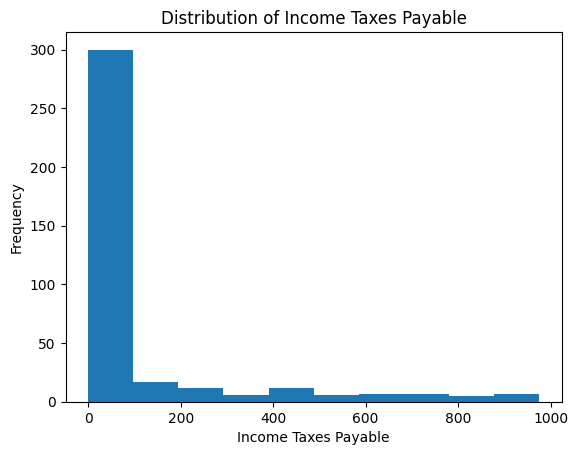

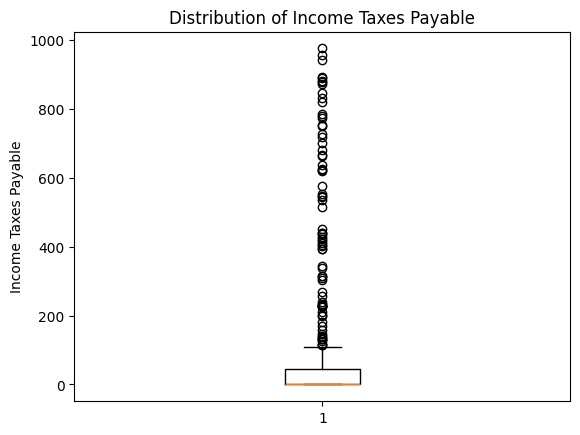

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Income Taxes Payable' is in the Balance Sheet DataFrame (bs_dfs_merged)
income_taxes_payable = bs_dfs_merged['Income Taxes Payable']

# Convert 'income_taxes_payable' to numeric, coercing errors to NaN
income_taxes_payable = pd.to_numeric(income_taxes_payable, errors='coerce')

# Remove NaN values for plotting
income_taxes_payable_clean = income_taxes_payable[~np.isnan(income_taxes_payable)]

# Descriptive statistics
print(income_taxes_payable_clean.describe())

# Histogram
plt.hist(income_taxes_payable_clean)
plt.title('Distribution of Income Taxes Payable')
plt.xlabel('Income Taxes Payable')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.boxplot(income_taxes_payable_clean)
plt.title('Distribution of Income Taxes Payable')
plt.ylabel('Income Taxes Payable')
plt.show()

In [ ]:
# Get the data type of each column
column_types = bs_dfs_merged.dtypes

# Print the column types
print(column_types)

# Alternatively, you can display the data types in a more readable format:
for column_name, data_type in column_types.items():
    print(f"Column: {column_name}, Data Type: {data_type}")

0
Period End Date                              object
Cash and Short Term Investments              object
Cash & Equivalents                           object
Accounts Receivable - Trade, Net             object
Accounts Receivable - Trade, Gross           object
Total Receivables, Net                       object
Receivables - Other                          object
Total Current Assets                         object
Property/Plant/Equipment, Total - Net        object
Long Term Investments                        object
Other Long Term Assets, Total                object
Defered Income Tax - Long Term Asset         object
Other Long Term Assets                       object
Total Assets                                float64
Notes Payable/Short Term Debt                object
Current Port. of LT Debt/Capital Leases      object
Other Current liabilities, Total             object
Income Taxes Payable                         object
Other Payables                               object
Total Curr

In [ ]:
import pandas as pd

# Get a list of all column names except "Company name"
columns_to_convert = [col for col in bs_dfs_merged.columns if col != 'Company name']

# Convert the specified columns to integers, handling errors
for column in columns_to_convert:
    bs_dfs_merged[column] = pd.to_numeric(bs_dfs_merged[column], errors='coerce').astype(pd.Int64Dtype())

# Print the updated data types to verify the changes
print(bs_dfs_merged.dtypes)

0
Period End Date                              Int64
Cash and Short Term Investments              Int64
Cash & Equivalents                           Int64
Accounts Receivable - Trade, Net             Int64
Accounts Receivable - Trade, Gross           Int64
Total Receivables, Net                       Int64
Receivables - Other                          Int64
Total Current Assets                         Int64
Property/Plant/Equipment, Total - Net        Int64
Long Term Investments                        Int64
Other Long Term Assets, Total                Int64
Defered Income Tax - Long Term Asset         Int64
Other Long Term Assets                       Int64
Total Assets                                 Int64
Notes Payable/Short Term Debt                Int64
Current Port. of LT Debt/Capital Leases      Int64
Other Current liabilities, Total             Int64
Income Taxes Payable                         Int64
Other Payables                               Int64
Total Current Liabilities    

<ipython-input-126-3e4061ef35a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs_dfs_merged[column] = pd.to_numeric(bs_dfs_merged[column], errors='coerce').astype(pd.Int64Dtype())


0       Period End Date  Cash and Short Term Investments  Cash & Equivalents  \
count               0.0                             11.0               144.0   
unique             <NA>                             <NA>                <NA>   
top                <NA>                             <NA>                <NA>   
freq               <NA>                             <NA>                <NA>   
mean               <NA>                       687.545455           80.319444   
std                <NA>                       284.845349          227.484101   
min                <NA>                              9.0                 0.0   
25%                <NA>                            562.0                 0.0   
50%                <NA>                            768.0                 0.0   
75%                <NA>                            865.5                 0.0   
max                <NA>                            995.0               995.0   

0       Accounts Receivable - Trade, Ne

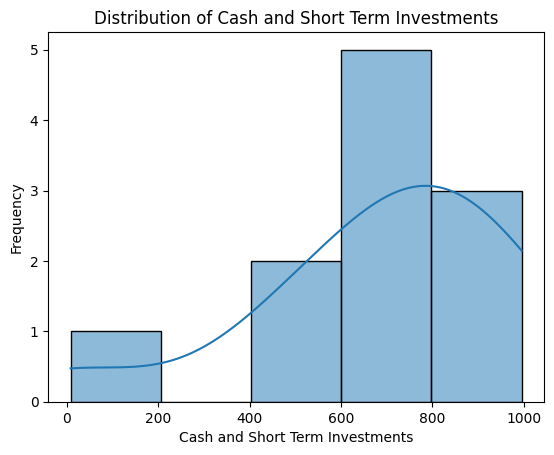

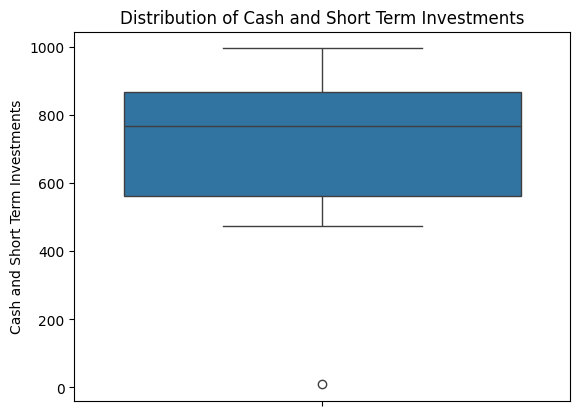

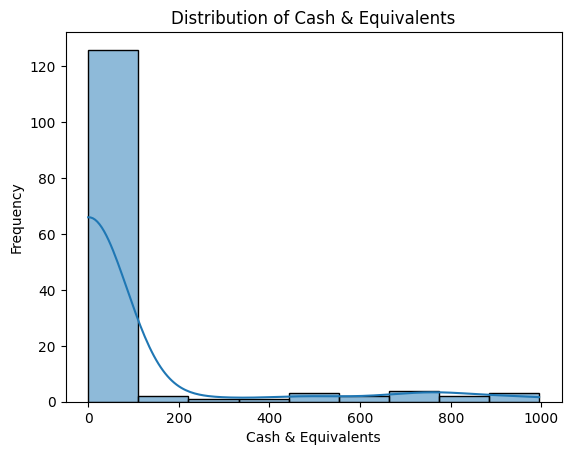

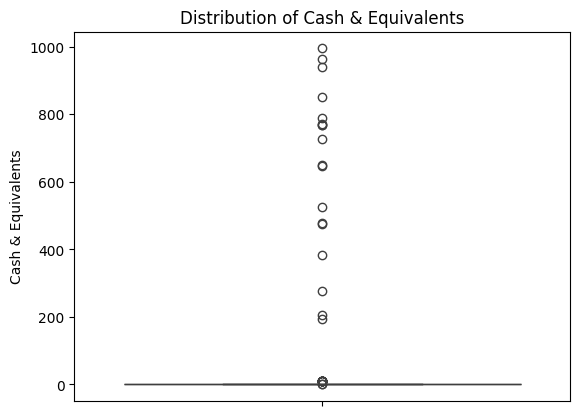

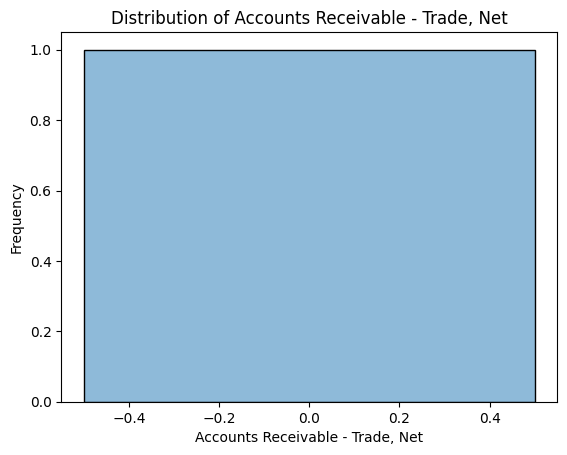

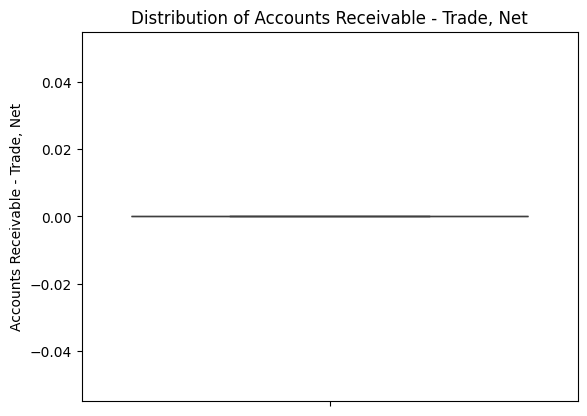

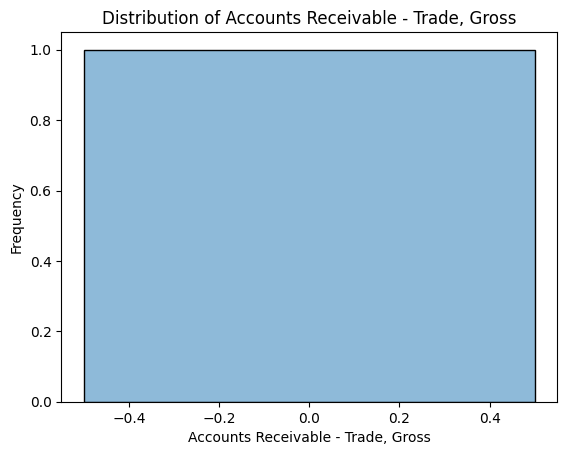

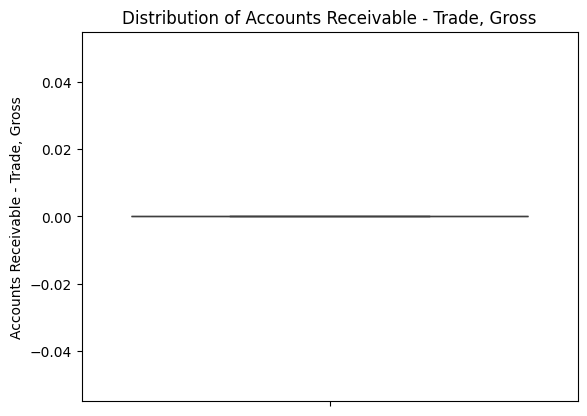

Skipping Total Receivables, Net due to no data after removing NaNs.


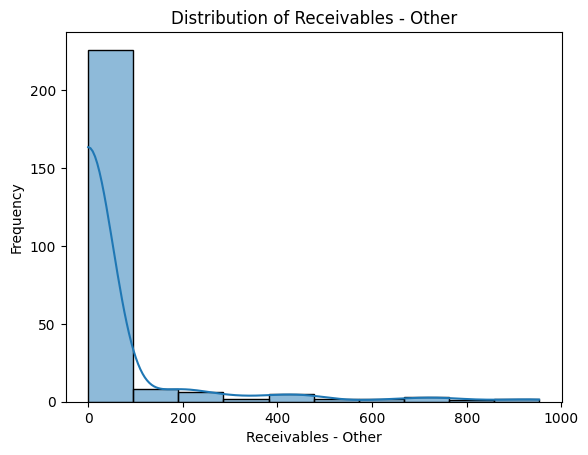

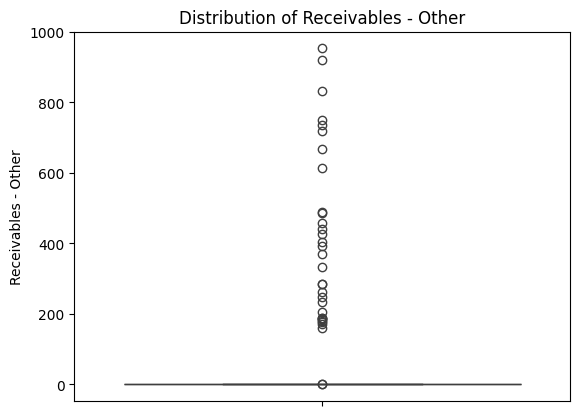

Skipping Total Current Assets due to no data after removing NaNs.


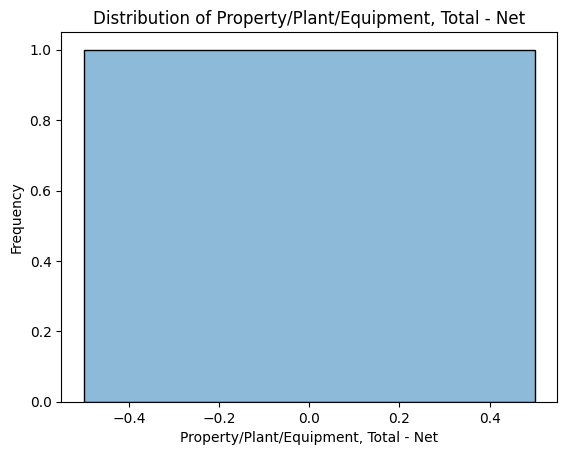

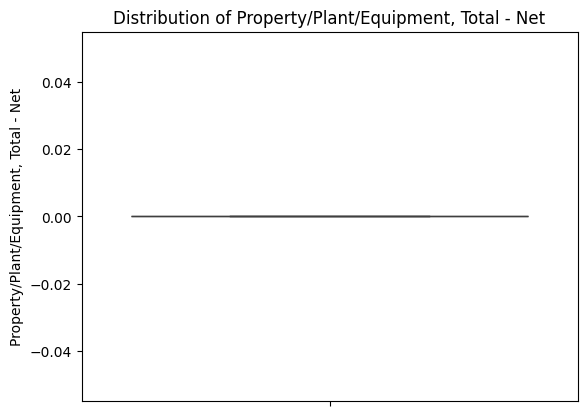

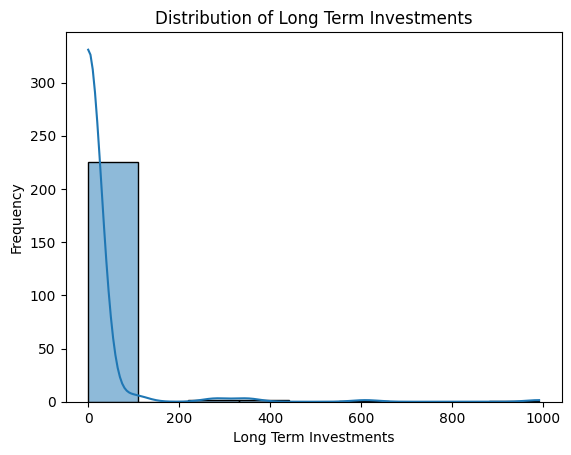

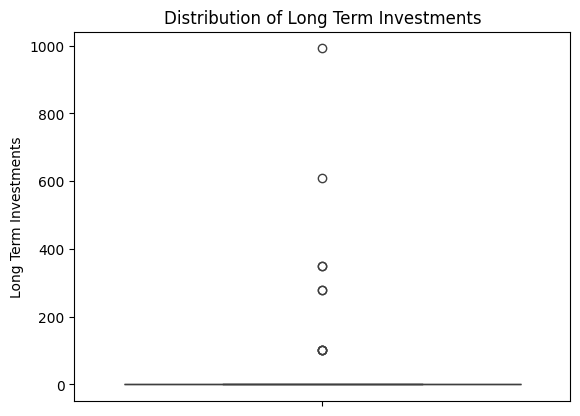

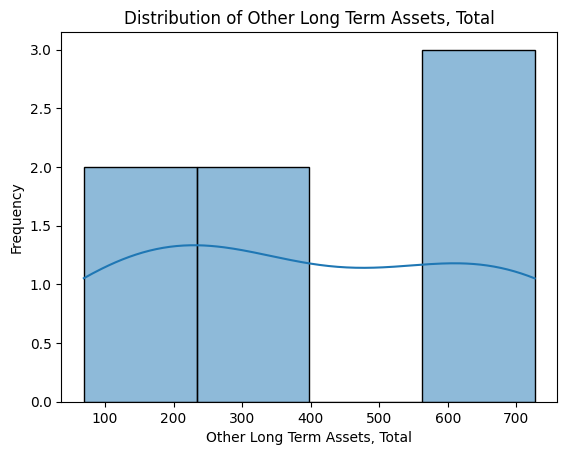

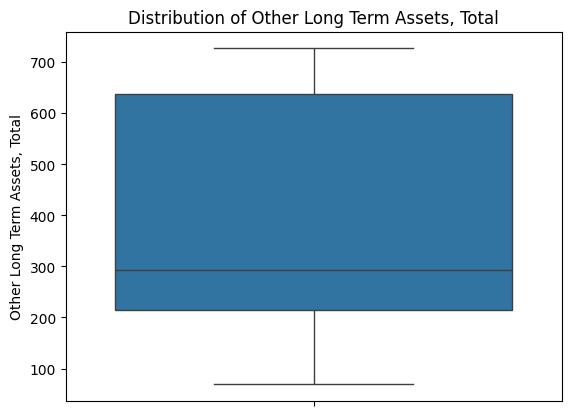

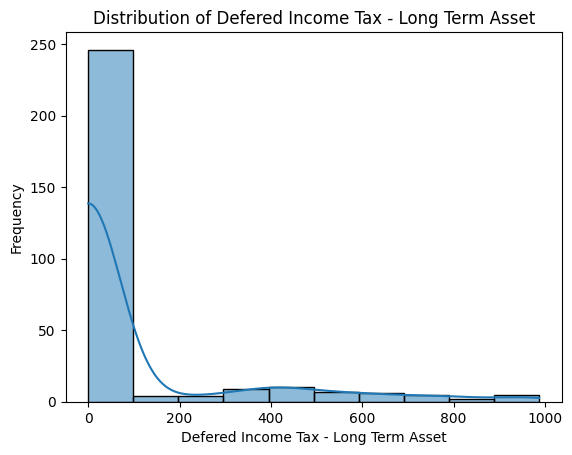

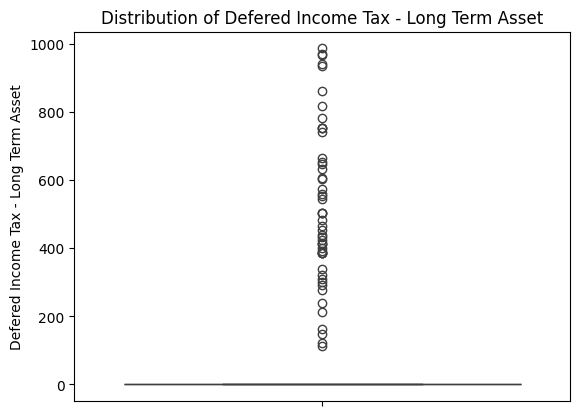

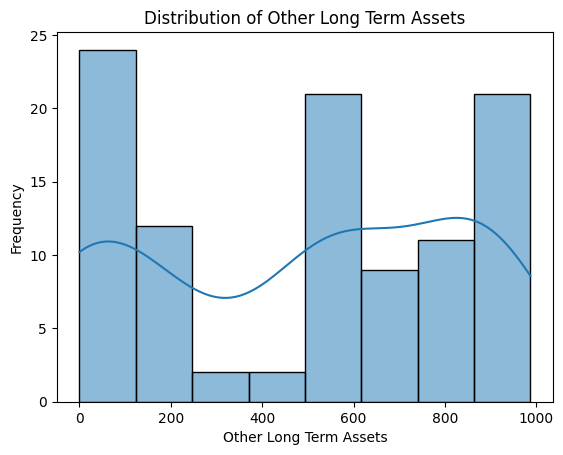

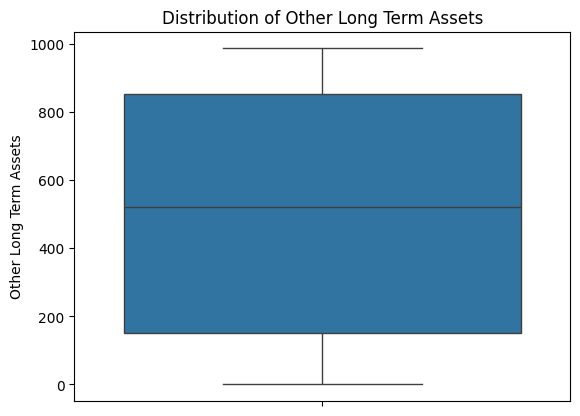

Skipping Total Assets due to no data after removing NaNs.


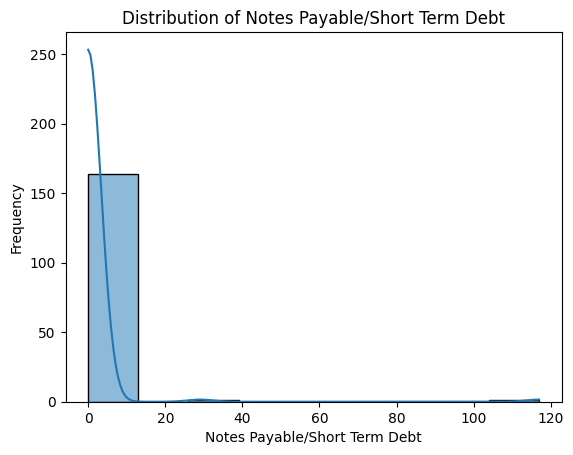

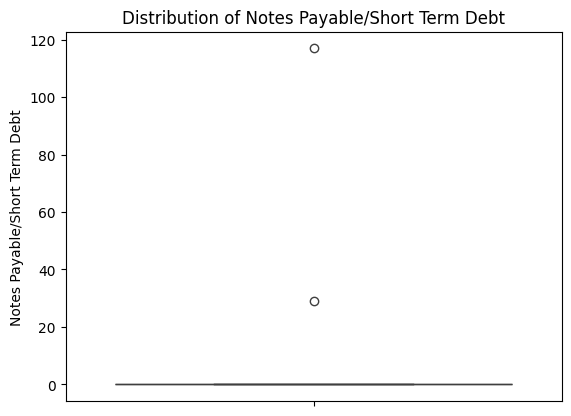

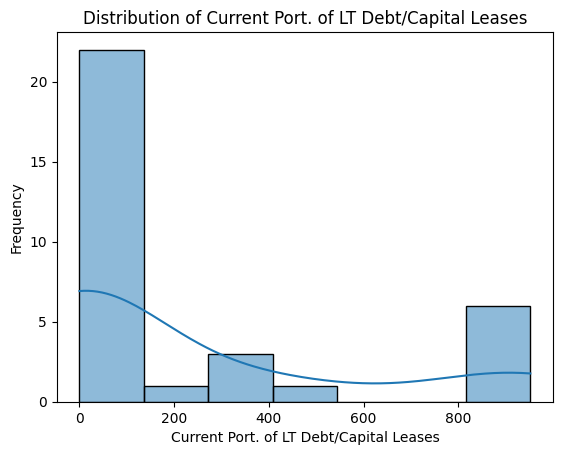

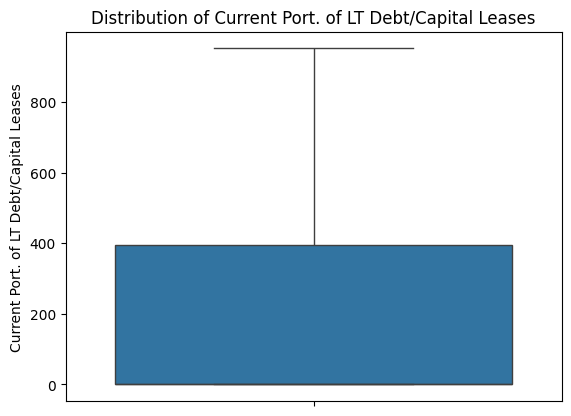

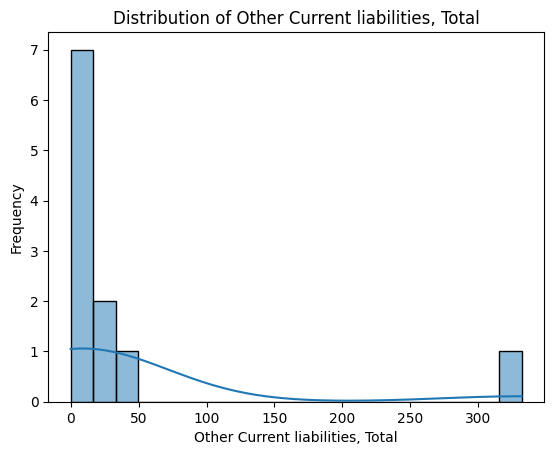

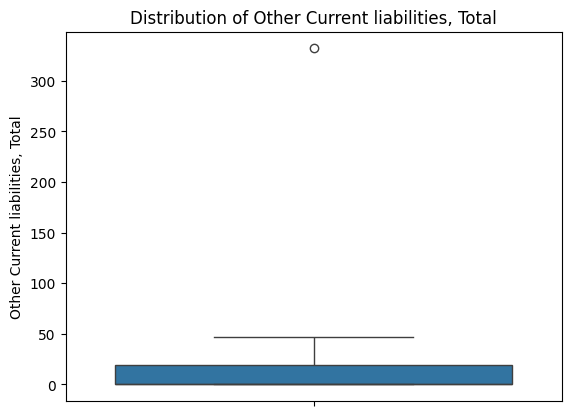

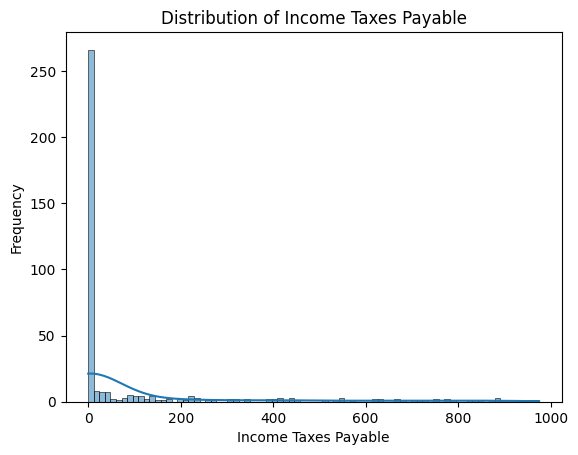

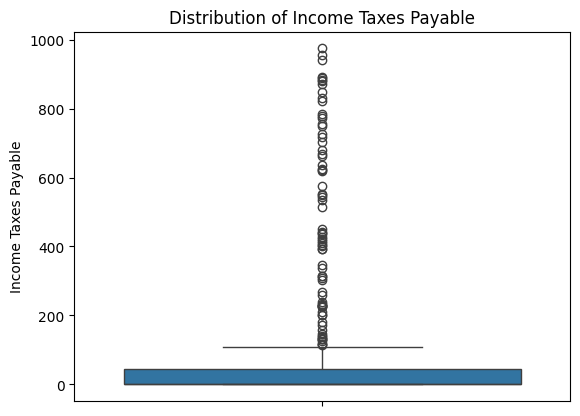

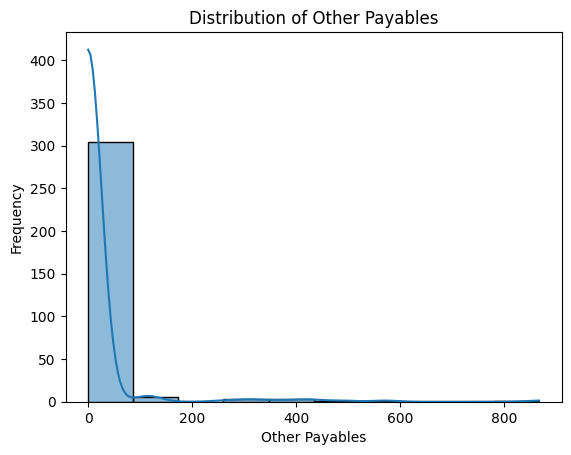

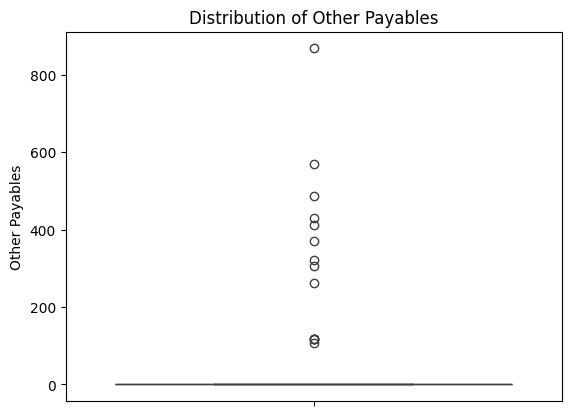

Skipping Total Current Liabilities due to no data after removing NaNs.


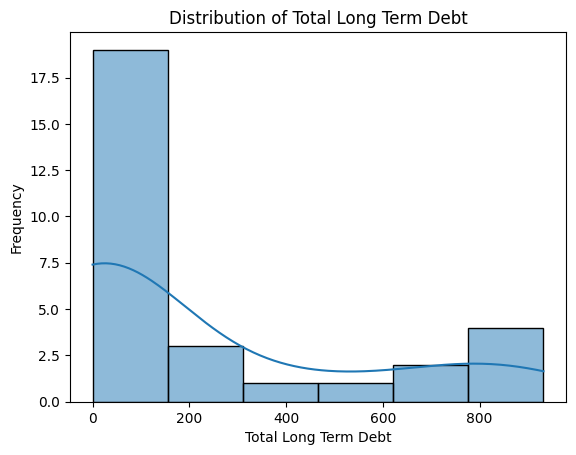

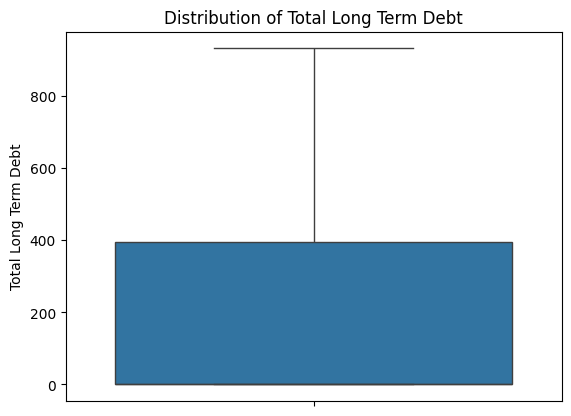

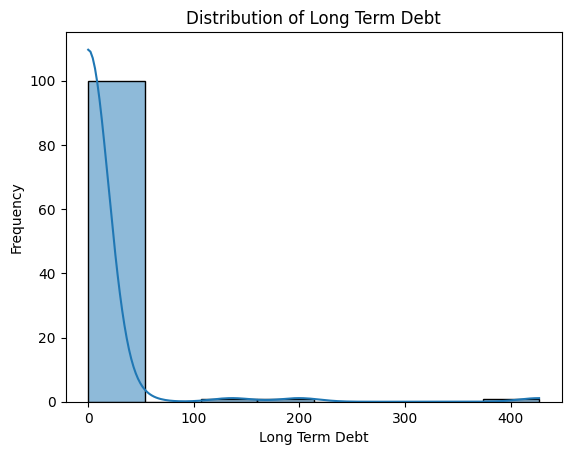

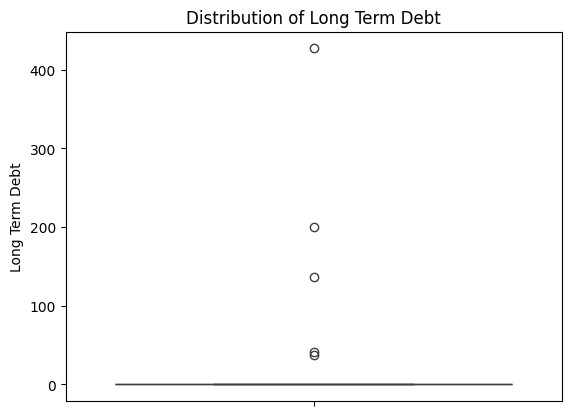

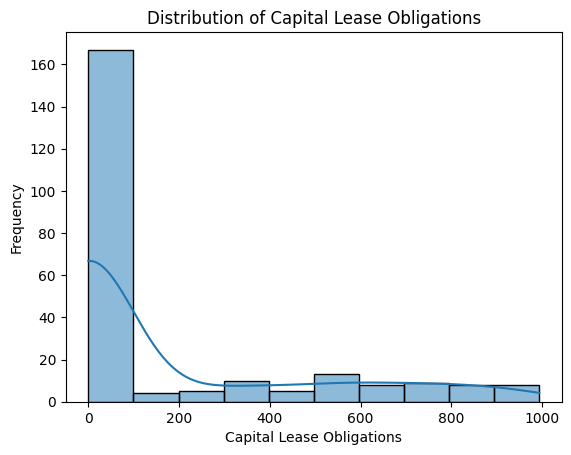

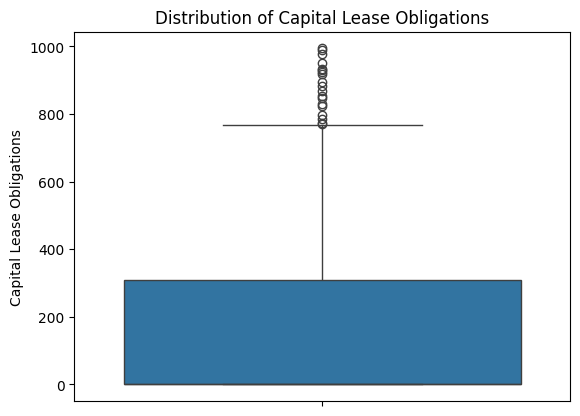

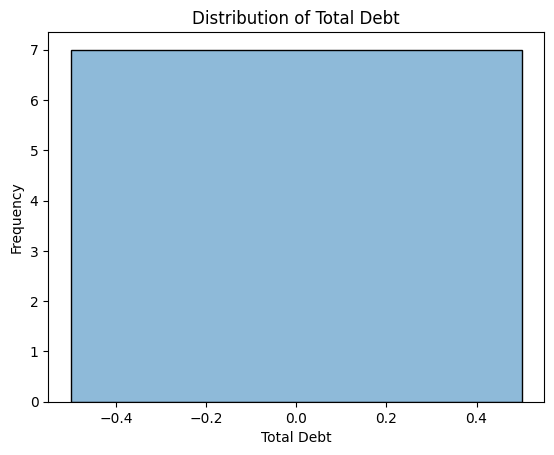

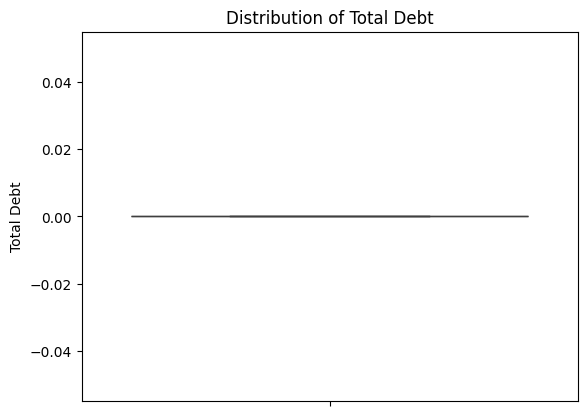

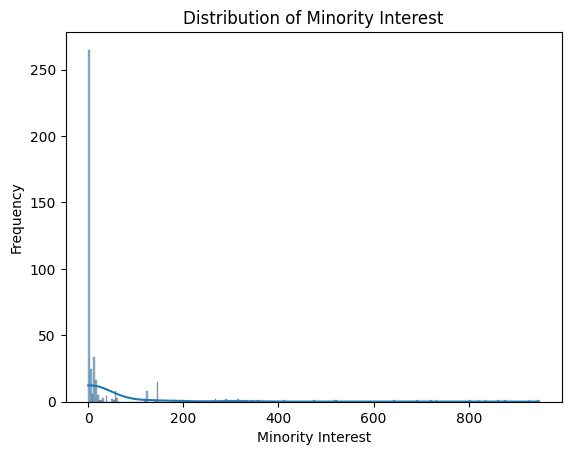

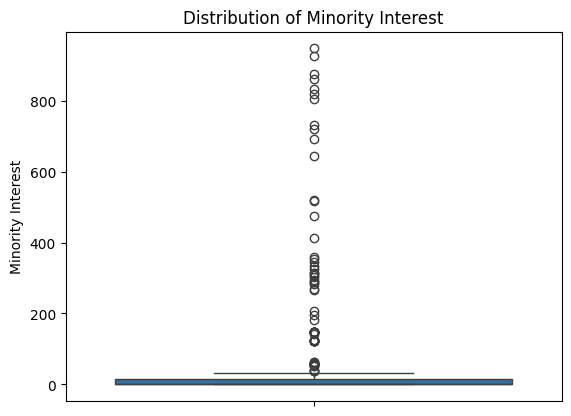

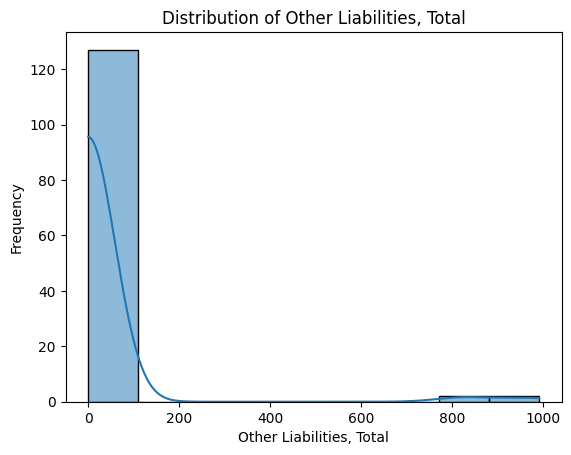

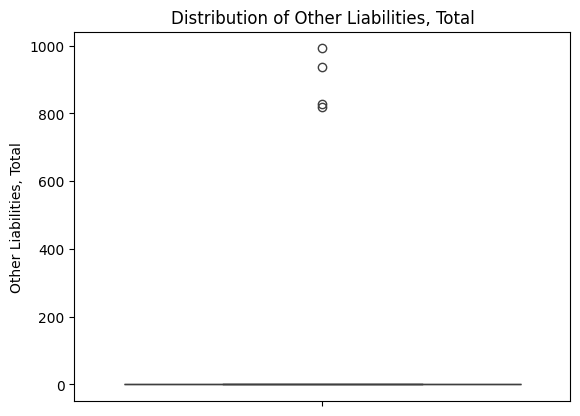

Skipping Total Liabilities due to no data after removing NaNs.
Skipping Common Stock, Total due to no data after removing NaNs.
Skipping Common Stock due to no data after removing NaNs.


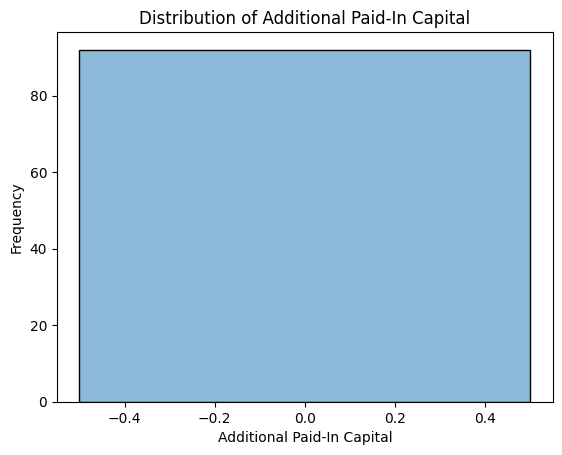

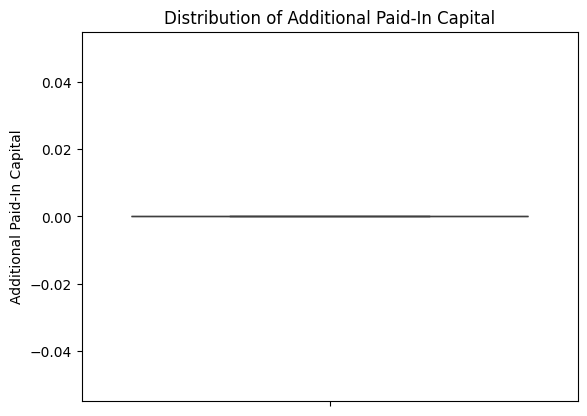

Skipping Retained Earnings (Accumulated Deficit) due to no data after removing NaNs.
Skipping Total Equity due to no data after removing NaNs.
Skipping Total Liabilities & Shareholders' Equity due to no data after removing NaNs.
Skipping Total Common Shares Outstanding due to no data after removing NaNs.
Skipping Shares Outs - Common Stock Primary Issue due to no data after removing NaNs.


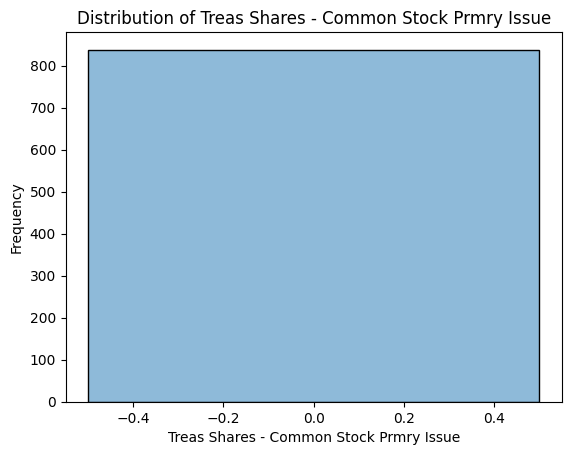

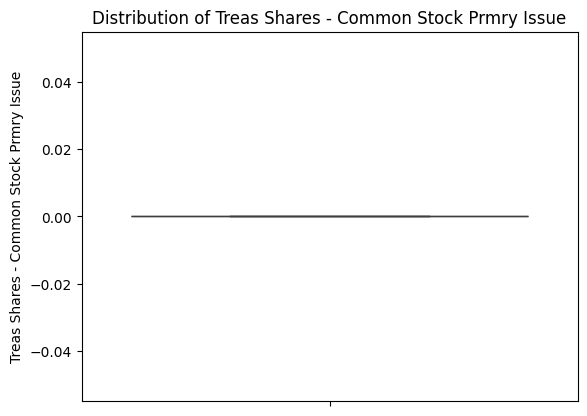

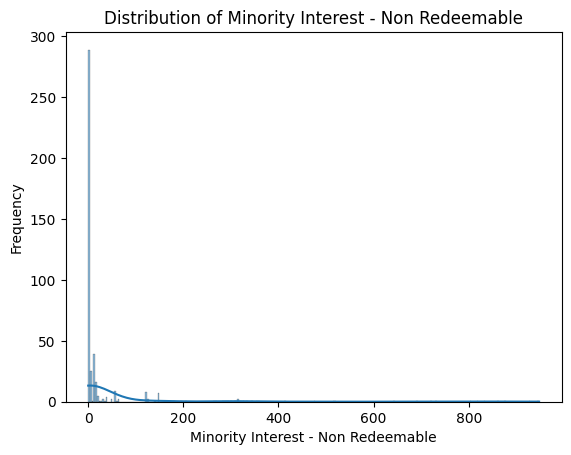

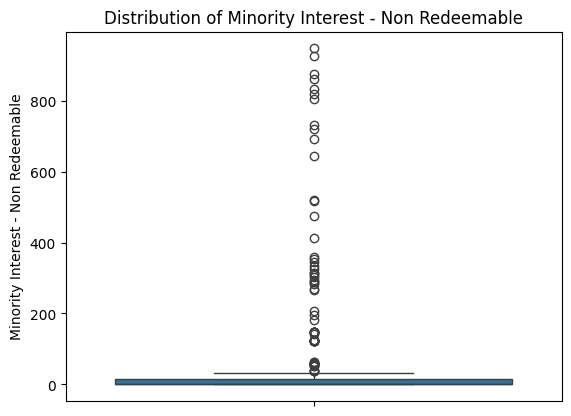

Skipping Total Equity & Minority Interest due to no data after removing NaNs.


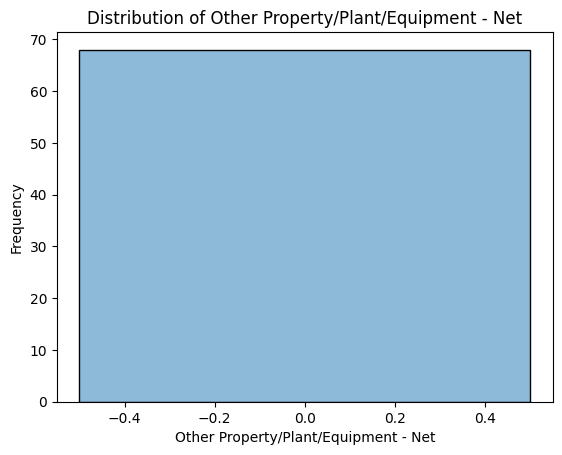

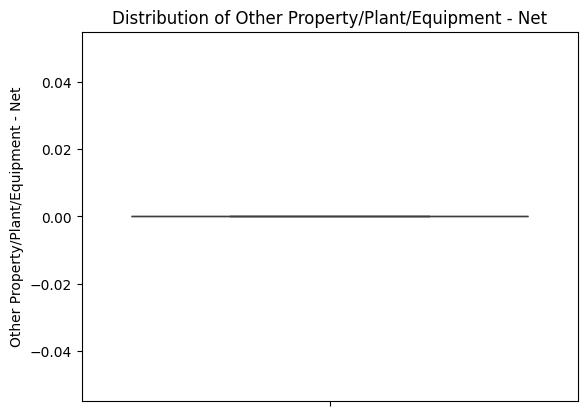

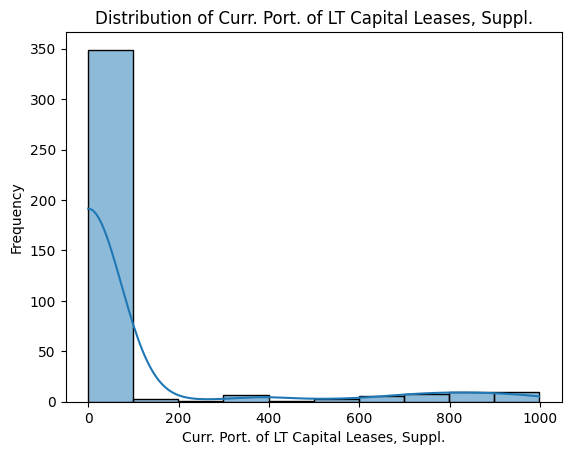

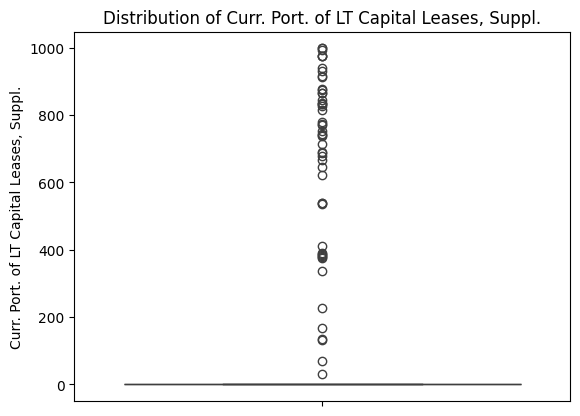

Skipping Total Current Assets less Inventory due to no data after removing NaNs.


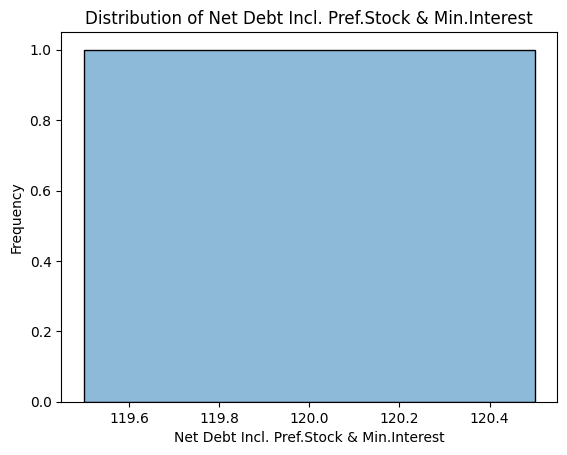

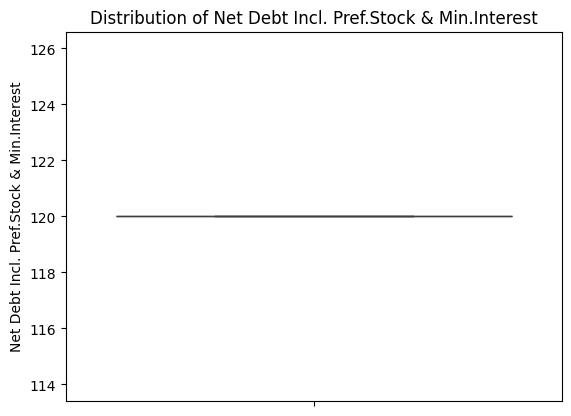

Skipping Tangible Book Value, Common Equity due to no data after removing NaNs.


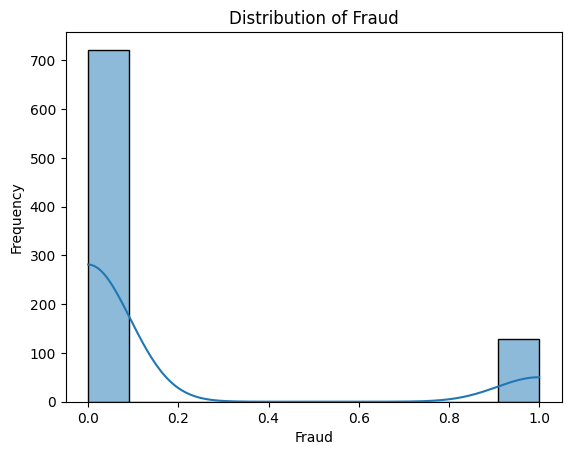

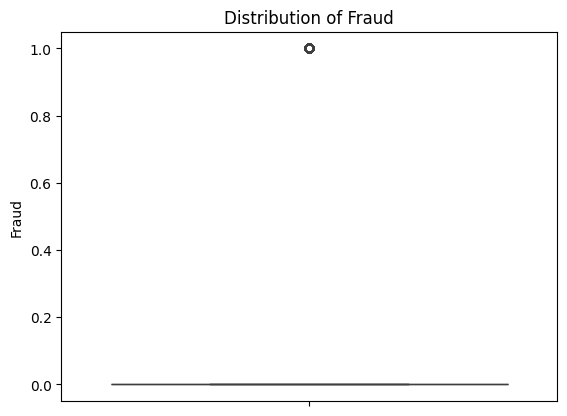

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualizations

# Display summary statistics for all columns (including nullable integers)
print(bs_dfs_merged.describe(include='all'))

# Visualize the distribution of each column (excluding "Company name" and "Period End Date")
for column in bs_dfs_merged.columns:
    if column not in ['Company name', 'Period End Date']:  # Exclude 'Period End Date'
        # Remove NaN values for the current column
        data_to_plot = bs_dfs_merged[column].dropna()

        # Check if there's any data left to plot after removing NaNs
        if data_to_plot.empty:
            print(f"Skipping {column} due to no data after removing NaNs.")
            continue

        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(data_to_plot):  # Add this condition
            # Create a histogram using seaborn
            sns.histplot(data_to_plot, kde=True)  # kde=True adds a kernel density estimate
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

            # Create a box plot using seaborn
            sns.boxplot(y=data_to_plot)
            plt.title(f'Distribution of {column}')
            plt.ylabel(column)
            plt.show()
        else:
            print(f"Skipping {column} because it is not numeric.")

0       Period End Date  Cash and Short Term Investments  Cash & Equivalents  \
count               0.0                             11.0               144.0   
unique             <NA>                             <NA>                <NA>   
top                <NA>                             <NA>                <NA>   
freq               <NA>                             <NA>                <NA>   
mean               <NA>                       687.545455           80.319444   
std                <NA>                       284.845349          227.484101   
min                <NA>                              9.0                 0.0   
25%                <NA>                            562.0                 0.0   
50%                <NA>                            768.0                 0.0   
75%                <NA>                            865.5                 0.0   
max                <NA>                            995.0               995.0   

0       Accounts Receivable - Trade, Ne

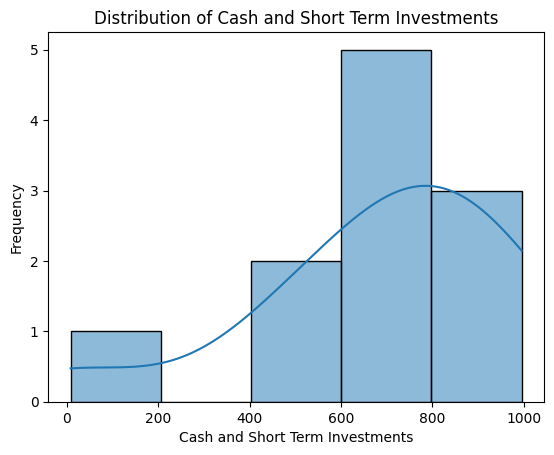

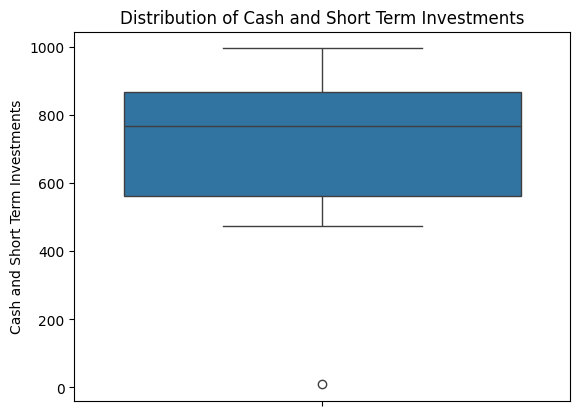

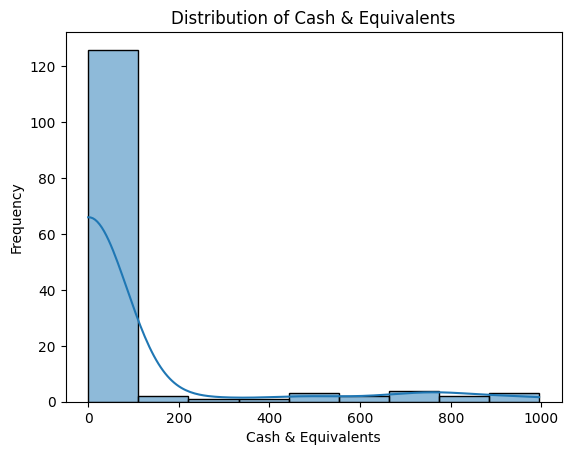

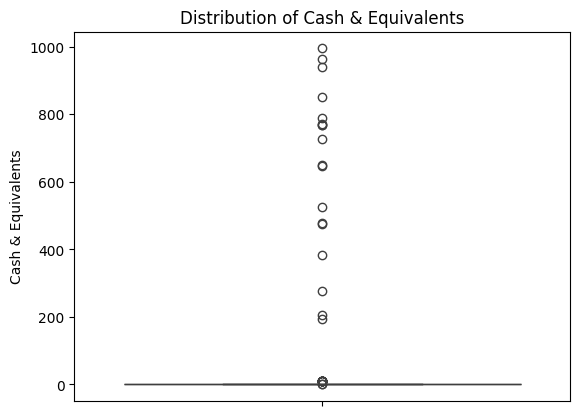

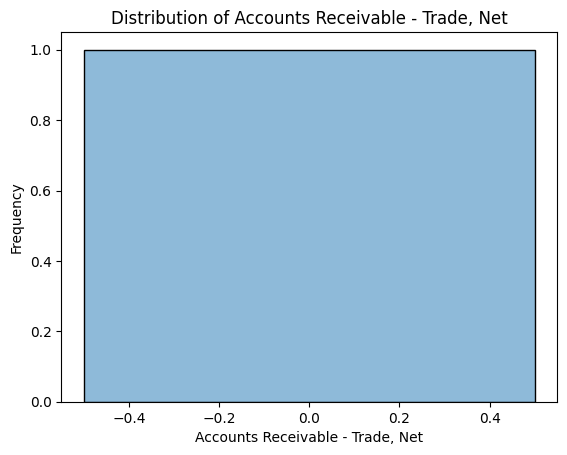

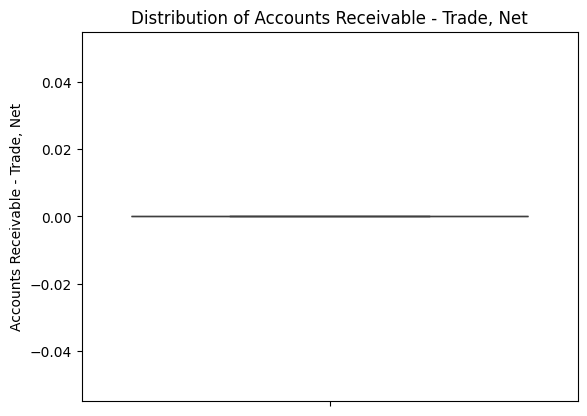

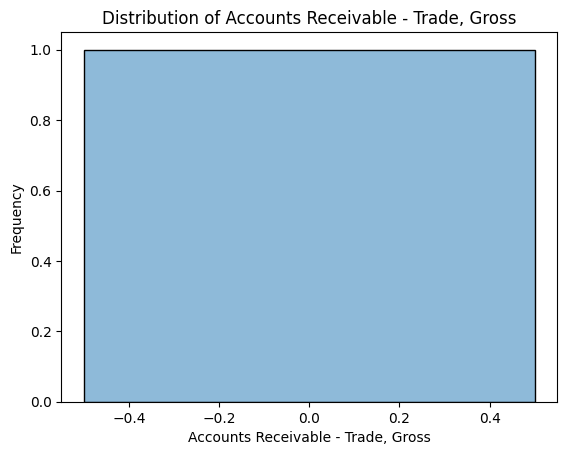

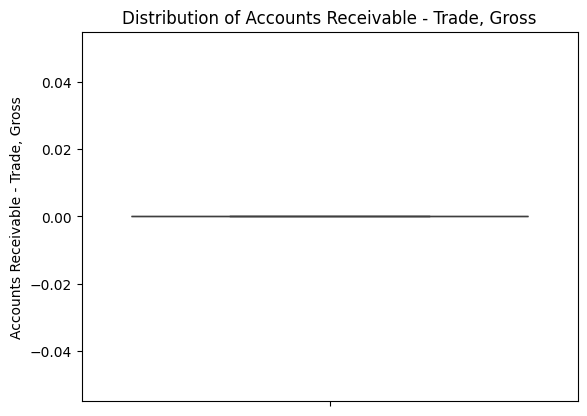

Skipping Total Receivables, Net due to no data after removing NaNs.


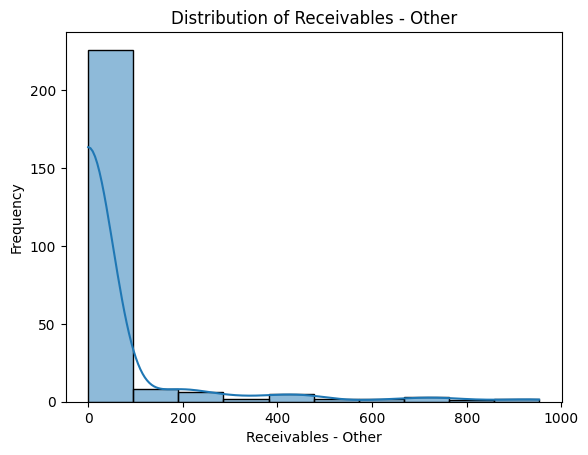

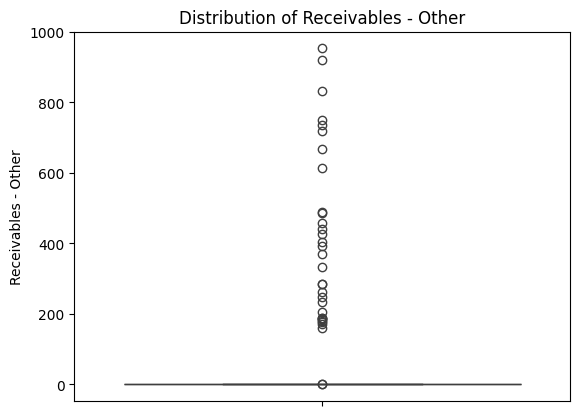

Skipping Total Current Assets due to no data after removing NaNs.


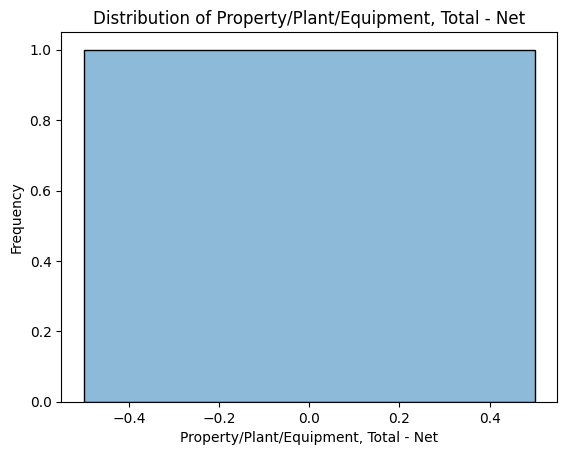

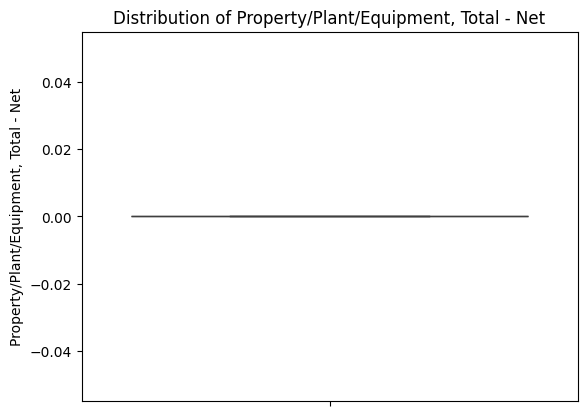

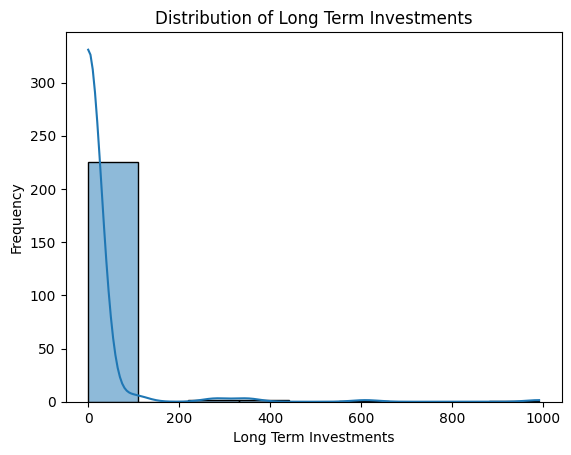

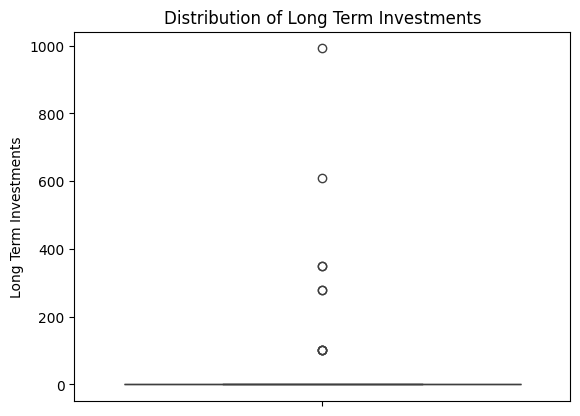

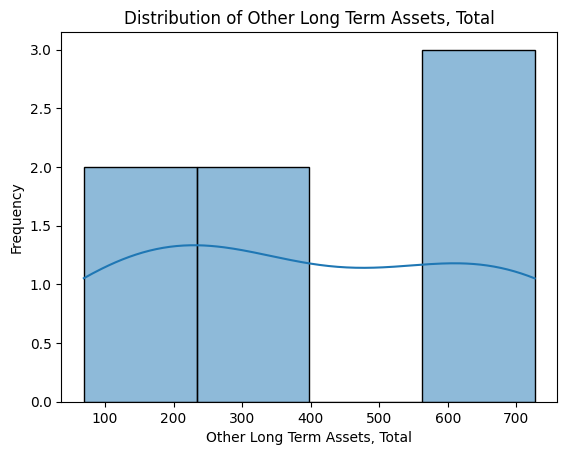

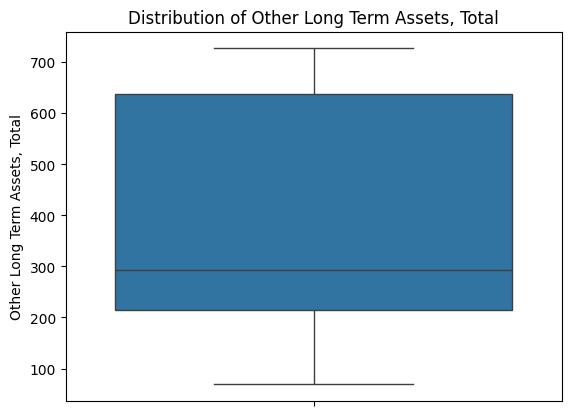

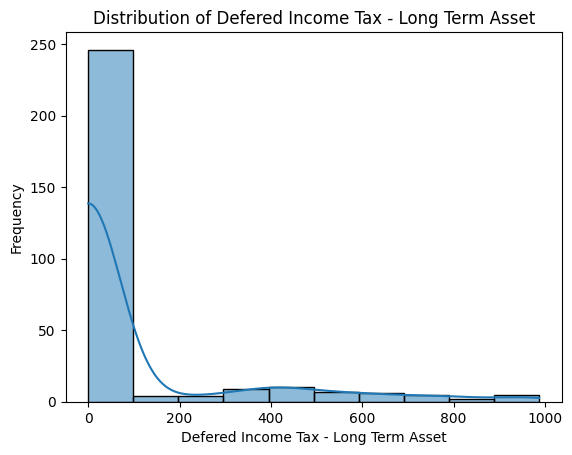

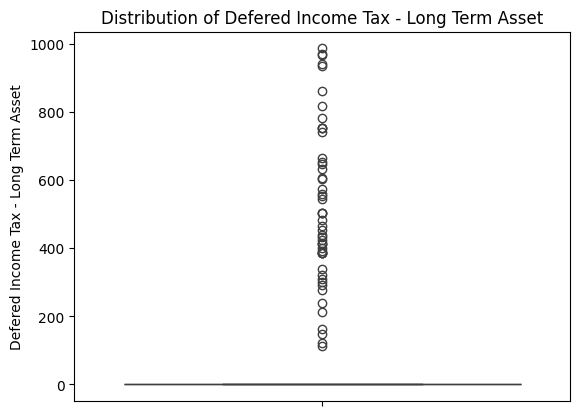

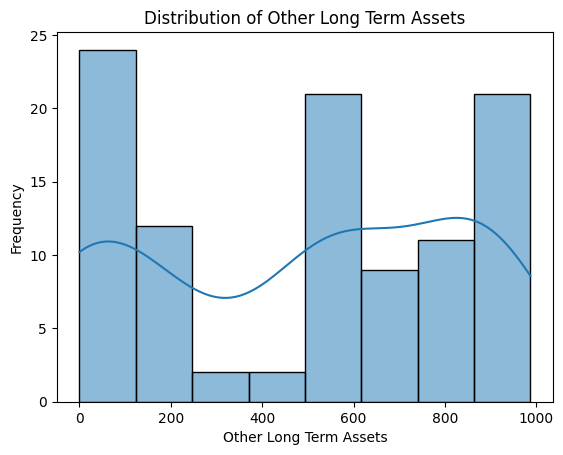

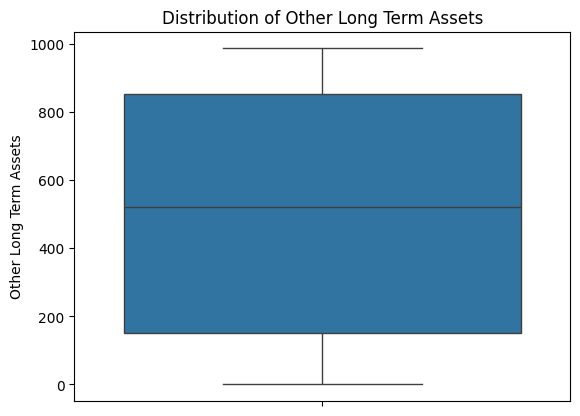

Skipping Total Assets due to no data after removing NaNs.


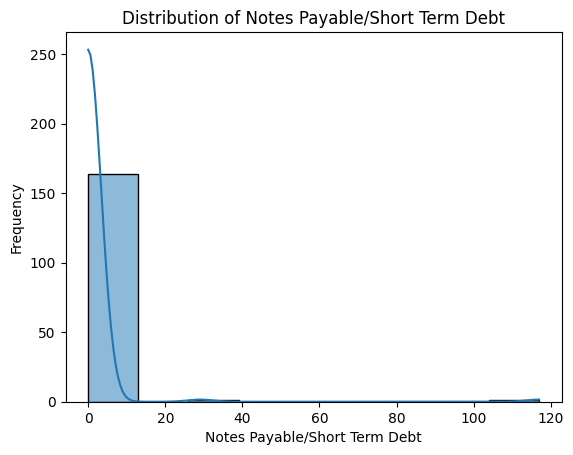

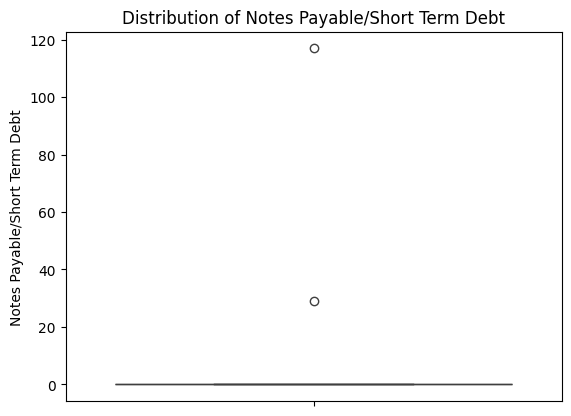

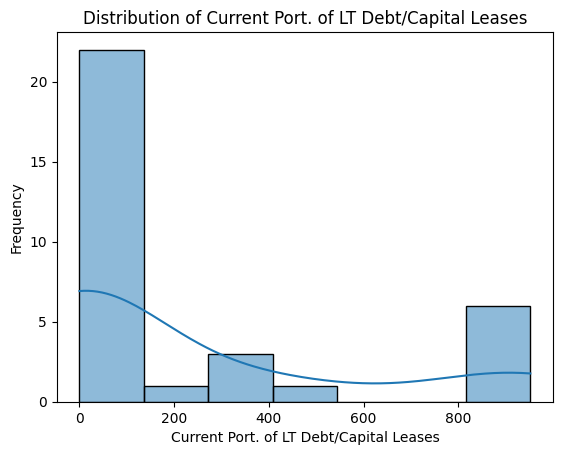

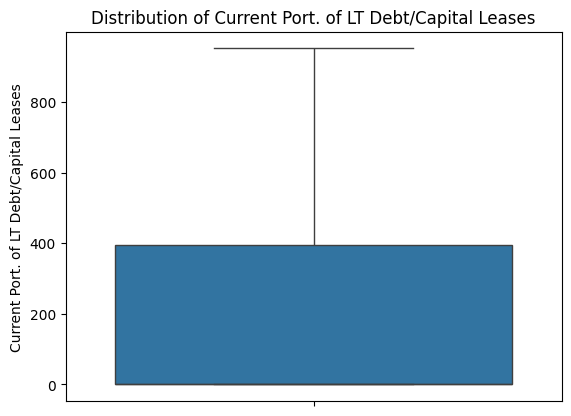

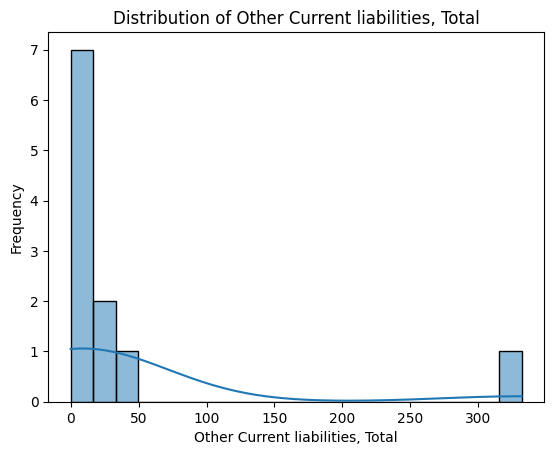

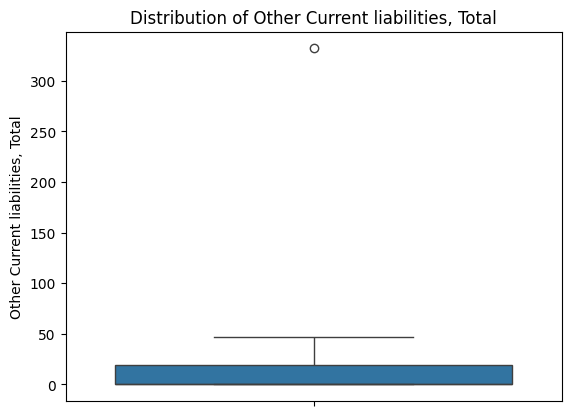

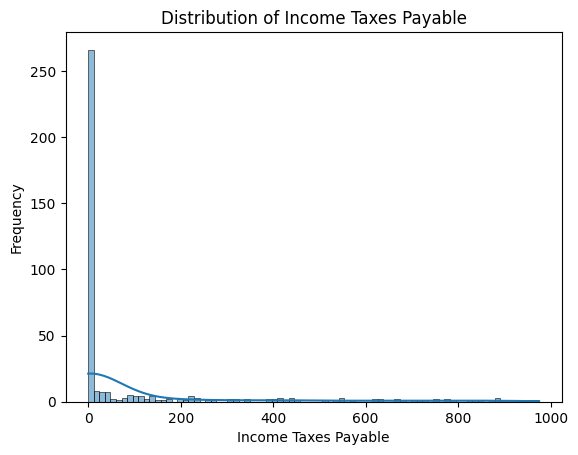

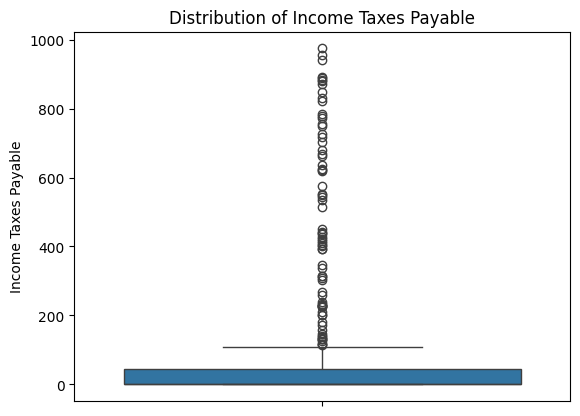

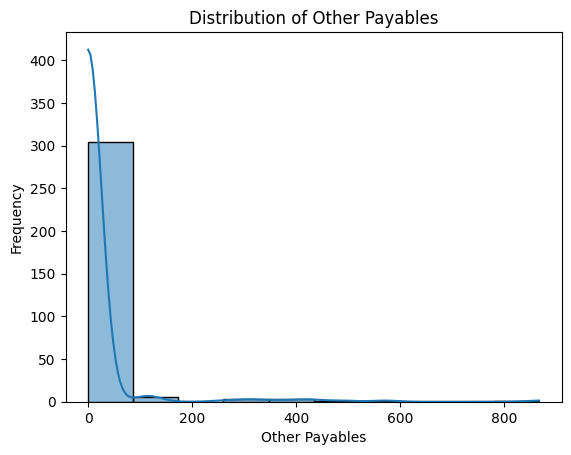

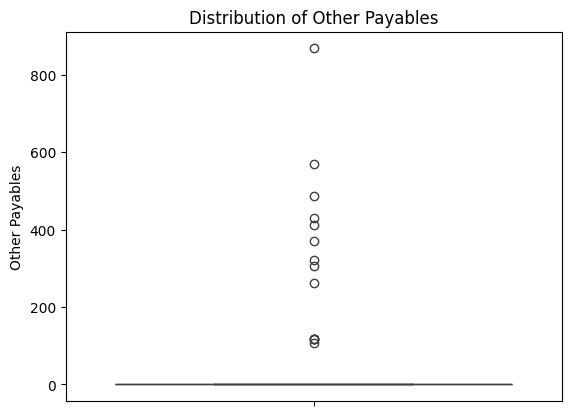

Skipping Total Current Liabilities due to no data after removing NaNs.


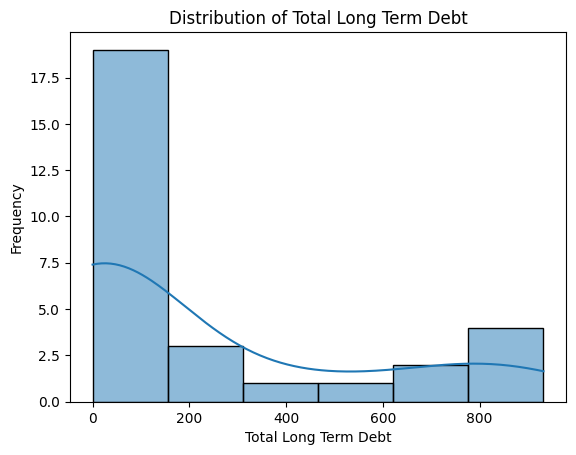

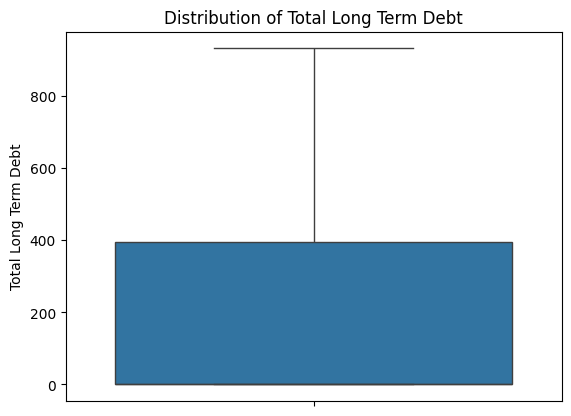

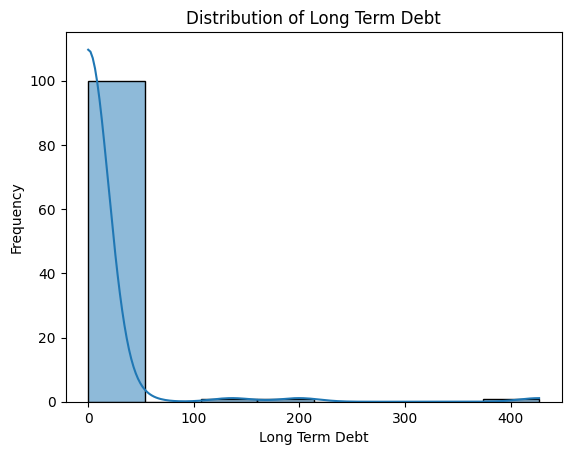

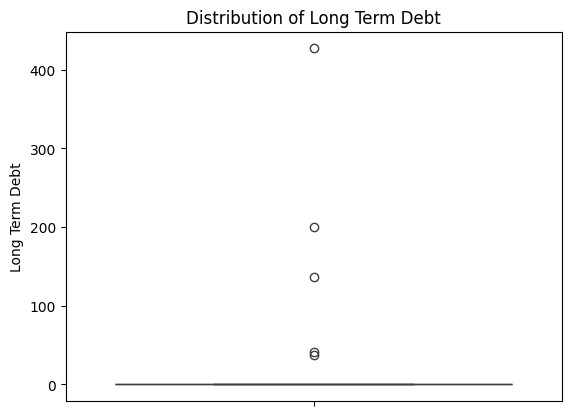

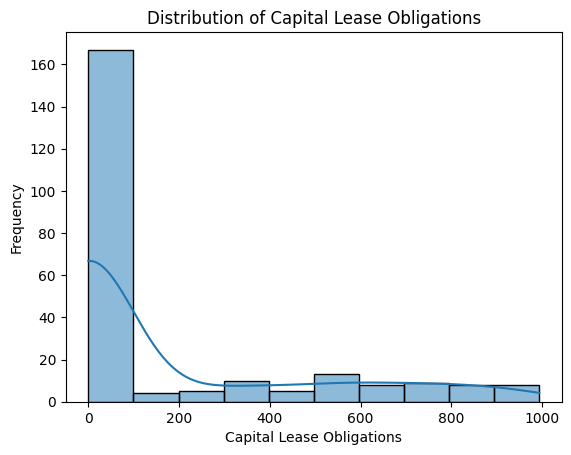

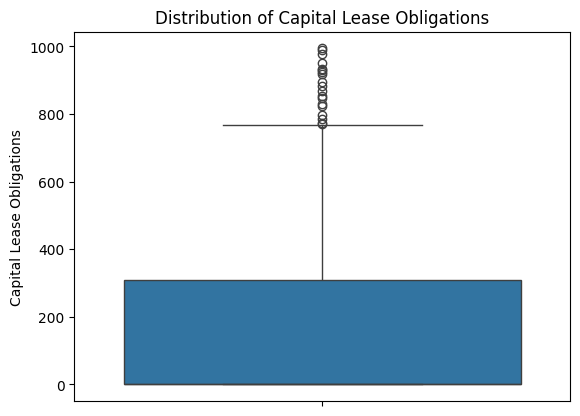

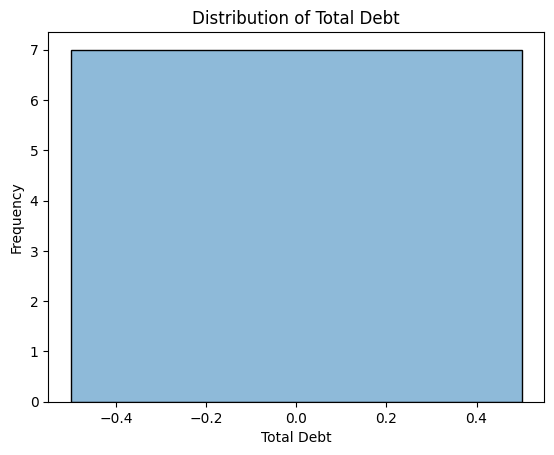

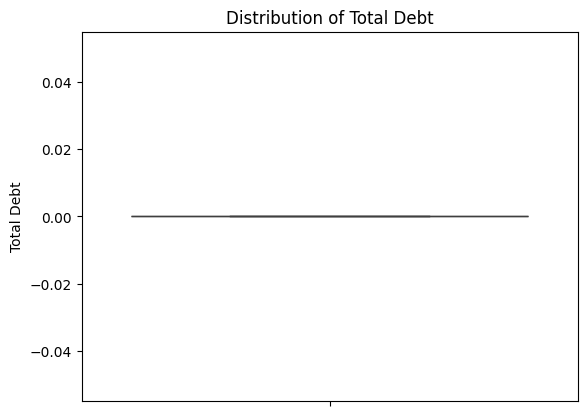

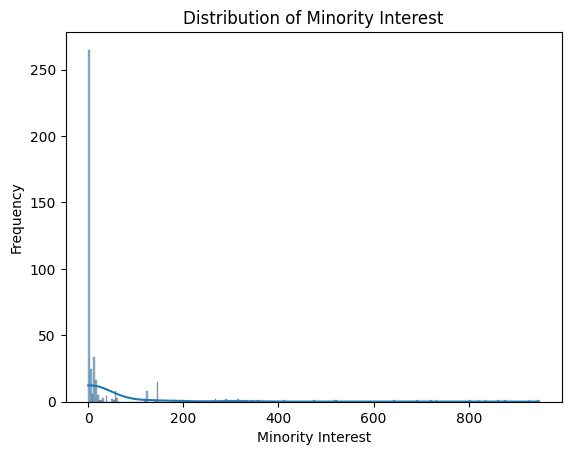

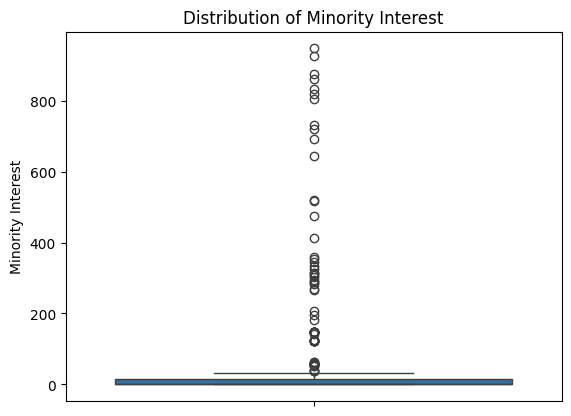

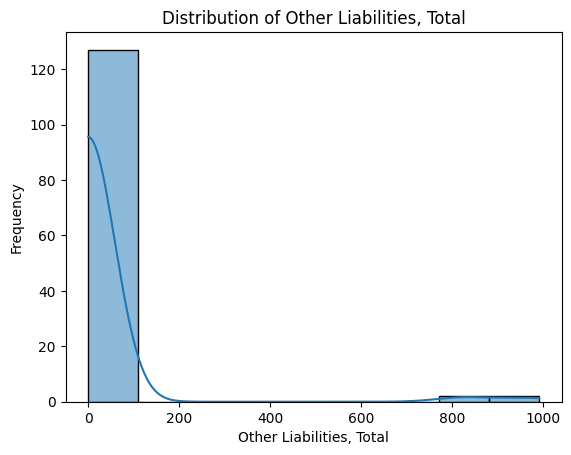

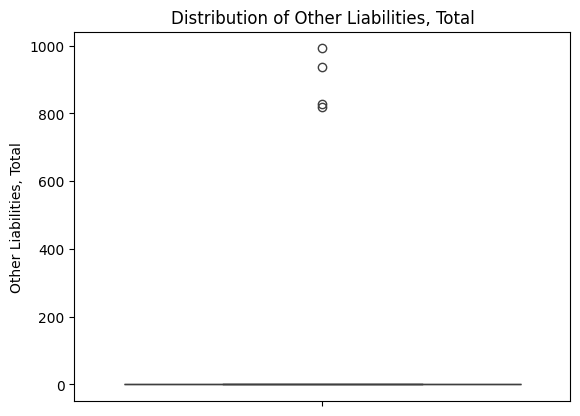

Skipping Total Liabilities due to no data after removing NaNs.
Skipping Common Stock, Total due to no data after removing NaNs.
Skipping Common Stock due to no data after removing NaNs.


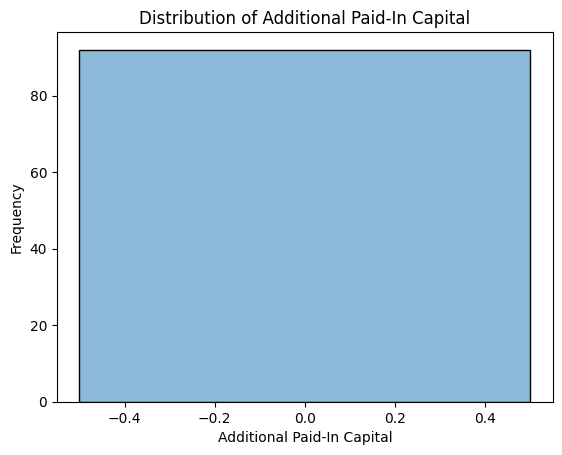

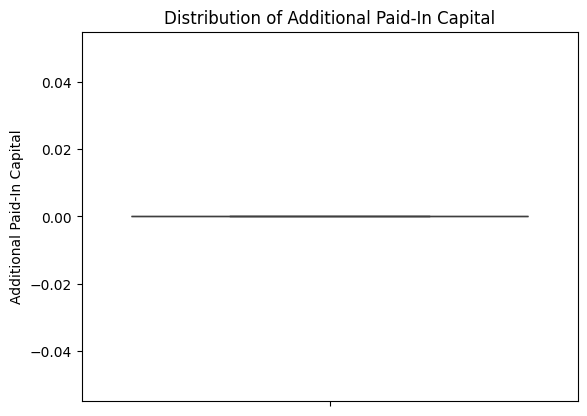

Skipping Retained Earnings (Accumulated Deficit) due to no data after removing NaNs.
Skipping Total Equity due to no data after removing NaNs.
Skipping Total Liabilities & Shareholders' Equity due to no data after removing NaNs.
Skipping Total Common Shares Outstanding due to no data after removing NaNs.
Skipping Shares Outs - Common Stock Primary Issue due to no data after removing NaNs.


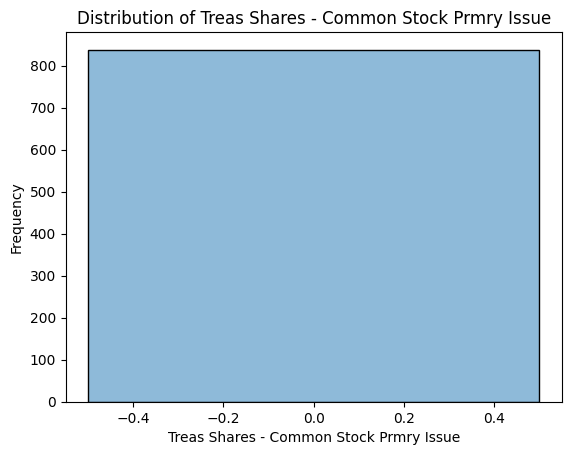

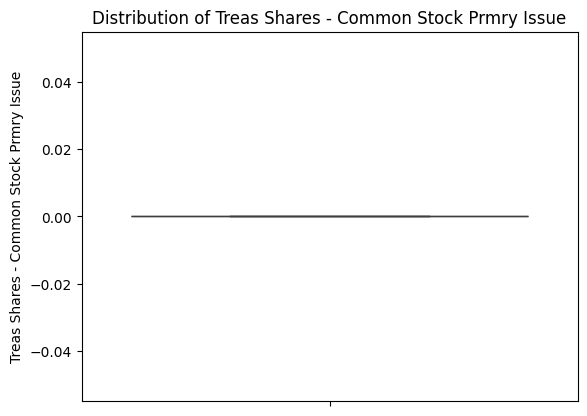

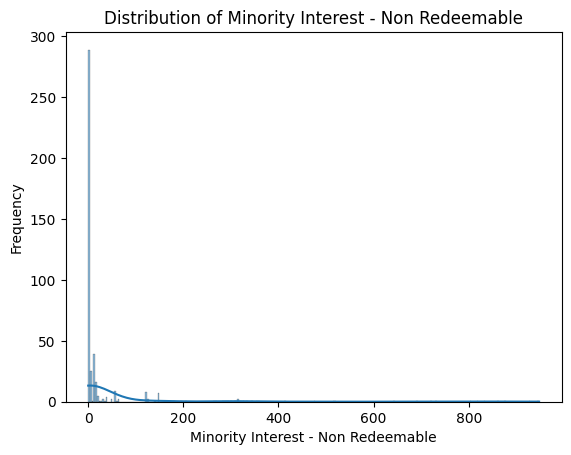

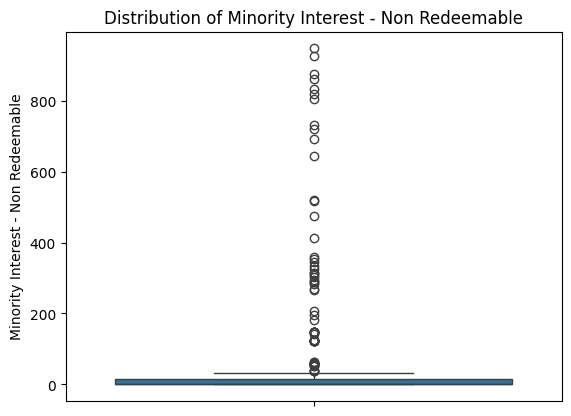

Skipping Total Equity & Minority Interest due to no data after removing NaNs.


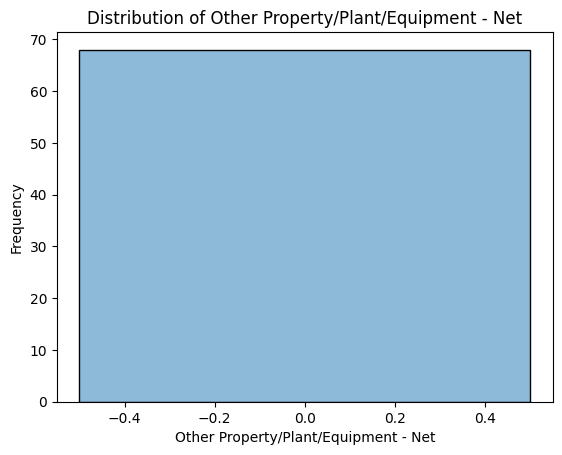

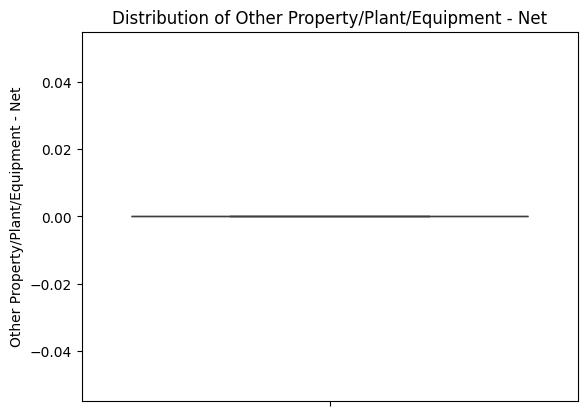

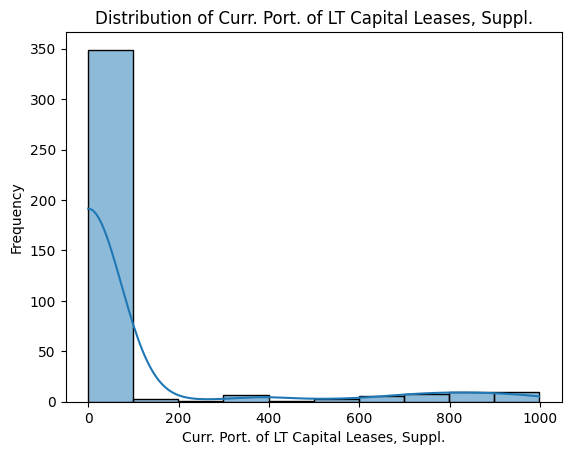

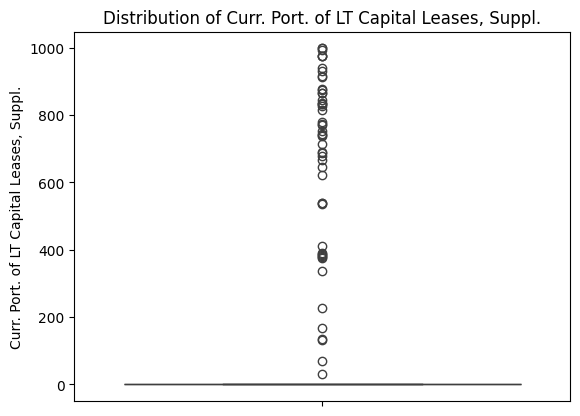

Skipping Total Current Assets less Inventory due to no data after removing NaNs.


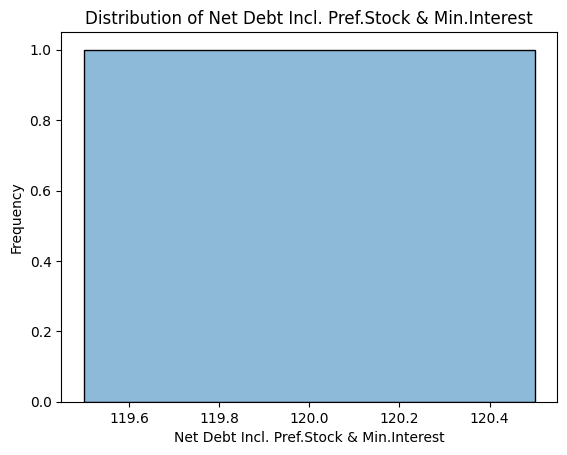

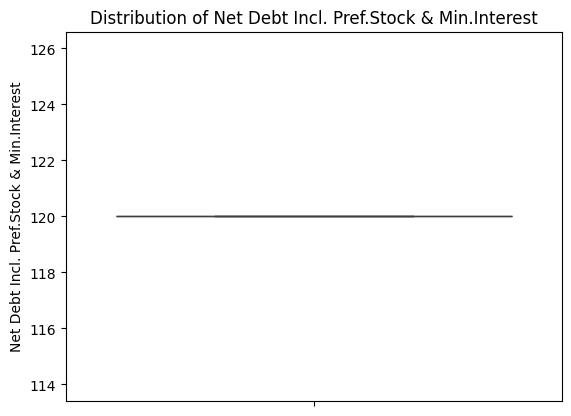

Skipping Tangible Book Value, Common Equity due to no data after removing NaNs.


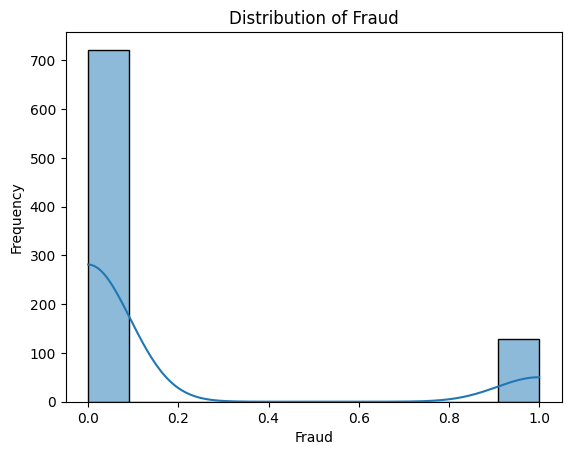

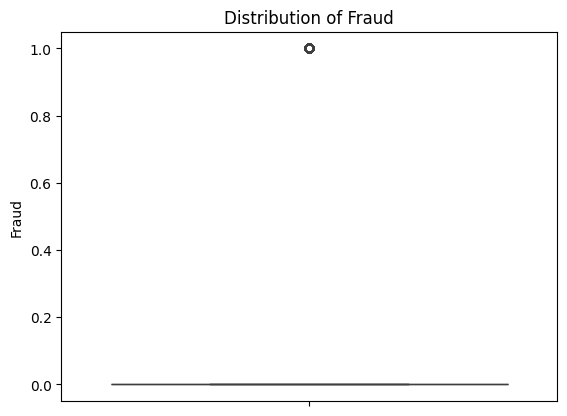

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualizations

# Display summary statistics for all columns (including nullable integers)
print(bs_dfs_merged.describe(include='all'))

# Visualize the distribution of each column (excluding "Company name" and "Period End Date")
for column in bs_dfs_merged.columns:
    if column not in ['Company name', 'Period End Date']: # Exclude 'Period End Date'
        # Remove NaN values for the current column
        data_to_plot = bs_dfs_merged[column].dropna() # Added this line to remove NaNs

        # Check if there's any data left to plot after removing NaNs
        if data_to_plot.empty:
            print(f"Skipping {column} due to no data after removing NaNs.")
            continue

        # Create a histogram using seaborn
        sns.histplot(data_to_plot, kde=True)  # kde=True adds a kernel density estimate
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

        # Create a box plot using seaborn
        sns.boxplot(y=data_to_plot)  # Use the NaN-removed data for the box plot
        plt.title(f'Distribution of {column}')
        plt.ylabel(column)
        plt.show()

# Mock up Model

In [3]:
ph_df = pd.read_csv("/content/drive/MyDrive/EC439/ph_df.csv")
bs_df = pd.read_csv("/content/drive/MyDrive/EC439/bs_df.csv")
cf_df = pd.read_csv("/content/drive/MyDrive/EC439/cf_df.csv")
is_df = pd.read_csv("/content/drive/MyDrive/EC439/is_df.csv")
ratio_df = pd.read_csv("/content/drive/MyDrive/EC439/ratio_df.csv")

## Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Normalize 'Close' column in ph_df, grouped by 'Company name'
ph_df_normalized = normalize_by_group(ph_df, 'Company name', ['Close'])

# Display the normalized DataFrame
ph_df_normalized.head()

Exchange Date     Close Company name  Fraud
0  27-ก.ย.-2024  0.224265          AKR      0
1  20-ก.ย.-2024  0.220588          AKR      0
2  13-ก.ย.-2024  0.216912          AKR      0
3  06-ก.ย.-2024  0.213235          AKR      0
4  30-ส.ค.-2024  0.202206          AKR      0

In [7]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in bs_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize bs_df
bs_df_normalized = normalize_by_group(bs_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
bs_df_normalized.head()

Period End Date  Total Current Liabilities  Minority Interest  \
0    31-Dec-2004                    0.332084            0.00000   
1    30-Jun-2005                    0.217698            0.99189   
2    31-Dec-2005                    0.263196            0.99189   
3    31-Mar-2006                    0.311085            0.99189   
4    30-Jun-2006                    0.298699            0.99189   

   Minority Interest - Non Redeemable  Total Current Assets less Inventory  \
0                             0.00000                             0.388249   
1                             0.99189                             0.473400   
2                             0.99189                             0.317233   
3                             0.99189                             0.331485   
4                             0.99189                             0.443643   

   Accounts Receivable - Trade, Gross  Common Stock  \
0                            0.648119        0.0000   
1                            0.631017        0.1494   
2                            0.381211        0.1494   
3                            0.288141        0.1494   
4                            0.553199        0.1494   

   Total Common Shares Outstanding  Receivables - Other  \
0                         0.000017             0.047198   
1                         0.000017             0.158681   
2                         0.000017             0.224806   
3                         0.000017             0.126833   
4                         0.000017             0.136286   

   Defered Income Tax - Long Term Asset  ...  \
0                                   0.0  ...   
1                                   0.0  ...   
2                                   0.0  ...   
3                                   0.0  ...   
4                                   0.0  ...   

   Tangible Book Value, Common Equity  Long Term Investments  \
0                            0.000000                    0.0   
1                            0.231679                    0.0   
2                            0.314051                    0.0   
3                            0.317020                    0.0   
4                            0.351436                    0.0   

   Treas Shares - Common Stock Prmry Issue  Cash and Short Term Investments  \
0                                      0.0                         0.071515   
1                                      0.0                         0.088396   
2                                      0.0                         0.114501   
3                                      0.0                         0.278982   
4                                      0.0                         0.118522   

   Other Current liabilities, Total  Additional Paid-In Capital  \
0                          0.665984                    0.362463   
1                          0.113990                    0.699638   
2                          0.185668                    0.016602   
3                          0.293001                    0.016602   
4                          0.276865                    0.016602   

   Common Stock, Total  Retained Earnings (Accumulated Deficit)  Company name  \
0               0.0000                                 0.567570           AKR   
1               0.1494                                 0.629203           AKR   
2               0.1494                                 0.719894           AKR   
3               0.1494                                 0.723241           AKR   
4               0.1494                                 0.762049           AKR   

   Fraud  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [8]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in cf_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize cf_df
cf_df_normalized = normalize_by_group(cf_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
cf_df_normalized.head()

Period End Date  Non-Cash Items  Issuance (Retirement) of Debt, Net  \
0    30-Jun-2004         0.793638                            0.340841   
1    31-Dec-2004         0.000000                            0.385589   
2    31-Mar-2005         0.797495                            0.263162   
3    30-Jun-2005         0.797220                            0.350966   
4    30-Sep-2005         0.802723                            0.315637   

   Capital Expenditures  Other Liabilities  Other Financing Cash Flow  \
0              0.917347           1.000000                        1.0   
1              0.830766           0.975373                        1.0   
2              0.917212           0.279882                        1.0   
3              0.904728           0.396051                        1.0   
4              0.888775           0.404352                        1.0   

   Other Investing Cash Flow  Net Change in Cash  Depreciation/Depletion  \
0                   0.676724            0.621870                0.437577   
1                   0.676724            0.547415                0.927476   
2                   0.000000            0.474524                0.000000   
3                   0.000000            0.518134                0.088752   
4                   0.000000            0.541272                0.178662   

   Cash Interest Paid  ...  Cash from Investing Activities  \
0            0.005096  ...                        0.917157   
1            0.254021  ...                        0.830697   
2            0.022968  ...                        0.910188   
3            0.056369  ...                        0.897681   
4            0.131473  ...                        0.881699   

   Net Income/Starting Line  Long Term Debt, Net  \
0                  0.217011             0.422855   
1                  1.000000             0.442545   
2                  0.186277             0.269855   
3                  0.221318             0.255835   
4                  0.253348             0.244482   

   Other Investing Cash Flow Items, Total  Cash Taxes Paid  \
0                                0.622023         0.112915   
1                                0.624011         0.137158   
2                                0.573118         0.097901   
3                                0.573118         0.106829   
4                                0.573118         0.137068   

   Net Changes in Working Capital  Free Cash Flow  Other Non-Cash Items  \
0                        0.493514        0.799210              0.048771   
1                        0.428646        0.723606              0.023713   
2                        0.433717        0.667594              0.080311   
3                        0.180858        0.573833              0.077710   
4                        0.162100        0.624706              0.130190   

   Company name  Fraud  
0           AKR      0  
1           AKR      0  
2           AKR      0  
3           AKR      0  
4           AKR      0  

[5 rows x 36 columns]

In [9]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in is_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize is_df
is_df_normalized = normalize_by_group(is_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
is_df_normalized.head()

Period End Date   Revenue  Cost of Revenue  Operating Income  \
0    31-Mar-2005   0.001338         0.043705          0.392702   
1    30-Jun-2005   0.289318         0.252390          0.465973   
2    30-Sep-2005   0.312797         0.285337          0.461544   
3    31-Dec-2005   0.347294         0.409249          0.445574   
4    31-Mar-2006   0.180946         0.241321          0.395459   

   Normalized Income After Taxes  Net Income After Taxes  \
0                       0.174943                0.362236   
1                       0.299749                0.445969   
2                       0.288596                0.438487   
3                       0.261889                0.420568   
4                       0.177565                0.363995   

   Other Operating Expenses, Total  Interest Inc.(Exp.),Net-Non-Op., Total  \
0                         0.642311                                0.954776   
1                         0.731811                                0.936631   
2                         0.524855                                0.896523   
3                         0.079010                                0.904510   
4                         0.684219                                0.923054   

   Net Income Before Taxes  Net Income Before Extra. Items  ...  \
0                 0.408557                        0.362236  ...   
1                 0.483752                        0.445969  ...   
2                 0.477234                        0.438487  ...   
3                 0.461038                        0.420568  ...   
4                 0.409901                        0.363995  ...   

   Basic Weighted Average Shares  Diluted EPS Excluding ExtraOrd Items  \
0                       0.493822                              0.323077   
1                       0.493822                              0.430769   
2                       0.493822                              0.415385   
3                       0.493822                              0.400000   
4                       0.493822                              0.323077   

   Normalized EBITDA  Selling/General/Administrative Expense  \
0           0.064341                                0.000000   
1           0.208742                                0.208325   
2           0.200925                                0.285160   
3           0.172967                                0.200430   
4           0.082013                                0.210101   

   Income Available to Com Excl ExtraOrd  Inc Tax Ex Impact of Sp Items  \
0                               0.362236                       0.625886   
1                               0.445969                       0.624327   
2                               0.438487                       0.625107   
3                               0.420568                       0.625107   
4                               0.363995                       0.625107   

   Cost of Revenue, Total  Diluted Normalized EPS  Company name  Fraud  
0                0.043705                   0.225           AKR      0  
1                0.252390                   0.400           AKR      0  
2                0.285337                   0.375           AKR      0  
3                0.409249                   0.350           AKR      0  
4                0.241321                   0.225           AKR      0  

[5 rows x 39 columns]

In [10]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in ratio_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize ratio_df
ratio_df_normalized = normalize_by_group(ratio_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
ratio_df_normalized.head()

Period End Date  Current Ratio  Pretax ROE  Times Interest Earned  \
0       Jun-2004        0.000000    0.385819               0.252199   
1       Dec-2004        0.311189    0.385819               0.000000   
2       Mar-2005        0.000000    0.385819               0.134897   
3       Jun-2005        0.496503    0.385819               0.321114   
4       Sep-2005        0.000000    0.385819               0.260997   

   Reinvestment Rate  Debt/Equity  Quick Ratio  Gross Margin       ROE  \
0           0.460699     0.000000     0.000000      0.875502  0.423695   
1           0.460699     0.472973     0.371622      0.620482  0.423695   
2           0.460699     0.000000     0.000000      0.253012  0.423695   
3           0.460699     0.169884     0.533784      0.534137  0.423695   
4           0.460699     0.000000     0.000000      0.514056  0.423695   

   x Earnings Retention  ...  (Total Debt - Cash) / EBITDA  x Pretax Margin  \
0                   1.0  ...                           0.0         0.518499   
1                   1.0  ...                           0.0         0.420375   
2                   1.0  ...                           0.0         0.478820   
3                   1.0  ...                           0.0         0.558177   
4                   1.0  ...                           0.0         0.548525   

   Effective Tax Rate  Pretax ROA  EBITDA Margin  Assets/Equity  \
0            0.010569    0.453901       0.415693       0.000000   
1            0.010569    0.453901       0.000000       0.545035   
2            0.016266    0.453901       0.188648       0.000000   
3            0.010344    0.453901       0.430718       0.275982   
4            0.010569    0.453901       0.404007       0.000000   

   Operating Margin  Asset Turnover  Company name  Fraud  
0          0.500260             0.0           AKR      0  
1          0.409870             0.0           AKR      0  
2          0.466494             0.0           AKR      0  
3          0.540260             0.0           AKR      0  
4          0.532468             0.0           AKR      0  

[5 rows x 26 columns]

# Sprit X And Y

### bs_df

In [ ]:
# Assuming bs_df_normalized is your normalized DataFrame

# Separate features (X) and target (Y)
X_bs = bs_df_normalized.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_bs = bs_df_normalized['Fraud']  # Only the 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_bs.shape)
print("Shape of Y:", Y_bs.shape)

Shape of X: (851, 42)
Shape of Y: (851,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Typically, 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_bs, Y_bs, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (680, 42)
Shape of X_test: (171, 42)
Shape of Y_train: (680,)
Shape of Y_test: (171,)


การทำให้ผลลัพธ์ทำซ้ำได้ (Reproducibility): เมื่อใช้ค่า random_state เดียวกันทุกครั้ง เช่น 42 โปรแกรมจะให้ผลลัพธ์แบบสุ่มในลักษณะเดียวกันทุกครั้งที่รันโค้ด ดังนั้นคุณและคนอื่น ๆ จะได้ผลลัพธ์เหมือนกันเมื่อนำโค้ดไปรันในครั้งถัดไป

42 เป็นเลขที่นิยม: เลข 42 เป็นที่นิยมในชุมชนนักพัฒนาซอฟต์แวร์เนื่องจากมีที่มาจากหนังสือ "The Hitchhiker's Guide to the Galaxy" ของ Douglas Adams ซึ่งในเรื่องกล่าวว่าเลข 42 เป็นคำตอบของคำถามสุดยอดเกี่ยวกับชีวิต จักรวาล และทุกสิ่ง ทำให้หลายคนใช้เลขนี้เป็นค่าดีฟอลต์เชิงสัญลักษณ์

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9415
Precision: 0.9333
Recall: 0.6087
F1 Score: 0.7368

Random Forest Performance:
Accuracy: 0.9766
Precision: 1.0000
Recall: 0.8261
F1 Score: 0.9048


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8822222222222221


### cf_df

In [ ]:
# Define features (X) and target (Y)
X_cf = cf_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_cf = cf_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_cf.shape)
print("Shape of Y:", Y_cf.shape)

Shape of X: (905, 33)
Shape of Y: (905,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_cf, Y_cf, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (724, 33)
Shape of X_test: (181, 33)
Shape of Y_train: (724,)
Shape of Y_test: (181,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9669
Precision: 0.9643
Recall: 0.8438
F1 Score: 0.9000

Random Forest Performance:
Accuracy: 0.9448
Precision: 0.9583
Recall: 0.7188
F1 Score: 0.8214


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8740922870953831


### is_df

In [ ]:
# Define features (X) and target (Y)
X_is = is_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_is = is_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_is.shape)
print("Shape of Y:", Y_is.shape)

Shape of X: (908, 36)
Shape of Y: (908,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_is, Y_is, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (726, 36)
Shape of X_test: (182, 36)
Shape of Y_train: (726,)
Shape of Y_test: (182,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.8846
Precision: 0.9375
Recall: 0.4286
F1 Score: 0.5882

Random Forest Performance:
Accuracy: 0.9560
Precision: 1.0000
Recall: 0.7714
F1 Score: 0.8710


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.9176517176517176


### ratio_df

In [ ]:
# Define features (X) and target (Y)
X_ratio = ratio_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_ratio = ratio_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_ratio.shape)
print("Shape of Y:", Y_ratio.shape)

Shape of X: (910, 23)
Shape of Y: (910,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_ratio, Y_ratio, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (728, 23)
Shape of X_test: (182, 23)
Shape of Y_train: (728,)
Shape of Y_test: (182,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9615
Precision: 0.8696
Recall: 0.8333
F1 Score: 0.8511

Random Forest Performance:
Accuracy: 0.9945
Precision: 1.0000
Recall: 0.9583
F1 Score: 0.9787


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9518134836739488


### ph_df

In [ ]:
!pip install python-dateutil
import pandas as pd
from dateutil import parser

def parse_thai_date(date_str):
    """
    Parses Thai dates in the format 'dd-mmm-yyyy'
    where mmm is the Thai abbreviation for the month.
    """
    # Replace Thai month abbreviations with English equivalents
    thai_months = {
        "ม.ค.": "Jan", "ก.พ.": "Feb", "มี.ค.": "Mar", "เม.ย.": "Apr",
        "พ.ค.": "May", "มิ.ย.": "Jun", "ก.ค.": "Jul", "ส.ค.": "Aug",
        "ก.ย.": "Sep", "ต.ค.": "Oct", "พ.ย.": "Nov", "ธ.ค.": "Dec"
    }
    for thai, eng in thai_months.items():
        date_str = date_str.replace(thai, eng)

    return parser.parse(date_str).strftime('%Y-%m-%d') # Convert back to standard format

# Apply the parsing function to the 'Exchange Date' column
ph_df['Exchange Date'] = ph_df['Exchange Date'].apply(parse_thai_date)

In [ ]:
def prepare_data_by_company(df, company_col, target_col):
    """
    Prepares data for time series analysis, separated by company.

    Args:
        df: DataFrame containing the data.
        company_col: Column name representing the company identifier.
        target_col: Column name representing the target variable.

    Returns:
        DataFrame with prepared data.
    """

    df_prepared = df.copy()  # Create a copy of the DataFrame

    # Sort by company and date
    df_prepared.sort_values(by=[company_col, 'Exchange Date'], inplace=True)

    # Group data by company
    for company, group_data in df_prepared.groupby(company_col):
        # Create lag variables
        group_data['lag1'] = group_data[target_col].shift(1)
        group_data['lag4'] = group_data[target_col].shift(4)

        # Calculate differences
        group_data['diff1'] = group_data[target_col].diff(1)

        # Update the original DataFrame with the prepared data
        df_prepared.loc[group_data.index] = group_data

    # Drop rows with NaN values created by shifting
    df_prepared.dropna(inplace=True)

    return df_prepared

# Apply the function to your DataFrame (e.g., ph_df)
prepared_df = prepare_data_by_company(ph_df, 'Company name', 'Close')

การเตรียมข้อมูลสำหรับราคาหุ้นรายสัปดาห์
เมื่อข้อมูลเป็นราคาหุ้นรายสัปดาห์ เราต้องปรับวิธีการเตรียมข้อมูลให้เหมาะสมกับลักษณะของข้อมูลที่เปลี่ยนไป

1. จัดการกับการพึ่งพากันในลำดับเวลา (Lag Variables):

สร้าง lag variables จากข้อมูลราคาในสัปดาห์ก่อนหน้า เช่น lag1 แทนค่าของข้อมูลในสัปดาห์ก่อนหน้า 1 สัปดาห์

In [ ]:
# # สมมติว่า ph_df คือ DataFrame ของคุณ และ 'Close' คือคอลัมน์ราคาปิดรายสัปดาห์
# ph_df['lag1'] = ph_df.groupby('Company name')['Close'].shift(1)
# ph_df['lag4'] = ph_df.groupby('Company name')['Close'].shift(4) # lag 4 สัปดาห์

# # จัดการกับค่า NaN ที่เกิดจากการ shift
# ph_df = ph_df.dropna()

2. สร้างฟีเจอร์ใหม่:

สร้างฟีเจอร์ที่เกี่ยวข้องกับสัปดาห์ เดือน ไตรมาส ปี เช่น สัปดาห์ที่ของปี เดือนที่ ไตรมาสที่
อาจพิจารณาฟีเจอร์อื่นๆ เช่น ปริมาณการซื้อขายเฉลี่ยรายสัปดาห์ หรือ ผลตอบแทนรายสัปดาห์

In [ ]:
# ph_df['Exchange Date'] = pd.to_datetime(ph_df['Exchange Date'])
# ph_df['WeekOfYear'] = ph_df['Exchange Date'].dt.isocalendar().week  # สัปดาห์ที่ของปี
# ph_df['Month'] = ph_df['Exchange Date'].dt.month
# ph_df['Quarter'] = ph_df['Exchange Date'].dt.quarter
# ph_df['Year'] = ph_df['Exchange Date'].dt.year

In [ ]:
# # First Difference
# ph_df['Close_diff'] = ph_df.groupby('Company name')['Close'].diff(1)
# ph_df = ph_df.dropna()

In [ ]:
# ph_df.head()

Exchange Date  Close Company name  Fraud  lag1  lag4  WeekOfYear  Month  \
5    2024-08-23   0.88          AKR      0  0.90  0.95          34      8   
6    2024-08-16   0.85          AKR      0  0.88  0.94          33      8   
7    2024-08-09   0.85          AKR      0  0.85  0.93          32      8   
8    2024-08-02   0.85          AKR      0  0.85  0.90          31      8   
9    2024-07-26   0.87          AKR      0  0.85  0.88          30      7   

   Quarter  Year  Close_diff  
5        3  2024       -0.02  
6        3  2024       -0.03  
7        3  2024        0.00  
8        3  2024        0.00  
9        3  2024        0.02

In [ ]:
prepared_df.head()

Exchange Date  Close Company name  Fraud  lag1  lag4  WeekOfYear  Month  \
773    2019-12-13   4.38          ACE      0  4.16  4.20          50     12   
772    2019-12-20   4.32          ACE      0  4.38  4.48          51     12   
771    2019-12-27   4.10          ACE      0  4.32  4.32          52     12   
770    2020-01-03   4.28          ACE      0  4.10  4.16           1      1   
769    2020-01-10   4.48          ACE      0  4.28  4.38           2      1   

     Quarter  Year  Close_diff  
773        4  2019        0.06  
772        4  2019        0.22  
771        4  2019       -0.18  
770        1  2020       -0.20  
769        1  2020       -0.04

In [ ]:
# คำนวณค่าเฉลี่ยเคลื่อนที่ 5 วัน
prepared_df['MA5'] = prepared_df.groupby('Company name')['Close'].rolling(5).mean().reset_index(level=0, drop=True)

# คำนวณค่าเบี่ยงเบนมาตรฐานเคลื่อนที่ 20 วัน
prepared_df['Volatility20'] = prepared_df.groupby('Company name')['Close'].rolling(20).std().reset_index(level=0, drop=True)

## รวม

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
!pip install python-dateutil
import pandas as pd
from dateutil import parser

def parse_thai_date(date_str):
    """
    Parses Thai dates in the format 'dd-mmm-yyyy'
    where mmm is the Thai abbreviation for the month.
    """
    # Replace Thai month abbreviations with English equivalents
    thai_months = {
        "ม.ค.": "Jan", "ก.พ.": "Feb", "มี.ค.": "Mar", "เม.ย.": "Apr",
        "พ.ค.": "May", "มิ.ย.": "Jun", "ก.ค.": "Jul", "ส.ค.": "Aug",
        "ก.ย.": "Sep", "ต.ค.": "Oct", "พ.ย.": "Nov", "ธ.ค.": "Dec"
    }
    for thai, eng in thai_months.items():
        date_str = date_str.replace(thai, eng)

    return parser.parse(date_str).strftime('%Y-%m-%d') # Convert back to standard format

# Apply the parsing function to the 'Exchange Date' column
ph_df['Exchange Date'] = ph_df['Exchange Date'].apply(parse_thai_date)
bs_df['Period End Date'] = bs_df['Period End Date'].apply(parse_thai_date)
is_df['Period End Date'] = is_df['Period End Date'].apply(parse_thai_date)
cf_df['Period End Date'] = cf_df['Period End Date'].apply(parse_thai_date)
ratio_df['Period End Date'] = ratio_df['Period End Date'].apply(parse_thai_date)

In [7]:
bs_df_x = pd.DataFrame(bs_df[['Period End Date','Retained Earnings (Accumulated Deficit)','Long Term Debt',
                      'Total Assets','Net Debt Incl. Pref.Stock & Min.Interest','Common Stock, Total'
                      ,'Company name','Fraud']]) # Changed pd.df to pd.DataFrame
is_df_x = pd.DataFrame(is_df[['Period End Date','Inc Tax Ex Impact of Sp Items','Normalized EBITDA','Depreciation, Supplemental',
                      'Total Operating Expense','Income Available to Com Incl ExtraOrd',
                      'Other Operating Expenses, Total','Company name','Fraud']]) # Changed pd.df to pd.DataFrame
cf_df_x = pd.DataFrame(cf_df[['Period End Date','Net Income/Starting Line','Unusual Items','Other Assets','Accounts Receivable',
                      'Issuance (Retirement) of Debt, Net','Changes in Working Capital','Company name','Fraud']]) # Changed pd.df to pd.DataFrame
ratio_df_x = pd.DataFrame(ratio_df[['Period End Date','Asset Turnover','ROE','Pretax ROA',
                                    'Times Interest Earned','Company name','Fraud']]) # Changed pd.df to pd.DataFrame
ph_df_x = pd.DataFrame(ph_df[['Exchange Date','Close','Company name','Fraud']]) # Changed pd.df to pd.DataFrame

In [8]:
print(bs_df_x.shape)
print(is_df_x.shape)
print(cf_df_x.shape)
print(ratio_df_x.shape)
print(ph_df_x.shape)

(851, 8)
(908, 9)
(905, 9)
(910, 7)
(7348, 4)


In [9]:
# Renaming 'Exchange Date' to 'Period End Date'
ph_df_x = ph_df_x.rename(columns={'Exchange Date': 'Period End Date'})
ph_df_x.head()

Period End Date  Close Company name  Fraud
0      2024-09-27   0.96          AKR      0
1      2024-09-20   0.95          AKR      0
2      2024-09-13   0.94          AKR      0
3      2024-09-06   0.93          AKR      0
4      2024-08-30   0.90          AKR      0

In [10]:
# Merge the DataFrames sequentially using 'outer' join
merged_df = pd.merge(bs_df_x, is_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')
merged_df = pd.merge(merged_df, cf_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')
merged_df = pd.merge(merged_df, ratio_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')
merged_df = pd.merge(merged_df, ph_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')

# Fill NaN values with blank strings
merged_df = merged_df.fillna('')

In [11]:
merged_df = merged_df.replace(' ', np.nan)

In [12]:
print(merged_df["Company name"].unique())
print(len(merged_df["Company name"].unique()))

['LNE' 'SPCG' 'STARK' 'SUPER' 'AKR' 'TRTm' 'EA' 'TMIm' 'CKP' 'SCI' 'BCPG'
 'TPIPP' 'CPT' 'SSP' 'ACE' 'ETC' 'TGE' 'BBGI']
18


In [13]:
cols = list(merged_df.columns)

# Move 'Company name' and 'Fraud' to the end
cols.remove('Company name')
cols.remove('Fraud')
cols.extend(['Company name', 'Fraud'])

# Reorder the DataFrame columns
merged_df = merged_df[cols]

In [14]:
# Replace empty strings with NaN
merged_df = merged_df.replace('', pd.NA)

# Now you can apply the NaN handling methods (ffill, bfill, etc.) as before:
merged_df = merged_df.fillna(method='bfill')
merged_df = merged_df.fillna(method='ffill')

<ipython-input-14-f9202816ba83>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='bfill')
<ipython-input-14-f9202816ba83>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = merged_df.fillna(method='bfill')
<ipython-input-14-f9202816ba83>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='ffill')
<ipython-input-14-f9202816ba83>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in t

In [15]:
merged_df.head()

Period End Date  Retained Earnings (Accumulated Deficit)  Long Term Debt  \
0      2003-03-19                                 110368.0         19488.0   
1      2003-03-31                                 110368.0         19488.0   
2      2003-06-19                                 110368.0         19488.0   
3      2003-06-30                                 110368.0         19488.0   
4      2003-09-19                                 110368.0         19488.0   

   Total Assets  Net Debt Incl. Pref.Stock & Min.Interest  \
0      597895.0                                  254994.0   
1      597895.0                                  254994.0   
2      597895.0                                  254994.0   
3      597895.0                                  254994.0   
4      597895.0                                  254994.0   

   Common Stock, Total  Inc Tax Ex Impact of Sp Items  Normalized EBITDA  \
0              50000.0                          657.0                0.0   
1              50000.0                          657.0                0.0   
2              50000.0                         2152.0            15215.0   
3              50000.0                         2152.0            15215.0   
4              50000.0                         4219.0            17916.0   

   Depreciation, Supplemental  Total Operating Expense  ...  \
0                         0.0                 138282.0  ...   
1                         0.0                 138282.0  ...   
2                      4331.0                 172172.0  ...   
3                      4331.0                 172172.0  ...   
4                      2274.0                 195152.0  ...   

   Accounts Receivable  Issuance (Retirement) of Debt, Net  \
0              14558.0                             15369.0   
1              14558.0                             15369.0   
2              14558.0                             15369.0   
3              14558.0                             15369.0   
4             -18397.0                             27638.0   

   Changes in Working Capital  Asset Turnover  ROE  Pretax ROA  \
0                    -21787.0             0.0  0.0         0.0   
1                    -21787.0             0.0  0.0         0.0   
2                    -21787.0             0.0  0.0         0.0   
3                    -21787.0             0.0  0.0         0.0   
4                    -38974.0             0.0  0.0         0.0   

   Times Interest Earned  Close  Company name  Fraud  
0                    1.7   3.76           LNE      0  
1                    3.2   3.76           LNE      0  
2                    3.2   3.76           LNE      0  
3                    4.5   3.76           LNE      0  
4                    4.5   3.76           LNE      0  

[5 rows x 25 columns]

In [16]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in merged_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize merged_df
merged_df_normalized = normalize_by_group(merged_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
merged_df_normalized.head()

Period End Date  Retained Earnings (Accumulated Deficit)  Long Term Debt  \
0      2003-03-19                                 0.080336        0.000888   
1      2003-03-31                                 0.080336        0.000888   
2      2003-06-19                                 0.080336        0.000888   
3      2003-06-30                                 0.080336        0.000888   
4      2003-09-19                                 0.080336        0.000888   

   Total Assets  Net Debt Incl. Pref.Stock & Min.Interest  \
0           0.0                                  0.007787   
1           0.0                                  0.007787   
2           0.0                                  0.007787   
3           0.0                                  0.007787   
4           0.0                                  0.007787   

   Common Stock, Total  Inc Tax Ex Impact of Sp Items  Normalized EBITDA  \
0                  0.0                       0.627593           0.015602   
1                  0.0                       0.627593           0.015602   
2                  0.0                       0.633249           0.028631   
3                  0.0                       0.633249           0.028631   
4                  0.0                       0.641070           0.030944   

   Depreciation, Supplemental  Total Operating Expense  ...  \
0                    0.040140                 0.092434  ...   
1                    0.040140                 0.092434  ...   
2                    0.055914                 0.111189  ...   
3                    0.055914                 0.111189  ...   
4                    0.048422                 0.123906  ...   

   Accounts Receivable  Issuance (Retirement) of Debt, Net  \
0             0.516650                            0.554980   
1             0.516650                            0.554980   
2             0.516650                            0.554980   
3             0.516650                            0.554980   
4             0.468075                            0.556386   

   Changes in Working Capital  Asset Turnover       ROE  Pretax ROA  \
0                    0.672776             0.0  0.423695    0.259615   
1                    0.672776             0.0  0.423695    0.259615   
2                    0.672776             0.0  0.423695    0.259615   
3                    0.672776             0.0  0.423695    0.259615   
4                    0.655889             0.0  0.423695    0.259615   

   Times Interest Earned     Close  Company name  Fraud  
0               0.136364  0.470312           LNE      0  
1               0.158358  0.470312           LNE      0  
2               0.158358  0.470312           LNE      0  
3               0.177419  0.470312           LNE      0  
4               0.177419  0.470312           LNE      0  

[5 rows x 25 columns]

In [17]:
merged_df_normalized.to_csv('merged_df_normalized.csv', index=False)

In [21]:
merged_df_normalized_noprice = merged_df_normalized.drop(columns=['Close'])
merged_df_normalized_noprice.head()

Period End Date  Retained Earnings (Accumulated Deficit)  Long Term Debt  \
0      2003-03-19                                 0.080336        0.000888   
1      2003-03-31                                 0.080336        0.000888   
2      2003-06-19                                 0.080336        0.000888   
3      2003-06-30                                 0.080336        0.000888   
4      2003-09-19                                 0.080336        0.000888   

   Total Assets  Net Debt Incl. Pref.Stock & Min.Interest  \
0           0.0                                  0.007787   
1           0.0                                  0.007787   
2           0.0                                  0.007787   
3           0.0                                  0.007787   
4           0.0                                  0.007787   

   Common Stock, Total  Inc Tax Ex Impact of Sp Items  Normalized EBITDA  \
0                  0.0                       0.627593           0.015602   
1                  0.0                       0.627593           0.015602   
2                  0.0                       0.633249           0.028631   
3                  0.0                       0.633249           0.028631   
4                  0.0                       0.641070           0.030944   

   Depreciation, Supplemental  Total Operating Expense  ...  Other Assets  \
0                    0.040140                 0.092434  ...      0.353755   
1                    0.040140                 0.092434  ...      0.353755   
2                    0.055914                 0.111189  ...      0.353755   
3                    0.055914                 0.111189  ...      0.353755   
4                    0.048422                 0.123906  ...      0.352938   

   Accounts Receivable  Issuance (Retirement) of Debt, Net  \
0             0.516650                            0.554980   
1             0.516650                            0.554980   
2             0.516650                            0.554980   
3             0.516650                            0.554980   
4             0.468075                            0.556386   

   Changes in Working Capital  Asset Turnover       ROE  Pretax ROA  \
0                    0.672776             0.0  0.423695    0.259615   
1                    0.672776             0.0  0.423695    0.259615   
2                    0.672776             0.0  0.423695    0.259615   
3                    0.672776             0.0  0.423695    0.259615   
4                    0.655889             0.0  0.423695    0.259615   

   Times Interest Earned  Company name  Fraud  
0               0.136364           LNE      0  
1               0.158358           LNE      0  
2               0.158358           LNE      0  
3               0.177419           LNE      0  
4               0.177419           LNE      0  

[5 rows x 24 columns]

In [ ]:
# Separate features (X) and target (Y)
X_merged = merged_df_normalized.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_merged = merged_df_normalized['Fraud']  # Only the 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_merged.shape)
print("Shape of Y:", Y_merged.shape)

Shape of X: (8985, 22)
Shape of Y: (8985,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Typically, 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_merged, Y_merged, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (7188, 22)
Shape of X_test: (1797, 22)
Shape of Y_train: (7188,)
Shape of Y_test: (1797,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9967
Precision: 0.9846
Recall: 0.9922
F1 Score: 0.9884

Random Forest Performance:
Accuracy: 0.9994
Precision: 1.0000
Recall: 0.9961
F1 Score: 0.9981


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9989717223650386


In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(25))

                                     Feature  Coefficient  \
20                     Times Interest Earned     5.780625   
17                            Asset Turnover    -4.782020   
12                             Unusual Items     4.774829   
8                    Total Operating Expense    -4.767674   
7                 Depreciation, Supplemental    -4.486860   
10           Other Operating Expenses, Total    -4.094967   
14                       Accounts Receivable     3.462307   
13                              Other Assets     3.433453   
15        Issuance (Retirement) of Debt, Net    -3.394813   
1                             Long Term Debt     2.617499   
19                                Pretax ROA    -2.452760   
16                Changes in Working Capital     2.432356   
6                          Normalized EBITDA     1.690206   
5              Inc Tax Ex Impact of Sp Items     1.636751   
2                               Total Assets     1.266383   
11                  Net 

In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(25))

                                     Feature  Importance
13                              Other Assets    0.168177
17                            Asset Turnover    0.138143
8                    Total Operating Expense    0.101416
20                     Times Interest Earned    0.098015
14                       Accounts Receivable    0.089198
16                Changes in Working Capital    0.084414
10           Other Operating Expenses, Total    0.065847
12                             Unusual Items    0.043179
15        Issuance (Retirement) of Debt, Net    0.036119
18                                       ROE    0.031536
6                          Normalized EBITDA    0.029243
9      Income Available to Com Incl ExtraOrd    0.026962
7                 Depreciation, Supplemental    0.025836
4                        Common Stock, Total    0.013300
0    Retained Earnings (Accumulated Deficit)    0.012047
5              Inc Tax Ex Impact of Sp Items    0.009071
11                  Net Income/

In [23]:
merged_df_normalized_noprice.head()

Period End Date  Retained Earnings (Accumulated Deficit)  Long Term Debt  \
0      2003-03-19                                 0.080336        0.000888   
1      2003-03-31                                 0.080336        0.000888   
2      2003-06-19                                 0.080336        0.000888   
3      2003-06-30                                 0.080336        0.000888   
4      2003-09-19                                 0.080336        0.000888   

   Total Assets  Net Debt Incl. Pref.Stock & Min.Interest  \
0           0.0                                  0.007787   
1           0.0                                  0.007787   
2           0.0                                  0.007787   
3           0.0                                  0.007787   
4           0.0                                  0.007787   

   Common Stock, Total  Inc Tax Ex Impact of Sp Items  Normalized EBITDA  \
0                  0.0                       0.627593           0.015602   
1                  0.0                       0.627593           0.015602   
2                  0.0                       0.633249           0.028631   
3                  0.0                       0.633249           0.028631   
4                  0.0                       0.641070           0.030944   

   Depreciation, Supplemental  Total Operating Expense  ...  Other Assets  \
0                    0.040140                 0.092434  ...      0.353755   
1                    0.040140                 0.092434  ...      0.353755   
2                    0.055914                 0.111189  ...      0.353755   
3                    0.055914                 0.111189  ...      0.353755   
4                    0.048422                 0.123906  ...      0.352938   

   Accounts Receivable  Issuance (Retirement) of Debt, Net  \
0             0.516650                            0.554980   
1             0.516650                            0.554980   
2             0.516650                            0.554980   
3             0.516650                            0.554980   
4             0.468075                            0.556386   

   Changes in Working Capital  Asset Turnover       ROE  Pretax ROA  \
0                    0.672776             0.0  0.423695    0.259615   
1                    0.672776             0.0  0.423695    0.259615   
2                    0.672776             0.0  0.423695    0.259615   
3                    0.672776             0.0  0.423695    0.259615   
4                    0.655889             0.0  0.423695    0.259615   

   Times Interest Earned  Company name  Fraud  
0               0.136364           LNE      0  
1               0.158358           LNE      0  
2               0.158358           LNE      0  
3               0.177419           LNE      0  
4               0.177419           LNE      0  

[5 rows x 24 columns]

In [24]:
# Separate features (X) and target (Y)
X_merged_noprice = merged_df_normalized_noprice.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_merged_noprice = merged_df_normalized_noprice['Fraud']  # Only the 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_merged_noprice.shape)
print("Shape of Y:", Y_merged_noprice.shape)

Shape of X: (9020, 21)
Shape of Y: (9020,)


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Typically, 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_merged_noprice, Y_merged_noprice, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (7216, 21)
Shape of X_test: (1804, 21)
Shape of Y_train: (7216,)
Shape of Y_test: (1804,)


In [26]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9961
Precision: 0.9960
Recall: 0.9762
F1 Score: 0.9860

Random Forest Performance:
Accuracy: 0.9994
Precision: 1.0000
Recall: 0.9960
F1 Score: 0.9980


In [27]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9979539508110937


In [28]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(25))

                                     Feature  Coefficient  \
12                             Unusual Items     5.638216   
8                    Total Operating Expense    -5.049770   
20                     Times Interest Earned     4.920237   
7                 Depreciation, Supplemental    -4.645663   
17                            Asset Turnover    -4.552221   
10           Other Operating Expenses, Total    -4.170738   
14                       Accounts Receivable     3.704422   
13                              Other Assets     3.465895   
15        Issuance (Retirement) of Debt, Net    -3.337294   
16                Changes in Working Capital     3.034081   
19                                Pretax ROA    -2.165861   
1                             Long Term Debt     2.160279   
6                          Normalized EBITDA     1.862464   
11                  Net Income/Starting Line     1.391947   
4                        Common Stock, Total     1.120164   
5              Inc Tax E

In [29]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(25))

                                     Feature  Importance
13                              Other Assets    0.179338
17                            Asset Turnover    0.167392
14                       Accounts Receivable    0.119642
8                    Total Operating Expense    0.103963
20                     Times Interest Earned    0.093861
16                Changes in Working Capital    0.076343
10           Other Operating Expenses, Total    0.056017
12                             Unusual Items    0.030295
18                                       ROE    0.026838
9      Income Available to Com Incl ExtraOrd    0.026132
15        Issuance (Retirement) of Debt, Net    0.024998
7                 Depreciation, Supplemental    0.021584
6                          Normalized EBITDA    0.018957
0    Retained Earnings (Accumulated Deficit)    0.010967
2                               Total Assets    0.009221
5              Inc Tax Ex Impact of Sp Items    0.006933
4                        Common